


# COVID-19 Data Analysis and Visualization 
(Using Pandas,Matplotlib,Folium, Foursquare)


### BACKGROUND

Covid-19 is a novel corona virus strain believed to have originated in China's Wuhan Province in December 2019.

According to the World Health Organisation, 'Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). Coronavirus disease (COVID-19) is a new strain that was discovered in 2019 and has not been previously identified in humans.Standard recommendations to prevent infection spread include regular hand washing, covering mouth and nose when coughing and sneezing, thoroughly cooking meat and eggs. Avoid close contact with anyone showing symptoms of respiratory illness such as coughing and sneezing.'

From January 2020, the virus swiftly spread throughout the globe. As humanity we will not bow to fear but believe that through resilience, data driven coordination, unity of purpose, swift response and faith we will pull through this pandemic.

### DATA SOURCES:-

The COVID-19 data used in this analysis  is being compiled by the Johns Hopkins University Center for Systems Science and Engineering (JHU CCSE) from various sources including the World Health Organization (WHO), DXY.cn. Pneumonia. 2020, BNO News, National Health Commission of the People’s Republic of China (NHC), China CDC (CCDC), Hong Kong Department of Health, Macau Government, Taiwan CDC, US CDC, Government of Canada, Australia Government Department of Health, European Centre for Disease Prevention and Control (ECDC), Ministry of Health Singapore (MOH). JSU CCSE maintains the data on the 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository on Github.

The country population data was sourced from Worldometer whose  countries and dependent territories population data is based on the latest United Nations Population Division estimates.https://www.worldometers.info/world-population/population-by-country/

### ANALYSIS PLAN
Descriptive, Inferential and Geospatial analysis (using Pandas,Matplotlib,Folium, Foursquare) will be done on the sourced data as presented in this notebook.

#### 1.0 Data collection,Cleaning and Munging
- secondary data collection of available Covid-19 datasets will be done to obtain data on cases between 22 January and 30 April 2020

#### 2.0 Descriptive Statistical Analysis

  2.1 Univariate Analysis
  
  2.2 Bivariate Analysis
  

#### 3.0 Inferential Statistical Analysis

  3.1 Linear Regression
  
  3.2 Correlation Analysis
    

<hr>



# 1.0 DATA COLLECTION,CLEANING & MUNGING

### 1.1 Import libraries

In [1]:
#import requisite libraries for analysis and visualization
import pandas as pd
import numpy as np


### 1.2 Obtain and prepare Global Covid-19 cases data using pandas

In [2]:
#read csv file from local drive into pandas dataframe
df_confirmed = pd.read_csv('C:/Users/Marcie/Documents/Data_Science_Directory/IBM Capstone/time_series_covid19_confirmed_global.csv')
df_recovered = pd.read_csv('C:/Users/Marcie/Documents/Data_Science_Directory/IBM Capstone/time_series_covid19_recovered_global.csv')
df_deaths = pd.read_csv('C:/Users/Marcie/Documents/Data_Science_Directory/IBM Capstone/time_series_covid19_deaths_global.csv')


In [3]:
# check confirmed dataframe
df_confirmed.head()

Province/State Country/Region      Lat     Long  1/22/2020  1/23/2020  \
0            NaN    Afghanistan  33.0000  65.0000          0          0   
1            NaN        Albania  41.1533  20.1683          0          0   
2            NaN        Algeria  28.0339   1.6596          0          0   
3            NaN        Andorra  42.5063   1.5218          0          0   
4            NaN         Angola -11.2027  17.8739          0          0   

   1/24/2020  1/25/2020  1/26/2020  1/27/2020  ...  4/21/2020  4/22/2020  \
0          0          0          0          0  ...       1092       1176   
1          0          0          0          0  ...        609        634   
2          0          0          0          0  ...       2811       2910   
3          0          0          0          0  ...        717        723   
4          0          0          0          0  ...         24         25   

   4/23/2020  4/24/2020  4/25/2020  4/26/2020  4/27/2020  4/28/2020  \
0       1279       1351       1463       1531       1703       1828   
1        663        678        712        726        736        750   
2       3007       3127       3256       3382       3517       3649   
3        723        731        738        738        743        743   
4         25         25         25         26         27         27   

   4/29/2020  4/30/2020  
0       1939       2171  
1        766        773  
2       3848       4006  
3        743        745  
4         27         27  

[5 rows x 104 columns]

In [4]:
# check recovered dataframe
df_recovered.head()

Province/State Country/Region      Lat     Long  1/22/2020  1/23/2020  \
0            NaN    Afghanistan  33.0000  65.0000          0          0   
1            NaN        Albania  41.1533  20.1683          0          0   
2            NaN        Algeria  28.0339   1.6596          0          0   
3            NaN        Andorra  42.5063   1.5218          0          0   
4            NaN         Angola -11.2027  17.8739          0          0   

   1/24/2020  1/25/2020  1/26/2020  1/27/2020  ...  4/21/2020  4/22/2020  \
0          0          0          0          0  ...        150        166   
1          0          0          0          0  ...        345        356   
2          0          0          0          0  ...       1152       1204   
3          0          0          0          0  ...        282        309   
4          0          0          0          0  ...          6          6   

   4/23/2020  4/24/2020  4/25/2020  4/26/2020  4/27/2020  4/28/2020  \
0        179        188        188        207        220        228   
1        385        394        403        410        422        431   
2       1355       1408       1479       1508       1558       1651   
3        333        344        344        344        385        398   
4          6          6          6          6          6          6   

   4/29/2020  4/30/2020  
0        252        260  
1        455        470  
2       1702       1779  
3        423        468  
4          7          7  

[5 rows x 104 columns]

In [5]:
# check deaths dataframe
df_deaths.head()

Province/State Country/Region      Lat     Long  1/22/2020  1/23/2020  \
0            NaN    Afghanistan  33.0000  65.0000          0          0   
1            NaN        Albania  41.1533  20.1683          0          0   
2            NaN        Algeria  28.0339   1.6596          0          0   
3            NaN        Andorra  42.5063   1.5218          0          0   
4            NaN         Angola -11.2027  17.8739          0          0   

   1/24/2020  1/25/2020  1/26/2020  1/27/2020  ...  4/21/2020  4/22/2020  \
0          0          0          0          0  ...         36         40   
1          0          0          0          0  ...         26         27   
2          0          0          0          0  ...        392        402   
3          0          0          0          0  ...         37         37   
4          0          0          0          0  ...          2          2   

   4/23/2020  4/24/2020  4/25/2020  4/26/2020  4/27/2020  4/28/2020  \
0         42         43         47         50         57         58   
1         27         27         27         28         28         30   
2        407        415        419        425        432        437   
3         37         40         40         40         40         41   
4          2          2          2          2          2          2   

   4/29/2020  4/30/2020  
0         60         64  
1         30         31  
2        444        450  
3         42         42  
4          2          2  

[5 rows x 104 columns]

In [6]:
# check confirmed dataframe dimensions
df_confirmed.shape

(266, 104)

In [7]:
# check recovered dataframe dimensions
df_recovered.shape

(252, 104)

In [8]:
# check deaths dataframe dimensions
df_deaths.shape

(266, 104)

In [9]:
# combine the confirmed, recovered and deaths dataframes into one dataset
df_corona=pd.concat([df_confirmed.iloc[:, 0:104],df_recovered.iloc[:, 0:104],df_deaths.iloc[:, 0:104],],keys=['confirmed','recovered','deaths'], sort=False)

df_corona.shape

(784, 104)

In [10]:
# to view confirmed cases from the combined dataset, subset the df_corona combined dataframe using the key 'confirmed'
df_corona.loc['confirmed'].head()

Province/State Country/Region      Lat     Long  1/22/2020  1/23/2020  \
0            NaN    Afghanistan  33.0000  65.0000          0          0   
1            NaN        Albania  41.1533  20.1683          0          0   
2            NaN        Algeria  28.0339   1.6596          0          0   
3            NaN        Andorra  42.5063   1.5218          0          0   
4            NaN         Angola -11.2027  17.8739          0          0   

   1/24/2020  1/25/2020  1/26/2020  1/27/2020  ...  4/21/2020  4/22/2020  \
0          0          0          0          0  ...       1092       1176   
1          0          0          0          0  ...        609        634   
2          0          0          0          0  ...       2811       2910   
3          0          0          0          0  ...        717        723   
4          0          0          0          0  ...         24         25   

   4/23/2020  4/24/2020  4/25/2020  4/26/2020  4/27/2020  4/28/2020  \
0       1279       1351       1463       1531       1703       1828   
1        663        678        712        726        736        750   
2       3007       3127       3256       3382       3517       3649   
3        723        731        738        738        743        743   
4         25         25         25         26         27         27   

   4/29/2020  4/30/2020  
0       1939       2171  
1        766        773  
2       3848       4006  
3        743        745  
4         27         27  

[5 rows x 104 columns]

In [11]:
# list of all columns in the global covid-19 dataframe
df_corona.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/2020',
       '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020',
       ...
       '4/21/2020', '4/22/2020', '4/23/2020', '4/24/2020', '4/25/2020',
       '4/26/2020', '4/27/2020', '4/28/2020', '4/29/2020', '4/30/2020'],
      dtype='object', length=104)

In [12]:
#add new 'continent name' column in the corona dataframe based on country name
# Create a function to assign continent names
Continent = []
for row in df_corona['Country/Region']:
        if row == 'Algeria':    Continent.append('Africa')
        elif row == 'Angola':  Continent.append('Africa')
        elif row == 'Benin':  Continent.append('Africa')
        elif row == 'Botswana':  Continent.append('Africa')
        elif row == 'Burkina Faso':  Continent.append('Africa')
        elif row == 'Burundi':  Continent.append('Africa')
        elif row == 'Cameroon':  Continent.append('Africa')
        elif row == 'Cabo Verde':  Continent.append('Africa')
        elif row == 'Central African Republic':  Continent.append('Africa')
        elif row == 'Chad':  Continent.append('Africa')
        elif row == 'Comoros':  Continent.append('Africa')
        elif row == 'Republic of the Congo':  Continent.append('Africa')
        elif row == 'Democratic Republic of the Congo':  Continent.append('Africa') 
        elif row == 'Congo (Kinshasa)':  Continent.append('Africa')
        elif row == 'Congo (Brazzaville)':  Continent.append('Africa')
        elif row == 'Cote dIvoire':  Continent.append('Africa')
        elif row == 'Djibouti':  Continent.append('Africa')
        elif row == 'Egypt':  Continent.append('Africa')
        elif row == 'Equatorial Guinea':  Continent.append('Africa')
        elif row == 'Eritrea':  Continent.append('Africa')
        elif row == 'Ethiopia':  Continent.append('Africa')
        elif row == 'Gabon':  Continent.append('Africa')
        elif row == 'The Gambia':  Continent.append('Africa')
        elif row == 'Gambia':  Continent.append('Africa')
        elif row == 'Ghana':  Continent.append('Africa')
        elif row == 'Guinea':  Continent.append('Africa')
        elif row == 'Guinea-Bissau':  Continent.append('Africa')
        elif row == 'Kenya':  Continent.append('Africa')
        elif row == 'Lesotho':  Continent.append('Africa')
        elif row == 'Liberia':  Continent.append('Africa')
        elif row == 'Libya':  Continent.append('Africa')
        elif row == 'Madagascar':  Continent.append('Africa')
        elif row == 'Malawi':  Continent.append('Africa')
        elif row == 'Mali':  Continent.append('Africa')
        elif row == 'Mauritania':  Continent.append('Africa')
        elif row == 'Mauritius':  Continent.append('Africa')
        elif row == 'Morocco':  Continent.append('Africa')
        elif row == 'Mozambique':  Continent.append('Africa')
        elif row == 'Namibia':  Continent.append('Africa')
        elif row == 'Niger':  Continent.append('Africa')
        elif row == 'Nigeria':  Continent.append('Africa')
        elif row == 'Rwanda':  Continent.append('Africa')
        elif row == 'Sao Tome and Principe':  Continent.append('Africa')
        elif row == 'Senegal':  Continent.append('Africa')
        elif row == 'Seychelles':  Continent.append('Africa')
        elif row == 'Sierra Leone':  Continent.append('Africa')
        elif row == 'Somalia':  Continent.append('Africa')
        elif row == 'South Africa':  Continent.append('Africa')
        elif row == 'South Sudan':  Continent.append('Africa')
        elif row == 'Sudan':  Continent.append('Africa')
        elif row == 'Swaziland':  Continent.append('Africa')
        elif row == 'Eswatini':  Continent.append('Africa')
        elif row == 'Tanzania':  Continent.append('Africa')
        elif row == 'Togo':  Continent.append('Africa')
        elif row == 'Tunisia':  Continent.append('Africa')
        elif row == 'Uganda':  Continent.append('Africa')
        elif row == 'Western Sahara':  Continent.append('Africa')
        elif row == 'Zambia':  Continent.append('Africa')
        elif row == 'Zimbabwe':  Continent.append('Africa')
        elif row == 'Afghanistan':  Continent.append('Asia')
        elif row == 'Armenia':  Continent.append('Asia')
        elif row == 'Azerbaijan':  Continent.append('Asia')
        elif row == 'Bahrain':  Continent.append('Asia')
        elif row == 'Bangladesh':  Continent.append('Asia')
        elif row == 'Bhutan':  Continent.append('Asia')
        elif row == 'Brunei':  Continent.append('Asia')
        elif row == 'Burma':  Continent.append('Asia')
        elif row == 'Cambodia':  Continent.append('Asia')
        elif row == 'China':  Continent.append('Asia')
        elif row == 'Cyprus':  Continent.append('Asia')
        elif row == 'East Timor':  Continent.append('Asia')
        elif row == 'Georgia':  Continent.append('Asia')
        elif row == 'India':  Continent.append('Asia')
        elif row == 'Indonesia':  Continent.append('Asia')
        elif row == 'Iran':  Continent.append('Asia')
        elif row == 'Iraq':  Continent.append('Asia')
        elif row == 'Israel':  Continent.append('Asia')
        elif row == 'Japan':  Continent.append('Asia')
        elif row == 'Jordan':  Continent.append('Asia')
        elif row == 'Kazakhstan':  Continent.append('Asia')
        elif row == 'Kuwait':  Continent.append('Asia')
        elif row == 'Kyrgyzstan':  Continent.append('Asia')
        elif row == 'Laos':  Continent.append('Asia')
        elif row == 'Lebanon':  Continent.append('Asia')
        elif row == 'Malaysia':  Continent.append('Asia')
        elif row == 'Maldives':  Continent.append('Asia')
        elif row == 'Mongolia':  Continent.append('Asia')
        elif row == 'Myanmar':  Continent.append('Asia')
        elif row == 'Nepal':  Continent.append('Asia')
        elif row == 'North Korea':  Continent.append('Asia')
        elif row == 'Oman':  Continent.append('Asia')
        elif row == 'Pakistan':  Continent.append('Asia')
        elif row == 'Palestine':  Continent.append('Asia')
        elif row == 'Philippines':  Continent.append('Asia')
        elif row == 'Qatar':  Continent.append('Asia')
        elif row == 'Russia':  Continent.append('Asia')
        elif row == 'Saudi Arabia':  Continent.append('Asia')
        elif row == 'Singapore':  Continent.append('Asia')
        elif row == 'South Korea':  Continent.append('Asia')
        elif row == 'Korea, South':  Continent.append('Asia')
        elif row == 'Sri Lanka':  Continent.append('Asia')
        elif row == 'Syria':  Continent.append('Asia')
        elif row == 'Taiwan':  Continent.append('Asia')
        elif row == 'Tajikistan':  Continent.append('Asia')
        elif row == 'Thailand':  Continent.append('Asia')
        elif row == 'Timor-Leste':  Continent.append('Asia')
        elif row == 'Turkey':  Continent.append('Asia')
        elif row == 'Turkmenistan':  Continent.append('Asia')
        elif row == 'United Arab Emirates':  Continent.append('Asia')
        elif row == 'Uzbekistan':  Continent.append('Asia')
        elif row == 'Vietnam':  Continent.append('Asia')
        elif row == 'West Bank and Gaza':  Continent.append('Asia')
        elif row == 'Yemen':  Continent.append('Asia')
        elif row == 'Albania':  Continent.append('Europe')
        elif row == 'Andorra':  Continent.append('Europe')
        elif row == 'Austria':  Continent.append('Europe')
        elif row == 'Belarus':  Continent.append('Europe')
        elif row == 'Belgium':  Continent.append('Europe')
        elif row == 'Bosnia and Herzegovina':  Continent.append('Europe')
        elif row == 'Bulgaria':  Continent.append('Europe')
        elif row == 'Croatia':  Continent.append('Europe')
        elif row == 'Czech Republic':  Continent.append('Europe')
        elif row == 'Czechia':  Continent.append('Europe')
        elif row == 'Denmark':  Continent.append('Europe')
        elif row == 'Estonia':  Continent.append('Europe')
        elif row == 'Finland':  Continent.append('Europe')
        elif row == 'France':  Continent.append('Europe')
        elif row == 'Germany':  Continent.append('Europe')
        elif row == 'Greece':  Continent.append('Europe')
        elif row == 'Hungary':  Continent.append('Europe')
        elif row == 'Iceland':  Continent.append('Europe')
        elif row == 'Republic of Ireland':  Continent.append('Europe')
        elif row == 'Ireland':  Continent.append('Europe')
        elif row == 'Italy':  Continent.append('Europe')
        elif row == 'Kosovo':  Continent.append('Europe')
        elif row == 'Latvia':  Continent.append('Europe')
        elif row == 'Liechtenstein':  Continent.append('Europe')
        elif row == 'Lithuania':  Continent.append('Europe')
        elif row == 'Luxembourg':  Continent.append('Europe')
        elif row == 'North Macedonia':  Continent.append('Europe')
        elif row == 'Malta':  Continent.append('Europe')
        elif row == 'Moldova':  Continent.append('Europe')
        elif row == 'Monaco':  Continent.append('Europe')
        elif row == 'Montenegro':  Continent.append('Europe')
        elif row == 'Netherlands':  Continent.append('Europe')
        elif row == 'Norway':  Continent.append('Europe')
        elif row == 'Poland':  Continent.append('Europe')
        elif row == 'Portugal':  Continent.append('Europe')
        elif row == 'Romania':  Continent.append('Europe')
        elif row == 'Russia':  Continent.append('Europe')
        elif row == 'San Marino':  Continent.append('Europe')
        elif row == 'Serbia':  Continent.append('Europe')
        elif row == 'Slovakia':  Continent.append('Europe')
        elif row == 'Slovenia':  Continent.append('Europe')
        elif row == 'Spain':  Continent.append('Europe')
        elif row == 'Sweden':  Continent.append('Europe')
        elif row == 'Switzerland':  Continent.append('Europe')
        elif row == 'Ukraine':  Continent.append('Europe')
        elif row == 'United Kingdom':  Continent.append('Europe')
        elif row == 'Vatican City':  Continent.append('Europe')
        elif row == 'Holy See':  Continent.append('Europe')
        elif row == 'Antigua and Barbuda':  Continent.append('North America')
        elif row == 'Anguilla':  Continent.append('North America')
        elif row == 'Aruba':  Continent.append('North America')
        elif row == 'The Bahamas':  Continent.append('North America')
        elif row == 'Bahamas':  Continent.append('North America')
        elif row == 'Barbados':  Continent.append('North America')
        elif row == 'Belize':  Continent.append('North America')
        elif row == 'Bermuda':  Continent.append('North America')
        elif row == 'Bonaire':  Continent.append('North America')
        elif row == 'British Virgin Islands':  Continent.append('North America')
        elif row == 'Canada':  Continent.append('North America')
        elif row == 'Cayman Islands':  Continent.append('North America')
        elif row == 'Clipperton Island':  Continent.append('North America')
        elif row == 'Costa Rica':  Continent.append('North America')
        elif row == 'Cuba':  Continent.append('North America')
        elif row == 'Curaçao':  Continent.append('North America')
        elif row == 'Dominica':  Continent.append('North America')
        elif row == 'Dominican Republic':  Continent.append('North America')
        elif row == 'El Salvador':  Continent.append('North America')
        elif row == 'Greenland':  Continent.append('North America')
        elif row == 'Grenada':  Continent.append('North America')
        elif row == 'Guadeloupe':  Continent.append('North America')
        elif row == 'Guatemala':  Continent.append('North America')
        elif row == 'Haiti':  Continent.append('North America')
        elif row == 'Honduras':  Continent.append('North America')
        elif row == 'Jamaica':  Continent.append('North America')
        elif row == 'Martinique':  Continent.append('North America')
        elif row == 'Mexico':  Continent.append('North America')
        elif row == 'Montserrat':  Continent.append('North America')
        elif row == 'Navassa Island':  Continent.append('North America')
        elif row == 'Nicaragua':  Continent.append('North America')
        elif row == 'Panama':  Continent.append('North America')
        elif row == 'Puerto Rico':  Continent.append('North America')
        elif row == 'Saba':  Continent.append('North America')
        elif row == 'Saint Barthelemy':  Continent.append('North America')
        elif row == 'Saint Kitts and Nevis':  Continent.append('North America')
        elif row == 'Saint Lucia':  Continent.append('North America')
        elif row == 'Saint Martin':  Continent.append('North America')
        elif row == 'Saint Pierre and Miquelon':  Continent.append('North America')
        elif row == 'Saint Vincent and the Grenadines':  Continent.append('North America')
        elif row == 'Sint Eustatius':  Continent.append('North America')
        elif row == 'Sint Maarten':  Continent.append('North America')
        elif row == 'Trinidad and Tobago':  Continent.append('North America')
        elif row == 'Turks and Caicos':  Continent.append('North America')
        elif row == 'US':  Continent.append('North America')
        elif row == 'US Virgin Islands':  Continent.append('North America')
        elif row == 'Argentina':  Continent.append('South America')
        elif row == 'Bolivia':  Continent.append('South America')
        elif row == 'Brazil':  Continent.append('South America')
        elif row == 'Chile':  Continent.append('South America')
        elif row == 'Colombia':  Continent.append('South America')
        elif row == 'Ecuador':  Continent.append('South America')
        elif row == 'Falkland Islands':  Continent.append('South America')
        elif row == 'French Guiana':  Continent.append('South America')
        elif row == 'Guyana':  Continent.append('South America')
        elif row == 'Paraguay':  Continent.append('South America')
        elif row == 'Peru':  Continent.append('South America')
        elif row == 'South Georgia and the South Sandwich Islands':  Continent.append('South America')
        elif row == 'Suriname':  Continent.append('South America')
        elif row == 'Uruguay':  Continent.append('South America')
        elif row == 'Venezuela':  Continent.append('South America')
        elif row == 'Australia':  Continent.append('Oceania_or_Australia')
        elif row == 'Federated States of Micronesia':  Continent.append('Oceania_or_Australia')
        elif row == 'Fiji':  Continent.append('Oceania_or_Australia')
        elif row == 'Kiribati':  Continent.append('Oceania_or_Australia')
        elif row == 'Marshall Islands':  Continent.append('Oceania_or_Australia')
        elif row == 'Nauru':  Continent.append('Oceania_or_Australia')
        elif row == 'New Zealand':  Continent.append('Oceania_or_Australia')
        elif row == 'Palau':  Continent.append('Oceania_or_Australia')
        elif row == 'Papua New Guinea':  Continent.append('Oceania_or_Australia')
        elif row == 'Samoa':  Continent.append('Oceania_or_Australia')
        elif row == 'Solomon Islands':  Continent.append('Oceania_or_Australia')
        elif row == 'Tonga':  Continent.append('Oceania_or_Australia')
        elif row == 'Tuvalu':  Continent.append('Oceania_or_Australia')
        elif row == 'Vanuatu':  Continent.append('Oceania_or_Australia')
        
        else:           Continent.append('Unknown')
            
# Create a column from the list
df_corona['Continent'] = Continent
    
# View the new dataframe
print(); print(df_corona)


              Province/State         Country/Region        Lat       Long  \
confirmed 0              NaN            Afghanistan  33.000000  65.000000   
          1              NaN                Albania  41.153300  20.168300   
          2              NaN                Algeria  28.033900   1.659600   
          3              NaN                Andorra  42.506300   1.521800   
          4              NaN                 Angola -11.202700  17.873900   
...                      ...                    ...        ...        ...   
deaths    261            NaN         Western Sahara  24.215500 -12.885800   
          262            NaN  Sao Tome and Principe   0.186360   6.613081   
          263            NaN                  Yemen  15.552727  48.516388   
          264            NaN                Comoros -11.645500  43.333300   
          265            NaN             Tajikistan  38.861034  71.276093   

               1/22/2020  1/23/2020  1/24/2020  1/25/2020  1/26/2020  \
co

In [13]:
# check which records have Continent=Unknown
df_corona.Continent[Continent=='Unknown']
df_corona[df_corona['Continent'].str.match('Unknown')]

# note that Diamond Princess and MS Zaandam are cruise ships

Province/State    Country/Region  Lat  Long  1/22/2020  \
confirmed 88             NaN  Diamond Princess  0.0   0.0          0   
          252            NaN        MS Zaandam  0.0   0.0          0   
recovered 79             NaN  Diamond Princess  0.0   0.0          0   
          238            NaN        MS Zaandam  0.0   0.0          0   
deaths    88             NaN  Diamond Princess  0.0   0.0          0   
          252            NaN        MS Zaandam  0.0   0.0          0   

               1/23/2020  1/24/2020  1/25/2020  1/26/2020  1/27/2020  ...  \
confirmed 88           0          0          0          0          0  ...   
          252          0          0          0          0          0  ...   
recovered 79           0          0          0          0          0  ...   
          238          0          0          0          0          0  ...   
deaths    88           0          0          0          0          0  ...   
          252          0          0          0          0          0  ...   

               4/22/2020  4/23/2020  4/24/2020  4/25/2020  4/26/2020  \
confirmed 88         712        712        712        712        712   
          252          9          9          9          9          9   
recovered 79         644        645        645        645        645   
          238          0          0          0          0          0   
deaths    88          13         13         13         13         13   
          252          2          2          2          2          2   

               4/27/2020  4/28/2020  4/29/2020  4/30/2020  Continent  
confirmed 88         712        712        712        712    Unknown  
          252          9          9          9          9    Unknown  
recovered 79         645        645        645        645    Unknown  
          238          0          0          0          0    Unknown  
deaths    88          13         13         13         13    Unknown  
          252          2          2          2          2    Unknown  

[6 rows x 105 columns]

In [14]:
#add new 'Total Population size' column in the corona dataframe based on country name
# Create a function to assign continent names
Population = []
for row in df_corona['Country/Region']:
        if row == 'Algeria':    Population.append(43851044)
        elif row == 'Angola':  Population.append(32866272)
        elif row == 'Benin':  Population.append(12123200)
        elif row == 'Botswana':  Population.append(2351627)
        elif row == 'Burkina Faso':  Population.append(20903273)
        elif row == 'Burundi':  Population.append(11890784)
        elif row == 'Cameroon':  Population.append(26545863)
        elif row == 'Cabo Verde':  Population.append(555987)
        elif row == 'Central African Republic':  Population.append(4829767)
        elif row == 'Chad':  Population.append(16425864)
        elif row == 'Comoros':  Population.append(869601)
        elif row == 'Republic of the Congo':  Population.append(5518087)
        elif row == 'Democratic Republic of the Congo':  Population.append(89561403)
        elif row == 'Cote dIvoire':  Population.append(26378274)
        elif row == 'Djibouti':  Population.append(988000)
        elif row == 'Egypt':  Population.append(102334404)
        elif row == 'Equatorial Guinea':  Population.append(1402985)
        elif row == 'Eritrea':  Population.append(3546421)
        elif row == 'Ethiopia':  Population.append(114963588)
        elif row == 'Gabon':  Population.append(2225734)
        elif row == 'The Gambia':  Population.append(2416668)
        elif row == 'Ghana':  Population.append(31072940)
        elif row == 'Guinea':  Population.append(13132795)
        elif row == 'Guinea-Bissau':  Population.append(1968001)
        elif row == 'Kenya':  Population.append(53771296)
        elif row == 'Lesotho':  Population.append(2142249)
        elif row == 'Liberia':  Population.append(5057681)
        elif row == 'Libya':  Population.append(6871292)
        elif row == 'Madagascar':  Population.append(27691018)
        elif row == 'Malawi':  Population.append(19129952)
        elif row == 'Mali':  Population.append(20250833)
        elif row == 'Mauritania':  Population.append(4649658)
        elif row == 'Mauritius':  Population.append(1271768)
        elif row == 'Morocco':  Population.append(36910560)
        elif row == 'Mozambique':  Population.append(31255435)
        elif row == 'Namibia':  Population.append(2540905)
        elif row == 'Niger':  Population.append(24206644)
        elif row == 'Nigeria':  Population.append(206139589)
        elif row == 'Rwanda':  Population.append(12952218)
        elif row == 'Sao Tome and Principe':  Population.append(219159)
        elif row == 'Senegal':  Population.append(16743927)
        elif row == 'Seychelles':  Population.append(98347)
        elif row == 'Sierra Leone':  Population.append(7976983)
        elif row == 'Somalia':  Population.append(15893222)
        elif row == 'South Africa':  Population.append(59308690)
        elif row == 'South Sudan':  Population.append(11193725)
        elif row == 'Sudan':  Population.append(43849260)
        elif row == 'Swaziland':  Population.append(1160164)
        elif row == 'Tanzania':  Population.append(59734218)
        elif row == 'Togo':  Population.append(8278724)
        elif row == 'Tunisia':  Population.append(11818619)
        elif row == 'Uganda':  Population.append(45741007)
        elif row == 'Western Sahara':  Population.append(625978)
        elif row == 'Zambia':  Population.append(18383955)
        elif row == 'Zimbabwe':  Population.append(14862924)
        elif row == 'Afghanistan':  Population.append(38928346)
        elif row == 'Armenia':  Population.append(2963243)
        elif row == 'Azerbaijan':  Population.append(10139177)
        elif row == 'Bahrain':  Population.append(1701575)
        elif row == 'Bangladesh':  Population.append(164689383)
        elif row == 'Bhutan':  Population.append(771608)
        elif row == 'Brunei':  Population.append(437479)
        elif row == 'Cambodia':  Population.append(16718965)
        elif row == 'China':  Population.append(1439323776)
        elif row == 'Cyprus':  Population.append(1207359)
        elif row == 'Georgia':  Population.append(3989167)
        elif row == 'Hong Kong':  Population.append(7496981)
        elif row == 'India':  Population.append(1380004385)
        elif row == 'Indonesia':  Population.append(273523615)
        elif row == 'Iran':  Population.append(83992949)
        elif row == 'Iraq':  Population.append(40222493)
        elif row == 'Israel':  Population.append(8655535)
        elif row == 'Japan':  Population.append(126476461)
        elif row == 'Jordan':  Population.append(10203134)
        elif row == 'Kazakhstan':  Population.append(18776707)
        elif row == 'Kuwait':  Population.append(4270571)
        elif row == 'Kyrgyzstan':  Population.append(6524195)
        elif row == 'Laos':  Population.append(7275560)
        elif row == 'Lebanon':  Population.append(6825445)
        elif row == 'Malaysia':  Population.append(32365999)
        elif row == 'Maldives':  Population.append(540544)
        elif row == 'Mongolia':  Population.append(3278290)
        elif row == 'Myanmar':  Population.append(54409800)
        elif row == 'Nepal':  Population.append(29136808)
        elif row == 'North Korea':  Population.append(25778816)
        elif row == 'Oman':  Population.append(5106626)
        elif row == 'Pakistan':  Population.append(220892340)
        elif row == 'Palestine':  Population.append(5101414)
        elif row == 'Philippines':  Population.append(109581078)
        elif row == 'Qatar':  Population.append(2881053)
        elif row == 'Russia':  Population.append(145934462)
        elif row == 'Saudi Arabia':  Population.append(34813871)
        elif row == 'Singapore':  Population.append(5850342)
        elif row == 'South Korea':  Population.append(51269185)
        elif row == 'Sri Lanka':  Population.append(21413249)
        elif row == 'Syria':  Population.append(17500658)
        elif row == 'Tajikistan':  Population.append(9537645)
        elif row == 'Thailand':  Population.append(69799978)
        elif row == 'Timor-Leste':  Population.append(1318445)
        elif row == 'Turkey':  Population.append(84339067)
        elif row == 'Turkmenistan':  Population.append(6031200)
        elif row == 'Taiwan':  Population.append(23816775)
        elif row == 'United Arab Emirates':  Population.append(9890402)
        elif row == 'Uzbekistan':  Population.append(33469203)
        elif row == 'Vietnam':  Population.append(97338579)
        elif row == 'Yemen':  Population.append(29825964)
        elif row == 'Albania':  Population.append(2877797)
        elif row == 'Andorra':  Population.append(77265)
        elif row == 'Austria':  Population.append(9006398)
        elif row == 'Belarus':  Population.append(9449323)
        elif row == 'Belgium':  Population.append(11589623)
        elif row == 'Bosnia and Herzegovina':  Population.append(3280819)
        elif row == 'Bulgaria':  Population.append(6948445)
        elif row == 'Croatia':  Population.append(4105267)
        elif row == 'Czech Republic':  Population.append(10708981)
        elif row == 'Denmark':  Population.append(5792202)
        elif row == 'Estonia':  Population.append(1326535)
        elif row == 'Finland':  Population.append(5540720)
        elif row == 'France':  Population.append(65273511)
        elif row == 'Germany':  Population.append(83783942)
        elif row == 'Greece':  Population.append(10423054)
        elif row == 'Hungary':  Population.append(9660351)
        elif row == 'Iceland':  Population.append(341243)
        elif row == 'Republic of Ireland':  Population.append(4937786)
        elif row == 'Italy':  Population.append(60461826)
        elif row == 'Kosovo':  Population.append(1810366)
        elif row == 'Latvia':  Population.append(1886198)
        elif row == 'Liechtenstein':  Population.append(38128)
        elif row == 'Lithuania':  Population.append(2722289)
        elif row == 'Luxembourg':  Population.append(625978)
        elif row == 'North Macedonia':  Population.append(2083374)
        elif row == 'Malta':  Population.append(441543)
        elif row == 'Moldova':  Population.append(4033963)
        elif row == 'Monaco':  Population.append(39242)
        elif row == 'Montenegro':  Population.append(628066)
        elif row == 'Netherlands':  Population.append(17134872)
        elif row == 'Norway':  Population.append(5421241)
        elif row == 'Poland':  Population.append(37846611)
        elif row == 'Portugal':  Population.append(10196709)
        elif row == 'Romania':  Population.append(19237691)
        elif row == 'Russia':  Population.append(145934462)
        elif row == 'San Marino':  Population.append(33931)
        elif row == 'Serbia':  Population.append(8737371)
        elif row == 'Slovakia':  Population.append(5459642)
        elif row == 'Slovenia':  Population.append(2078938)
        elif row == 'Spain':  Population.append(46754778)
        elif row == 'Sweden':  Population.append(10099265)
        elif row == 'Switzerland':  Population.append(8654622)
        elif row == 'Ukraine':  Population.append(43733762)
        elif row == 'United Kingdom':  Population.append(67886011)
        elif row == 'Vatican City':  Population.append(801)
        elif row == 'Antigua and Barbuda':  Population.append(97929)
        elif row == 'Anguilla':  Population.append(15003)
        elif row == 'Aruba':  Population.append(106766)
        elif row == 'The Bahamas':  Population.append(393244)
        elif row == 'Barbados':  Population.append(287375)
        elif row == 'Belize':  Population.append(397628)
        elif row == 'Bermuda':  Population.append(62278)
        elif row == 'Bonaire':  Population.append(20100)
        elif row == 'British Virgin Islands':  Population.append(30231)
        elif row == 'Canada':  Population.append(37742154)
        elif row == 'Cayman Islands':  Population.append(65722)
        elif row == 'Clipperton Island':  Population.append(0)
        elif row == 'Costa Rica':  Population.append(5094118)
        elif row == 'Cuba':  Population.append(11326616)
        elif row == 'Curaçao':  Population.append(164093)
        elif row == 'Dominica':  Population.append(71986)
        elif row == 'Dominican Republic':  Population.append(10847910)
        elif row == 'El Salvador':  Population.append(6486205)
        elif row == 'Greenland':  Population.append(56770)
        elif row == 'Grenada':  Population.append(112523)
        elif row == 'Guadeloupe':  Population.append(400124)
        elif row == 'Guatemala':  Population.append(17915568)
        elif row == 'Haiti':  Population.append(11402528)
        elif row == 'Honduras':  Population.append(9904607)
        elif row == 'Jamaica':  Population.append(2961167)
        elif row == 'Martinique':  Population.append(375265)
        elif row == 'Mexico':  Population.append(128932753)
        elif row == 'Montserrat':  Population.append(4992)
        elif row == 'Navassa Island':  Population.append(0)
        elif row == 'Nicaragua':  Population.append(6624554)
        elif row == 'Panama':  Population.append(4314767)
        elif row == 'Puerto Rico':  Population.append(2860853)
        elif row == 'Saba':  Population.append(1915)
        elif row == 'Saint Barthelemy':  Population.append(9877)
        elif row == 'Saint Kitts and Nevis':  Population.append(53199)
        elif row == 'Saint Lucia':  Population.append(183627)
        elif row == 'Saint Martin':  Population.append(38666)
        elif row == 'Saint Pierre and Miquelon':  Population.append(5794)        
        elif row == 'Saint Vincent and the Grenadines':  Population.append(110940)
        elif row == 'Sint Eustatius':  Population.append(3138)
        elif row == 'Sint Maarten':  Population.append(42876)
        elif row == 'Trinidad and Tobago':  Population.append(1399488)
        elif row == 'Turks and Caicos':  Population.append(38717)
        elif row == 'US':  Population.append(331002651)
        elif row == 'US Virgin Islands':  Population.append(104425)
        elif row == 'Argentina':  Population.append(45195774)
        elif row == 'Bolivia':  Population.append(11673021)
        elif row == 'Brazil':  Population.append(212559417)
        elif row == 'Chile':  Population.append(19116201)
        elif row == 'Colombia':  Population.append(50882891)
        elif row == 'Ecuador':  Population.append(17643054)
        elif row == 'Falkland Islands':  Population.append(3480)
        elif row == 'French Guiana':  Population.append(298682)
        elif row == 'Guyana':  Population.append(786552)
        elif row == 'Paraguay':  Population.append(7132538)
        elif row == 'Peru':  Population.append(32971854)
        elif row == 'South Georgia and the South Sandwich Islands':  Population.append(30)
        elif row == 'Suriname':  Population.append(586632)
        elif row == 'Uruguay':  Population.append(3473730)
        elif row == 'Venezuela':  Population.append(28435940)
        elif row == 'Australia':  Population.append(25499884)
        elif row == 'Federated States of Micronesia':  Population.append(115023)
        elif row == 'Fiji':  Population.append(896445)
        elif row == 'Kiribati':  Population.append(119449)
        elif row == 'Marshall Islands':  Population.append(59190)
        elif row == 'Nauru':  Population.append(10824)
        elif row == 'New Zealand':  Population.append(4822233)
        elif row == 'Palau':  Population.append(18094)
        elif row == 'Papua New Guinea':  Population.append(8947024)
        elif row == 'Samoa':  Population.append(198414)
        elif row == 'Solomon Islands':  Population.append(686884)
        elif row == 'Tonga':  Population.append(105695)
        elif row == 'Tuvalu':  Population.append(11792)
        elif row == 'Vanuatu':  Population.append(307145)
        
        else:           Population.append('unknown')
            
# Create a column from the list
df_corona['Population'] = Population
    
# View the new dataframe
print(); print(df_corona)


              Province/State         Country/Region        Lat       Long  \
confirmed 0              NaN            Afghanistan  33.000000  65.000000   
          1              NaN                Albania  41.153300  20.168300   
          2              NaN                Algeria  28.033900   1.659600   
          3              NaN                Andorra  42.506300   1.521800   
          4              NaN                 Angola -11.202700  17.873900   
...                      ...                    ...        ...        ...   
deaths    261            NaN         Western Sahara  24.215500 -12.885800   
          262            NaN  Sao Tome and Principe   0.186360   6.613081   
          263            NaN                  Yemen  15.552727  48.516388   
          264            NaN                Comoros -11.645500  43.333300   
          265            NaN             Tajikistan  38.861034  71.276093   

               1/22/2020  1/23/2020  1/24/2020  1/25/2020  1/26/2020  \
co

In [15]:
df_corona.head()

Province/State Country/Region      Lat     Long  1/22/2020  \
confirmed 0            NaN    Afghanistan  33.0000  65.0000          0   
          1            NaN        Albania  41.1533  20.1683          0   
          2            NaN        Algeria  28.0339   1.6596          0   
          3            NaN        Andorra  42.5063   1.5218          0   
          4            NaN         Angola -11.2027  17.8739          0   

             1/23/2020  1/24/2020  1/25/2020  1/26/2020  1/27/2020  ...  \
confirmed 0          0          0          0          0          0  ...   
          1          0          0          0          0          0  ...   
          2          0          0          0          0          0  ...   
          3          0          0          0          0          0  ...   
          4          0          0          0          0          0  ...   

             4/23/2020  4/24/2020  4/25/2020  4/26/2020  4/27/2020  4/28/2020  \
confirmed 0       1279       1351       1463       1531       1703       1828   
          1        663        678        712        726        736        750   
          2       3007       3127       3256       3382       3517       3649   
          3        723        731        738        738        743        743   
          4         25         25         25         26         27         27   

             4/29/2020  4/30/2020  Continent  Population  
confirmed 0       1939       2171       Asia    38928346  
          1        766        773     Europe     2877797  
          2       3848       4006     Africa    43851044  
          3        743        745     Europe       77265  
          4         27         27     Africa    32866272  

[5 rows x 106 columns]

### 1.3 Obtain and prepare United States Covid-19 cases data using pandas

In [16]:
# pull US confirmed cases dataset from the John Hopkins CSSE Github repository
import io
import requests
import pandas as pd
url_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
read_data_US_confirmed=requests.get(url_confirmed).content
read_data_US_confirmed 

b'UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/

In [17]:
# decode US confirmed csv data and store as pandas dataframe
read_data_US_con=pd.read_csv(io.StringIO(read_data_US_confirmed.decode('utf-8')))

#restrict results to 22 January - 30 April records
df_US_confirmed=read_data_US_con.iloc[:, 0:111]

#view resulting dataset of US confirmed cases between 22 January - 30 April 2020
df_US_confirmed.head()

UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  \
0 -14.2710 -170.1320  ...       0        0        0        0        0   
1  13.4443  144.7937  ...     136      136      139      141      141   
2  15.0979  145.6739  ...      14       14       14       14       14   
3  18.2208  -66.5901  ...    1298     1252     1416     1276     1307   
4  18.3358  -64.8963  ...      53       54       54       54       55   

   4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
0        0        0        0        0        0  
1      141      141      141      141      145  
2       14       14       14       14       14  
3     1371     1389     1400     1433     1539  
4       57       57       57       57       66  

[5 rows x 111 columns]

In [18]:
# check shape of the US confirmed dataframe
df_US_confirmed.shape

(3261, 111)

In [19]:
# save webscraped SU-confirmed dataframe as csv
df_US_confirmed.to_csv('C:/Users/Marcie/Documents/Data_Science_Directory/IBM Capstone/US_confirmed_0430.csv')


In [20]:
# list of all columns in the US confirmed dataframe
df_US_confirmed.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=111)

In [21]:
# pull US deaths cases dataset from the John Hopkins CSSE Github repository

url_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
read_data_US_deaths=requests.get(url_deaths).content
read_data_US_deaths

b'UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/

In [22]:
# decode US confirmed csv data and store as pandas dataframe
read_data_US_death=pd.read_csv(io.StringIO(read_data_US_deaths.decode('utf-8')))

#restrict results to 22 January - 30 April records
df_US_deaths=read_data_US_death.iloc[:, 0:112]

#view resulting dataset for US confirmed cases for 22 January - 30 April 2020
df_US_deaths.tail(50)

UID iso2 iso3  code3     FIPS  \
3211  84090013   US  USA    840  90013.0   
3212  84090015   US  USA    840  90015.0   
3213  84090016   US  USA    840  90016.0   
3214  84090017   US  USA    840  90017.0   
3215  84090018   US  USA    840  90018.0   
3216  84090019   US  USA    840  90019.0   
3217  84090020   US  USA    840  90020.0   
3218  84090021   US  USA    840  90021.0   
3219  84090022   US  USA    840  90022.0   
3220  84090023   US  USA    840  90023.0   
3221  84090024   US  USA    840  90024.0   
3222  84090025   US  USA    840  90025.0   
3223  84090026   US  USA    840  90026.0   
3224  84090027   US  USA    840  90027.0   
3225  84090028   US  USA    840  90028.0   
3226  84090029   US  USA    840  90029.0   
3227  84090030   US  USA    840  90030.0   
3228  84090031   US  USA    840  90031.0   
3229  84090032   US  USA    840  90032.0   
3230  84090033   US  USA    840  90033.0   
3231  84090034   US  USA    840  90034.0   
3232  84090035   US  USA    840  90035.0   
3233  84090036   US  USA    840  90036.0   
3234  84090037   US  USA    840  90037.0   
3235  84090038   US  USA    840  90038.0   
3236  84090039   US  USA    840  90039.0   
3237  84090040   US  USA    840  90040.0   
3238  84090041   US  USA    840  90041.0   
3239  84090042   US  USA    840  90042.0   
3240  84090044   US  USA    840  90044.0   
3241  84090045   US  USA    840  90045.0   
3242  84090046   US  USA    840  90046.0   
3243  84090047   US  USA    840  90047.0   
3244  84090048   US  USA    840  90048.0   
3245  84090049   US  USA    840  90049.0   
3246  84090050   US  USA    840  90050.0   
3247  84090051   US  USA    840  90051.0   
3248  84090053   US  USA    840  90053.0   
3249  84090054   US  USA    840  90054.0   
3250  84090055   US  USA    840  90055.0   
3251  84090056   US  USA    840  90056.0   
3252  84099999   US  USA    840  99999.0   
3253  84070004   US  USA    840      NaN   
3254  84070005   US  USA    840      NaN   
3255  84070015   US  USA    840      NaN   
3256  84070016   US  USA    840      NaN   
3257  84070017   US  USA    840      NaN   
3258  84070018   US  USA    840      NaN   
3259  84070019   US  USA    840      NaN   
3260  84070020   US  USA    840      NaN   

                                         Admin2  Province_State  \
3211                                 Unassigned         Georgia   
3212                                 Unassigned          Hawaii   
3213                                 Unassigned           Idaho   
3214                                 Unassigned        Illinois   
3215                                 Unassigned         Indiana   
3216                                 Unassigned            Iowa   
3217                                 Unassigned          Kansas   
3218                                 Unassigned        Kentucky   
3219                                 Unassigned       Louisiana   
3220                                 Unassigned           Maine   
3221                                 Unassigned        Maryland   
3222                                 Unassigned   Massachusetts   
3223                                 Unassigned        Michigan   
3224                                 Unassigned       Minnesota   
3225                                 Unassigned     Mississippi   
3226                                 Unassigned        Missouri   
3227                                 Unassigned         Montana   
3228                                 Unassigned        Nebraska   
3229                                 Unassigned          Nevada   
3230                                 Unassigned   New Hampshire   
3231                                 Unassigned      New Jersey   
3232                                 Unassigned      New Mexico   
3233                                 Unassigned        New York   
3234                                 Unassigned  North Carolina   
3235                                 Unassigned    North Dakota   
3236                    

In [23]:
# check shape of the US deaths dataframe
df_US_deaths.shape

(3261, 112)

In [24]:
# list of all columns in the US deaths dataframe
df_US_deaths.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=112)

In [25]:
# save webscraped US-deaths dataframe as csv
df_US_deaths.to_csv('C:/Users/Marcie/Documents/Data_Science_Directory/IBM Capstone/US_deaths_0430.csv')

In [26]:
# save a version to be used for analysis with Foursquare
df_US_deaths_foursq=df_US_deaths[['Province_State','Admin2','Lat','Long_']]


In [27]:
# there is no population data in the confirmed dataframe, so we extract population data from the deaths dataframe and add it to the confirmed dataset

#subset population figures by Province_State from deaths dataframe
df_population=df_US_deaths[['Province_State','Population']]

df_population.shape

(3261, 2)

In [28]:
# add population data to US confirmed dataframe 

df_confirmed_with_population=pd.merge(df_US_confirmed.reset_index(),df_population.reset_index())

df_US_confirmed=df_confirmed_with_population.iloc[:, 1:200]

# reorder columns
df_US_confirmed = df_US_confirmed[['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20','4/1/20','4/2/20','4/3/20','4/4/20','4/5/20','4/6/20','4/7/20','4/8/20','4/9/20','4/10/20','4/11/20','4/12/20','4/13/20','4/14/20','4/15/20','4/16/20','4/17/20','4/18/20','4/19/20','4/20/20','4/21/20','4/22/20','4/23/20','4/24/20','4/25/20','4/26/20','4/27/20','4/28/20','4/29/20','4/30/20']]

df_US_confirmed.shape

(3155, 112)

In [29]:
 # combine the US confirmed, and US deaths dataframes into one dataset
df_US_corona=pd.concat([df_US_confirmed,df_US_deaths,],keys=['confirmed','deaths'], sort=False)

df_US_corona.shape


(6416, 112)

In [30]:
# add US Census Bureau designated Regions column to the US corona dataset

# Create a function to assign US Region names
US_Region = []
for row in df_US_corona['Province_State']:
        if row == 'Connecticut':    US_Region.append('Northeast')
        elif row == 'Maine':  US_Region.append('Northeast')
        elif row == 'Massachusetts':  US_Region.append('Northeast')
        elif row == 'New Hampshire':  US_Region.append('Northeast')
        elif row == 'Rhode Island':  US_Region.append('Northeast')
        elif row == 'Vermont':  US_Region.append('Northeast')
        elif row == 'New Jersey':  US_Region.append('Northeast')
        elif row == 'New York':  US_Region.append('Northeast')
        elif row == 'Pennsylvania':  US_Region.append('Northeast')
        elif row == 'Illinois':  US_Region.append('Midwest')
        elif row == 'Indiana':  US_Region.append('Midwest')
        elif row == 'Michigan':  US_Region.append('Midwest')
        elif row == 'Ohio':  US_Region.append('Midwest')
        elif row == 'Wisconsin':  US_Region.append('Midwest')
        elif row == 'Iowa':  US_Region.append('Midwest')
        elif row == 'Kansas':  US_Region.append('Midwest')
        elif row == 'Minnesota':  US_Region.append('Midwest')
        elif row == 'Missouri':  US_Region.append('Midwest')
        elif row == 'Nebraska':  US_Region.append('Midwest')
        elif row == 'North Dakota':  US_Region.append('Midwest')
        elif row == 'South Dakota':  US_Region.append('Midwest')
        elif row == 'Delaware':  US_Region.append('South')
        elif row == 'Florida':  US_Region.append('South')
        elif row == 'Georgia':  US_Region.append('South')
        elif row == 'Maryland':  US_Region.append('South')
        elif row == 'North Carolina':  US_Region.append('South')
        elif row == 'South Carolina':  US_Region.append('South')
        elif row == 'Virginia':  US_Region.append('South')
        elif row == 'District of Columbia':  US_Region.append('South')
        elif row == 'West Virginia':  US_Region.append('South')
        elif row == 'Alabama':  US_Region.append('South')
        elif row == 'Kentucky':  US_Region.append('South')
        elif row == 'Mississippi':  US_Region.append('South')
        elif row == 'Tennessee':  US_Region.append('South')
        elif row == 'Arkansas':  US_Region.append('South')
        elif row == 'Louisiana':  US_Region.append('South')
        elif row == 'Oklahoma':  US_Region.append('South')
        elif row == 'Texas':  US_Region.append('South')
        elif row == 'Arizona':  US_Region.append('West')
        elif row == 'Colorado':  US_Region.append('West')
        elif row == 'Idaho':  US_Region.append('West')
        elif row == 'Montana':  US_Region.append('West')
        elif row == 'Nevada':  US_Region.append('West')
        elif row == 'New Mexico':  US_Region.append('West')
        elif row == 'Utah':  US_Region.append('West')
        elif row == 'Wyoming':  US_Region.append('West')
        elif row == 'Alaska':  US_Region.append('West')
        elif row == 'California':  US_Region.append('West')
        elif row == 'Hawaii':  US_Region.append('West')
        elif row == 'Oregon':  US_Region.append('West')
        elif row == 'Washington':  US_Region.append('West')
        elif row == 'American Samoa':  US_Region.append('Unincorporated_US_territory')
        elif row == 'Guam':  US_Region.append('Unincorporated_US_territory')
        elif row == 'Northern Mariana Islands':  US_Region.append('Unincorporated_US_territory')
        elif row == 'Puerto Rico':  US_Region.append('Unincorporated_US_territory')
        elif row == 'Virgin Islands':  US_Region.append('Unincorporated_US_territory')
 
        
        else:           US_Region.append('Unassigned')
            
# Create a column from the list
df_US_corona['US_Region'] = US_Region
    
# View the new dataframe
print(); print(df_US_corona)
       


                     UID iso2 iso3  code3  FIPS          Admin2  \
confirmed 0           16   AS  ASM     16  60.0             NaN   
          1          316   GU  GUM    316  66.0             NaN   
          2          580   MP  MNP    580  69.0             NaN   
          3          630   PR  PRI    630  72.0             NaN   
          4          850   VI  VIR    850  78.0             NaN   
...                  ...  ...  ...    ...   ...             ...   
deaths    3256  84070016   US  USA    840   NaN    Central Utah   
          3257  84070017   US  USA    840   NaN  Southeast Utah   
          3258  84070018   US  USA    840   NaN  Southwest Utah   
          3259  84070019   US  USA    840   NaN       TriCounty   
          3260  84070020   US  USA    840   NaN    Weber-Morgan   

                          Province_State Country_Region        Lat  \
confirmed 0               American Samoa             US -14.271000   
          1                         Guam             U

In [31]:
 df_US_corona.head()

UID iso2 iso3  code3  FIPS Admin2            Province_State  \
confirmed 0   16   AS  ASM     16  60.0    NaN            American Samoa   
          1  316   GU  GUM    316  66.0    NaN                      Guam   
          2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands   
          3  630   PR  PRI    630  72.0    NaN               Puerto Rico   
          4  850   VI  VIR    850  78.0    NaN            Virgin Islands   

            Country_Region      Lat     Long_  ... 4/22/20  4/23/20  4/24/20  \
confirmed 0             US -14.2710 -170.1320  ...       0        0        0   
          1             US  13.4443  144.7937  ...     136      139      141   
          2             US  15.0979  145.6739  ...      14       14       14   
          3             US  18.2208  -66.5901  ...    1252     1416     1276   
          4             US  18.3358  -64.8963  ...      54       54       54   

             4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  \
confirmed 0        0        0        0        0        0        0   
          1      141      141      141      141      141      145   
          2       14       14       14       14       14       14   
          3     1307     1371     1389     1400     1433     1539   
          4       55       57       57       57       57       66   

                               US_Region  
confirmed 0  Unincorporated_US_territory  
          1  Unincorporated_US_territory  
          2  Unincorporated_US_territory  
          3  Unincorporated_US_territory  
          4  Unincorporated_US_territory  

[5 rows x 113 columns]

In [32]:
 df_US_corona.US_Region.unique()

array(['Unincorporated_US_territory', 'South', 'West', 'Northeast',
       'Midwest', 'Unassigned'], dtype=object)

In [33]:
# check which records have US_Region=Unassigned
df_US_corona.US_Region[US_Region=='Unassigned']
df_US_corona[df_US_corona['US_Region'].str.match('Unassigned')]

# Note:- The cruise ships Diamond Princess and Grand Princess have not been assigned US_Regions

UID iso2 iso3  code3     FIPS Admin2    Province_State  \
deaths 3200  84088888   US  USA    840  88888.0    NaN  Diamond Princess   
       3252  84099999   US  USA    840  99999.0    NaN    Grand Princess   

            Country_Region  Lat  Long_  ... 4/22/20  4/23/20  4/24/20  \
deaths 3200             US  0.0    0.0  ...       0        0        0   
       3252             US  0.0    0.0  ...       0        3        3   

             4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20   US_Region  
deaths 3200        0        0        0        0        0        0  Unassigned  
       3252        3        3        3        3        3        3  Unassigned  

[2 rows x 113 columns]

### 1.4 Obtain and prepare additional data which may affect spread,recovery or death from COVID-19

In [34]:
# Webscrape US state land area from census.gov

read_US_area=pd.read_html("https://www.census.gov/geographies/reference-files/2010/geo/state-area.html")[0]
read_US_area

State and other areas2 Total Area            Land Area1             \
      State and other areas2 Total Area            Land Area1              
      State and other areas2    Sq. Mi.    Sq. Km.    Sq. Mi.    Sq. Km.   
0                     Total3  3805927.0  9857306.0  3535932.0  9158022.0   
1                        NaN        NaN        NaN        NaN        NaN   
2             United States4  3796742.0  9833517.0  3531905.0  9147593.0   
3                    Alabama    52420.0   135767.0    50645.0   131171.0   
4                     Alaska   665384.0  1723337.0   570641.0  1477953.0   
..                       ...        ...        ...        ...        ...   
57            Island Areas:5     3860.0     9998.0      603.0     1562.0   
58            American Samoa      581.0     1505.0       76.0      198.0   
59                      Guam      571.0     1478.0      210.0      543.0   
60  Northern Mariana Islands     1976.0     5117.0      182.0      472.0   
61       U.S. Virgin Islands      733.0     1898.0      134.0      348.0   

   Water Area1                                                           \
         Total             Inland           Coastal         Great Lakes   
       Sq. Mi.   Sq. Km.  Sq. Mi.   Sq. Km. Sq. Mi. Sq. Km.     Sq. Mi.   
0     269995.0  699284.0  85763.0  222125.0   42371  109742       60094   
1          NaN       NaN      NaN       NaN     NaN     NaN         NaN   
2     264837.0  685924.0  85647.0  221824.0   42337  109652       60094   
3       1775.0    4597.0   1058.0    2740.0     517    1340           —   
4      94743.0  245383.0  19304.0   49997.0   26119   67647           —   
..         ...       ...      ...       ...     ...     ...         ...   
57      3257.0    8436.0     40.0     104.0      22      56           —   
58       505.0    1307.0      8.0      21.0       —       —           —   
59       361.0     935.0      8.0      21.0       1       2           —   
60      1793.0    4644.0      6.0      16.0       5      13           —   
61       599.0    1550.0     18.0      46.0      16      40           —   

                               Internal Point - Latitude Value  \
           Territorial         Internal Point - Latitude Value   
   Sq. Km.     Sq. Mi. Sq. Km. Internal Point - Latitude Value   
0   155643       81767  211774                             NaN   
1      NaN         NaN     NaN                             NaN   
2   155643       76759  198806                             NaN   
3        —         199     516                       32.739632   
4        —       49320  127739                       63.346191   
..     ...         ...     ...                             ...   
57       —        3196    8277                             NaN   
58       —         497    1286                      -14.263817   
59       —         352     911                       13.438300   
60       —        1782    4615                       14.936783   
61       —         565    1464                       18.326748   

   Internal Point - Longitude Value  
   Internal Point - Longitude Value  
   Internal Point - Longitude Value  
0                               NaN  
1                               NaN  
2                               NaN  
3                        -86.843459  
4                       -152.837068  
..                              ...  
57                              NaN  
58                      -170.662090  
59                       144.772928  
60                       145.601021  
61                       -64.971250  

[62 rows x 17 columns]

In [35]:
# Rename Columns + Subset Province_State and Land_area columns for use in analysis
read_US_area.columns=['State_Area','tot_area_sq_mi','tot_area_sq_km','land_area_sq_mi','land_area_sq_km','water_tot_sq_mi','water_tot_sq_km', 'water_inland_sq_mi','water_inland_sq_km','water_coastal_sq_mi','water_coastal_sq_km','water_grtlakes_sq_mi','water_grtlakes_sq_km','water_territorial_sq_mi','water_territorial_sq_km','Lat','Long']

US_land_area_sqmi=read_US_area[['State_Area','land_area_sq_mi']]
US_land_area_sqmi.columns=['Province_State','land_area_sq_mi']
US_land_area_sqmi.head()

Province_State  land_area_sq_mi
0          Total3        3535932.0
1             NaN              NaN
2  United States4        3531905.0
3         Alabama          50645.0
4          Alaska         570641.0

In [36]:
# Scrape US Population data by state (2019) from Wikipedia
read_US_statepop=pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")[0]
read_US_statepop


Rank in states & territories, 2019  Rank in states & territories, 2010  \
0                                  1.0                                 NaN   
1                                  NaN                                 NaN   
2                                  NaN                                 NaN   
3                                  NaN                                 NaN   
4                                  NaN                                 NaN   
5                                  NaN                                 NaN   
6                                  NaN                                 NaN   
7                                  NaN                                 NaN   
8                                  NaN                                 NaN   
9                                  NaN                                 NaN   
10                                 NaN                                 NaN   
11                                 NaN                                 NaN   
12                                 NaN                                 NaN   
13                                 NaN                                 NaN   
14                                 NaN                                 NaN   
15                                 NaN                                 NaN   
16                                 NaN                                 NaN   
17                                 NaN                                 NaN   
18                                 NaN                                 NaN   
19                                 NaN                                 NaN   
20                                 NaN                                 NaN   
21                                 NaN                                 NaN   
22                                 NaN                                 NaN   
23                                 NaN                                 NaN   
24                                 NaN                                 NaN   
25                                 NaN                                 NaN   
26                                 NaN                                 NaN   
27                                 NaN                                 NaN   
28                                 NaN                                 NaN   
29                                 NaN                                 NaN   
30                                 NaN                                 NaN   
31                                 NaN                                 NaN   
32                                 NaN                                 NaN   
33                                 NaN                                 NaN   
34                                 NaN                                 NaN   
35                                 NaN                                 NaN   
36                                 NaN                                 NaN   
37                                 NaN                                 NaN   
38                                 NaN                                 NaN   
39                                 NaN                                 NaN   
40                                 NaN                                 NaN   
41                                 NaN                                 NaN   
42                                 NaN                                 NaN   
43                                 NaN                                 NaN   
44                                 NaN                                 NaN   
45                                 NaN                                 NaN   
46                                 NaN                                 NaN   
47                                 NaN                                 NaN   
48                                 NaN                                 NaN   
49                                 NaN                                 NaN   
50                        

In [37]:
# Rename columns and subset Province_State and Population columns for further use
US_state_popn=read_US_statepop[['State','Population estimate, July 1, 2019[2]']]
US_state_popn.columns=['Province_State','Population']
US_state_popn.head()

Province_State  Population
0     California    39512223
1          Texas    28995881
2        Florida    21477737
3       New York    19453561
4   Pennsylvania    12801989

In [38]:
# Retrieve US Average temperature data by state (historical) from local drive
from pandas import ExcelWriter
from pandas import ExcelFile

read_US_statetemp_1 = pd.read_excel('C:/Users/Marcie/Documents/Data_Science_Directory/IBM Capstone/State_avg_temperature_historical.xlsx')
read_US_statetemp_1.columns=['Province_State','Avg_F','Avg_C','Rank']
read_US_statetemp_1.head()


Province_State  Avg_F  Avg_C  Rank
0        Alabama   62.8   17.1     7
1         Alaska   26.6   -3.0    50
2        Arizona   60.3   15.7    10
3       Arkansas   60.4   15.8     9
4     California   59.4   15.2    12

In [39]:
# Subset Fahrenheit column for temperature analysis
US_state_temp=read_US_statetemp_1[['Province_State','Avg_F']]
US_state_temp.head()

Province_State  Avg_F
0        Alabama   62.8
1         Alaska   26.6
2        Arizona   60.3
3       Arkansas   60.4
4     California   59.4

In [40]:
# Obtain data on US Median age by State (2019)
read_US_stateage=pd.read_html("https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_median_age")[0]
read_US_stateage.columns=['Rank','State_territory','Median_age']
US_state_med_age = read_US_stateage.drop('Rank', axis=1)
US_state_med_age['State_territory'] = read_US_stateage['State_territory'].str.rstrip("[7]")
US_state_med_age.columns=['Province_State','Median_age']
US_state_med_age.head(10)


Province_State  Median_age
0                Maine        44.9
1        New Hampshire        43.0
2              Vermont        42.8
3        West Virginia        42.7
4              Florida        42.2
5          Puerto Rico        41.5
6  U.S. Virgin Islands        41.0
7          Connecticut        41.0
8         Pennsylvania        40.8
9             Delaware        40.7

In [41]:
# read hospitals ny State excel file from local drive into pandas dataframe
US_state_hosp = pd.read_excel('C:/Users/Marcie/Documents/Data_Science_Directory/IBM Capstone/US_Hospitals_by_State.xlsx')
US_state_hosp.columns=['Province_State','Number_of_hospitals']
US_state_hosp.head()

Province_State  Number_of_hospitals
0         Alaska                   10
1        Alabama                   90
2       Arkansas                   52
3        Arizona                   72
4     California                  342

 # 2.0 - DESCRIPTIVE STATISTICAL ANALYSIS

## 2.1 Univariate Analysis

## 2.1.1 Global Perspective

In [42]:
# importing matplotlib
import matplotlib.pyplot as plt

# display plots in the notebook itself
%matplotlib inline

import seaborn as sns
sns.set()
sns.set(style='darkgrid')

In [43]:
# generate descriptive statistics for the df_confirmed dataframe for the first quarter of 2020 (Q1)i.e summary of central tendency (mean) and dispersion (std,min,max), excluding NaN values
df_confirmed.iloc[:, 4:104].describe()

1/22/2020   1/23/2020   1/24/2020   1/25/2020    1/26/2020  \
count  266.000000  266.000000  266.000000  266.000000   266.000000   
mean     2.086466    2.458647    3.537594    5.390977     7.962406   
std     27.279200   27.377862   34.083035   47.434934    66.289178   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    0.000000     0.000000   
50%      0.000000    0.000000    0.000000    0.000000     0.000000   
75%      0.000000    0.000000    0.000000    0.000000     0.000000   
max    444.000000  444.000000  549.000000  761.000000  1058.000000   

         1/27/2020    1/28/2020    1/29/2020    1/30/2020    1/31/2020  ...  \
count   266.000000   266.000000   266.000000   266.000000   266.000000  ...   
mean     11.003759    20.969925    23.180451    30.954887    37.319549  ...   
std      89.313757   219.187744   220.524977   303.897894   360.297287  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max    1423.000000  3554.000000  3554.000000  4903.000000  5806.000000  ...   

           4/21/2020      4/22/2020      4/23/2020      4/24/2020  \
count     266.000000     266.000000     266.000000     266.000000   
mean     9583.364662    9867.447368   10182.507519   10510.808271   
std     55191.980743   56940.989188   58758.039441   60811.925120   
min         0.000000       0.000000       0.000000       0.000000   
25%        58.000000      62.250000      67.000000      72.250000   
50%       339.000000     342.500000     372.500000     403.000000   
75%      1712.500000    1767.750000    1781.250000    1800.500000   
max    811865.000000  840351.000000  869170.000000  905358.000000   

           4/25/2020      4/26/2020      4/27/2020     4/28/2020  \
count     266.000000     266.000000     266.000000  2.660000e+02   
mean    10831.353383   11109.146617   11367.375940  1.164357e+04   
std     62832.452514   64533.421413   65963.451143  6.750722e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        72.250000      74.000000      74.250000  7.500000e+01   
50%       403.000000     423.000000     423.500000  4.335000e+02   
75%      1894.250000    1928.250000    1974.500000  2.020000e+03   
max    938154.000000  965785.000000  988197.000000  1.012582e+06   

          4/29/2020     4/30/2020  
count  2.660000e+02  2.660000e+02  
mean   1.192589e+04  1.224381e+04  
std    6.918850e+04  7.102979e+04  
min    0.000000e+00  0.000000e+00  
25%    7.600000e+01  7.725000e+01  
50%    4.555000e+02  4.665000e+02  
75%    2.047250e+03  2.105250e+03  
max    1.039909e+06  1.069424e+06  

[8 rows x 100 columns]

In [44]:
# generate descriptive statistics for the df_recovered dataframe (Q1 2020)
df_recovered.iloc[:, 4:104].describe()

1/22/2020   1/23/2020   1/24/2020   1/25/2020   1/26/2020   1/27/2020  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     0.111111    0.119048    0.142857    0.154762    0.206349    0.242063   
std      1.763834    1.767827    1.958592    2.024712    2.654973    2.858017   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     28.000000   28.000000   31.000000   32.000000   42.000000   45.000000   

        1/28/2020   1/29/2020   1/30/2020   1/31/2020  ...     4/21/2020  \
count  252.000000  252.000000  252.000000  252.000000  ...    252.000000   
mean     0.424603    0.500000    0.567460    0.880952  ...   2700.523810   
std      5.069858    5.577059    5.735141    8.983036  ...  11557.200518   
min      0.000000    0.000000    0.000000    0.000000  ...      0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...     11.750000   
50%      0.000000    0.000000    0.000000    0.000000  ...    130.500000   
75%      0.000000    0.000000    0.000000    0.000000  ...    621.500000   
max     80.000000   88.000000   90.000000  141.000000  ...  95200.000000   

          4/22/2020      4/23/2020      4/24/2020      4/25/2020  \
count    252.000000     252.000000     252.000000     252.000000   
mean    2820.246032    2935.206349    3136.404762    3246.793651   
std    11983.290109   12403.493729   13332.842123   13592.154709   
min        0.000000       0.000000       0.000000       0.000000   
25%       14.250000      14.750000      15.750000      17.000000   
50%      141.500000     144.000000     155.500000     158.000000   
75%      653.250000     675.750000     762.250000     803.000000   
max    99400.000000  103300.000000  109800.000000  109800.000000   

           4/26/2020      4/27/2020      4/28/2020      4/29/2020  \
count     252.000000     252.000000     252.000000     252.000000   
mean     3360.170635    3470.067460    3602.507937    3767.123016   
std     14028.232693   14418.347757   14839.845526   15409.879063   
min         0.000000       0.000000       0.000000       0.000000   
25%        17.750000      18.000000      19.000000      19.750000   
50%       159.500000     170.000000     182.000000     182.000000   
75%       870.250000     927.500000     977.500000    1007.500000   
max    112000.000000  114500.000000  117400.000000  120720.000000   

           4/30/2020  
count     252.000000  
mean     4026.884921  
std     16869.413901  
min         0.000000  
25%        24.750000  
50%       198.000000  
75%      1022.000000  
max    153947.000000  

[8 rows x 100 columns]

In [45]:
# generate descriptive statistics for the df_deaths dataframe (Q1 2020)
df_deaths.iloc[:, 4:104].describe()

1/22/2020   1/23/2020   1/24/2020   1/25/2020   1/26/2020   1/27/2020  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean     0.063910    0.067669    0.097744    0.157895    0.210526    0.308271   
std      1.042337    1.043908    1.473615    2.453621    3.189730    4.660845   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     17.000000   17.000000   24.000000   40.000000   52.000000   76.000000   

        1/28/2020   1/29/2020   1/30/2020   1/31/2020  ...     4/21/2020  \
count  266.000000  266.000000  266.000000  266.000000  ...    266.000000   
mean     0.492481    0.500000    0.642857    0.800752  ...    677.699248   
std      7.664297    7.664793    9.933187   12.507875  ...   3866.775639   
min      0.000000    0.000000    0.000000    0.000000  ...      0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...      1.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...      6.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...     43.000000   
max    125.000000  125.000000  162.000000  204.000000  ...  45086.000000   

          4/22/2020     4/23/2020     4/24/2020     4/25/2020     4/26/2020  \
count    266.000000    266.000000    266.000000    266.000000    266.000000   
mean     702.800752    728.187970    751.992481    775.255639    789.214286   
std     4017.483597   4166.838953   4292.507616   4437.071944   4514.184554   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000      1.000000      1.000000   
50%        6.500000      6.500000      7.000000      7.000000      7.000000   
75%       43.750000     44.500000     48.250000     51.000000     53.250000   
max    47412.000000  49724.000000  51493.000000  53755.000000  54881.000000   

          4/27/2020     4/28/2020     4/29/2020     4/30/2020  
count    266.000000    266.000000    266.000000    266.000000  
mean     806.447368    830.187970    856.000000    877.398496  
std     4607.583861   4744.873688   4907.215445   5034.071218  
min        0.000000      0.000000      0.000000      0.000000  
25%        1.000000      1.000000      1.000000      1.000000  
50%        7.000000      7.000000      7.000000      8.000000  
75%       56.750000     58.000000     59.750000     61.000000  
max    56259.000000  58355.000000  60967.000000  62996.000000  

[8 rows x 100 columns]

In [46]:
#count globally confirmed cases for the period 22 Jan- 30 Apr 2020 by Country/Region, set as_index=False to make your columns accessible

df_confirmed_count = df_confirmed.groupby(['Country/Region'], as_index=False).agg({'4/30/2020': 'sum'})

df_confirmed_count

Country/Region  4/30/2020
0           Afghanistan       2171
1               Albania        773
2               Algeria       4006
3               Andorra        745
4                Angola         27
..                  ...        ...
182  West Bank and Gaza        344
183      Western Sahara          6
184               Yemen          6
185              Zambia        106
186            Zimbabwe         40

[187 rows x 2 columns]

In [47]:
# calculate total cumulative global confirmed cases Jan-Apr 2020
df_confirmed_count.sum(axis=0)



Country/Region    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
4/30/2020                                                   3256853
dtype: object

In [48]:
#count globally recorded recovery cases for the period 22 Jan- 22 Apr 2020 by Country/Region, set as_index=False to make your columns accessible

df_recovered_count = df_recovered.groupby(['Country/Region'], as_index=False).agg({'4/30/2020': 'sum'})

df_recovered_count

Country/Region  4/30/2020
0           Afghanistan        260
1               Albania        470
2               Algeria       1779
3               Andorra        468
4                Angola          7
..                  ...        ...
182  West Bank and Gaza         76
183      Western Sahara          5
184               Yemen          1
185              Zambia         55
186            Zimbabwe          5

[187 rows x 2 columns]

In [49]:
# calculate total cumulative global recovered cases Jan-Apr 2020
df_recovered_count.sum(axis=0)

Country/Region    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
4/30/2020                                                   1014775
dtype: object

In [50]:
#count globally recorded Covid-19 deaths for the period 22 Jan- 30 Apr 2020 by Country/Region, set as_index=False to make your columns accessible

df_death_count = df_deaths.groupby(['Country/Region'], as_index=False).agg({'4/30/2020': 'sum'})

df_death_count

Country/Region  4/30/2020
0           Afghanistan         64
1               Albania         31
2               Algeria        450
3               Andorra         42
4                Angola          2
..                  ...        ...
182  West Bank and Gaza          2
183      Western Sahara          0
184               Yemen          2
185              Zambia          3
186            Zimbabwe          4

[187 rows x 2 columns]

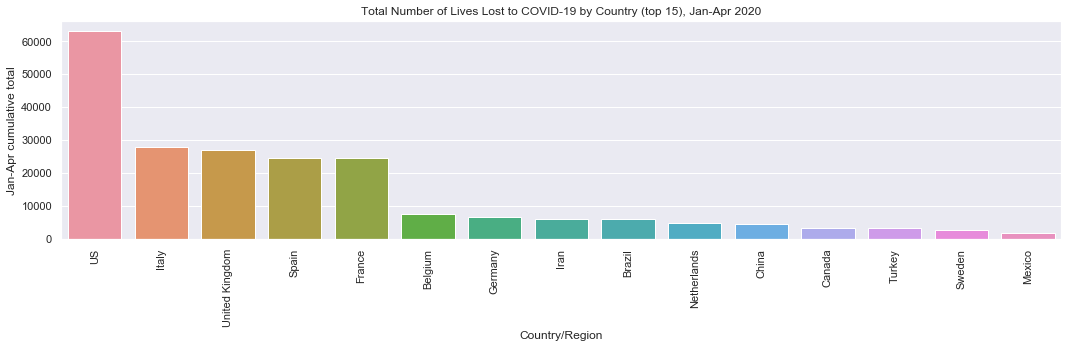

In [51]:
# Countries which lost the greatest number of human lives

df_death_count_sorted= df_death_count.sort_values('4/30/2020',ascending=False)
df_death_count_sorted.columns=['Country/Region', 'Jan-Apr cumulative total']

# Lives lost to COVID-19 by Country Jan-Apr
plt.figure(figsize=(15,5))
plt.title('Total Number of Lives Lost to COVID-19 by Country (top 15), Jan-Apr 2020')
ax=sns.barplot(x='Country/Region', y='Jan-Apr cumulative total', data=df_death_count_sorted.iloc[0:15]);


plt.xticks(rotation=90)
plt.tight_layout()


In [52]:
# calculate raw difference in month on month increase in death count per country
df_janapr_death_count_pm = df_deaths.groupby(['Country/Region'], as_index=False)[['4/30/2020','3/31/2020','2/29/2020','1/31/2020']].sum()
df_janapr_death_count_pm['jan-feb change'] = df_janapr_death_count_pm['2/29/2020']-df_janapr_death_count_pm['1/31/2020']
df_janapr_death_count_pm['feb-mar change'] = df_janapr_death_count_pm['3/31/2020']-df_janapr_death_count_pm['2/29/2020']
df_janapr_death_count_pm['mar-apr change'] = df_janapr_death_count_pm['4/30/2020']-df_janapr_death_count_pm['3/31/2020']
                                                                                                            
df_janapr_death_count_pm

Country/Region  4/30/2020  3/31/2020  2/29/2020  1/31/2020  \
0           Afghanistan         64          4          0          0   
1               Albania         31         15          0          0   
2               Algeria        450         44          0          0   
3               Andorra         42         12          0          0   
4                Angola          2          2          0          0   
..                  ...        ...        ...        ...        ...   
182  West Bank and Gaza          2          1          0          0   
183      Western Sahara          0          0          0          0   
184               Yemen          2          0          0          0   
185              Zambia          3          0          0          0   
186            Zimbabwe          4          1          0          0   

     jan-feb change  feb-mar change  mar-apr change  
0                 0               4              60  
1                 0              15              16  
2                 0              44             406  
3                 0              12              30  
4                 0               2               0  
..              ...             ...             ...  
182               0               1               1  
183               0               0               0  
184               0               0               2  
185               0               0               3  
186               0               1               3  

[187 rows x 8 columns]

In [53]:

# sort deaths dataframe by Mar-Apr raw death increment
df_janapr_death_count_pm_sorted= df_janapr_death_count_pm.sort_values('mar-apr change',ascending=False)
df_janapr_death_count_pm_sorted.head(50)


Country/Region  4/30/2020  3/31/2020  2/29/2020  1/31/2020  \
173                    US      62996       5367          1          0   
177        United Kingdom      26842       2429          0          0   
62                 France      24410       3532          2          0   
157                 Spain      24543       8464          0          0   
85                  Italy      27967      12428         29          0   
16                Belgium       7594        705          0          0   
66                Germany       6623        775          0          0   
23                 Brazil       6006        201          0          0   
121           Netherlands       4811       1040          0          0   
32                 Canada       3310        101          0          0   
81                   Iran       6028       2898         43          0   
172                Turkey       3174        214          0          0   
161                Sweden       2586        180          0          0   
112                Mexico       1859         29          0          0   
36                  China       4637       3309       2837        213   
162           Switzerland       1737        433          0          0   
83                Ireland       1232         71          0          0   
79                  India       1154         35          0          0   
139                Russia       1073         17          0          0   
133                  Peru       1051         30          0          0   
136              Portugal        989        160          0          0   
52                Ecuador        900         75          0          0   
80              Indonesia        792        136          0          0   
138               Romania        717         82          0          0   
135                Poland        644         33          0          0   
134           Philippines        568         88          1          0   
9                 Austria        584        128          0          0   
2                 Algeria        450         44          0          0   
87                  Japan        430         56          5          0   
47                Denmark        452         90          0          0   
129              Pakistan        385         26          0          0   
53                  Egypt        392         46          0          0   
77                Hungary        312         16          0          0   
37               Colombia        293         16          0          0   
51     Dominican Republic        301         51          0          0   
175               Ukraine        261         17          0          0   
35                  Chile        227         12          0          0   
46                Czechia        236         31          0          0   
84                 Israel        222         20          0          0   
61                Finland        211         17          0          0   
6               Argentina        218         27          0          0   
127                Norway        210         39          0          0   
148                Serbia        179         16          0          0   
13             Bangladesh        168          5          0          0   
130                Panama        188         30          0          0   
146          Saudi Arabia        162         10          0          0   
117               Morocco        170         36          0          0   
113               Moldova        116          4          0          0   
176  United Arab Emirates        105          6          0          0   
155          South Africa        103          5          0          0   

     jan-feb change  feb-mar change  mar-apr change  
173               1            5366           57629  
177               0            2429           24413  
62                2            3530           20878  
157               0            8464           16079  
85               

In [54]:

df_janapr_death_count_tot_sorted=df_janapr_death_count_pm.sort_values('4/30/2020',ascending=True)
df_janapr_death_count_tot_sorted.head(50)


Country/Region  4/30/2020  3/31/2020  2/29/2020  \
141             Saint Kitts and Nevis          0          0          0   
33           Central African Republic          0          0          0   
156                       South Sudan          0          0          0   
38                            Comoros          0          0          0   
149                        Seychelles          0          0          0   
145             Sao Tome and Principe          0          0          0   
143  Saint Vincent and the Grenadines          0          0          0   
50                           Dominica          0          0          0   
142                       Saint Lucia          0          0          0   
140                            Rwanda          0          0          0   
56                            Eritrea          0          0          0   
60                               Fiji          0          0          0   
131                  Papua New Guinea          0          0          0   
69                            Grenada          0          0          0   
75                           Holy See          0          0          0   
120                             Nepal          0          0          0   
119                           Namibia          0          0          0   
118                        Mozambique          0          0          0   
115                          Mongolia          0          0          0   
95                               Laos          0          0          0   
30                           Cambodia          0          0          0   
165                        Tajikistan          0          0          0   
104                        Madagascar          0          0          0   
183                    Western Sahara          0          0          0   
174                            Uganda          0          0          0   
181                           Vietnam          0          0          0   
168                       Timor-Leste          0          0          0   
19                             Bhutan          0          0          0   
58                           Eswatini          1          0          0   
110                        Mauritania          1          1          0   
55                  Equatorial Guinea          1          0          0   
64                             Gambia          1          1          0   
18                              Benin          1          0          0   
160                          Suriname          1          0          0   
29                         Cabo Verde          1          1          0   
28                            Burundi          1          0          0   
107                          Maldives          1          0          0   
22                           Botswana          1          1          0   
24                             Brunei          1          1          0   
100                     Liechtenstein          1          0          0   
72                      Guinea-Bissau          1          0          0   
103                        MS Zaandam          2          0          0   
184                             Yemen          2          0          0   
17                             Belize          2          0          0   
182                West Bank and Gaza          2          1          0   
4                              Angola          2          2          0   
49                           Djibouti          2          0          0   
59                           Ethiopia          3          0          0   
63                              Gabon          3          1          0   
5                 Antigua and Barbuda          3          0          0   

     1/31/2020  jan-feb change  feb-mar change  mar-apr change  
141          0               0               0               0  
33           0               0               0               0  
156          0               0               0       

In [55]:
# Count Countries/Region with Jan-Apr Total Deaths=0

sum(df_janapr_death_count_tot_sorted['4/30/2020']==0)

28

In [56]:
# Count Countries/Region with Jan-Apr Total Deaths=1

sum(df_janapr_death_count_tot_sorted['4/30/2020']==1)

13

In [57]:
# Count Countries/Region with Jan-Apr Total Deaths=2

sum(df_janapr_death_count_tot_sorted['4/30/2020']==2)

6

In [58]:
# Count Countries/Region with Jan-Apr Total Deaths=3

sum(df_janapr_death_count_tot_sorted['4/30/2020']==3)

8

In [59]:
# Count Countries/Region with Jan-Apr Total Deaths=4

sum(df_janapr_death_count_tot_sorted['4/30/2020']==4)

3

In [60]:
# Count Countries/Region with Jan-Apr Total Deaths=5

sum(df_janapr_death_count_tot_sorted['4/30/2020']==5)

1

In [61]:
# Descriptive statistics for Country level Jan-Apr Total Deaths

(df_janapr_death_count_tot_sorted['4/30/2020'].describe()).round()

count      187.0
mean      1248.0
std       5976.0
min          0.0
25%          2.0
50%         16.0
75%        165.0
max      62996.0
Name: 4/30/2020, dtype: float64

In [62]:
# View Country Deaths in bins

df_janapr_death_count_tot_sorted['4/30/2020'].value_counts(bins=10)

(-62.997, 6299.6]     180
(25198.4, 31498.0]      2
(18898.8, 25198.4]      2
(6299.6, 12599.2]       2
(56696.4, 62996.0]      1
(50396.8, 56696.4]      0
(44097.2, 50396.8]      0
(37797.6, 44097.2]      0
(31498.0, 37797.6]      0
(12599.2, 18898.8]      0
Name: 4/30/2020, dtype: int64

In [63]:
# calculate total cumulative global death cases Jan-Apr 2020
df_death_count.sum(axis=0)

Country/Region    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
4/30/2020                                                    233388
dtype: object

In [64]:
# combine country-level confirmed and death cases into one pivot table
covid19_country=pd.merge(df_confirmed_count, df_recovered_count, on="Country/Region")
covid19_country_janapr=pd.merge(covid19_country,df_death_count,on="Country/Region")
covid19_country_janapr.columns=['Country/Region','confirmed_janapr','recoveries_janapr','deaths_janapr'] 
covid19_country_janapr

Country/Region  confirmed_janapr  recoveries_janapr  deaths_janapr
0           Afghanistan              2171                260             64
1               Albania               773                470             31
2               Algeria              4006               1779            450
3               Andorra               745                468             42
4                Angola                27                  7              2
..                  ...               ...                ...            ...
182  West Bank and Gaza               344                 76              2
183      Western Sahara                 6                  5              0
184               Yemen                 6                  1              2
185              Zambia               106                 55              3
186            Zimbabwe                40                  5              4

[187 rows x 4 columns]

In [65]:
# what proportion of the country confirmed Covid19 cases have recovered between Jan-Apr 2020?
# what proportion of the country confirmed Covid19 cases have died between Jan-Apr 2020?
 
covid19_country_janapr['percent_confirmed_who_recovered'] = 100*covid19_country_janapr['recoveries_janapr']/covid19_country_janapr['confirmed_janapr']
covid19_country_janapr['percent_confirmed_who_died'] = 100*covid19_country_janapr['deaths_janapr']/covid19_country_janapr['confirmed_janapr']
covid19_country_janapr.head(5)

Country/Region  confirmed_janapr  recoveries_janapr  deaths_janapr  \
0    Afghanistan              2171                260             64   
1        Albania               773                470             31   
2        Algeria              4006               1779            450   
3        Andorra               745                468             42   
4         Angola                27                  7              2   

   percent_confirmed_who_recovered  percent_confirmed_who_died  
0                        11.976048                    2.947950  
1                        60.802070                    4.010349  
2                        44.408387                   11.233150  
3                        62.818792                    5.637584  
4                        25.925926                    7.407407

In [66]:
# Checking which countries had a high number of confirmations but low proportion of deaths
covid19_country_janapr_sorted_confirmed=covid19_country_janapr.sort_values('confirmed_janapr',ascending=False)
covid19_country_janapr_sorted_confirmed.head(50)

Country/Region  confirmed_janapr  recoveries_janapr  deaths_janapr  \
173                    US           1069424             153947          62996   
157                 Spain            213435             112050          24543   
85                  Italy            205463              75945          27967   
177        United Kingdom            172481                859          26842   
62                 France            167299              50380          24410   
66                Germany            163009             123500           6623   
172                Turkey            120204              48886           3174   
139                Russia            106498              11619           1073   
81                   Iran             94640              75103           6028   
23                 Brazil             87187              35935           6006   
36                  China             83956              78523           4637   
32                 Canada             54457              21424           3310   
16                Belgium             48519              11576           7594   
121           Netherlands             39512                125           4811   
133                  Peru             36976              10405           1051   
79                  India             34863               9068           1154   
162           Switzerland             29586              23400           1737   
136              Portugal             25045               1519            989   
52                Ecuador             24934               1558            900   
146          Saudi Arabia             22753               3163            162   
161                Sweden             21092               1005           2586   
83                Ireland             20612              13386           1232   
112                Mexico             19224              11423           1859   
129              Pakistan             16817               4315            385   
151             Singapore             16169               1244             15   
35                  Chile             16023               8580            227   
84                 Israel             15946               8561            222   
9                 Austria             15452              12907            584   
87                  Japan             14088               2460            430   
15                Belarus             14027               2386             89   
137                 Qatar             13409               1372             10   
135                Poland             12877               3236            644   
176  United Arab Emirates             12481               2429            105   
138               Romania             12240               4017            717   
91           Korea, South             10774               9072            248   
175               Ukraine             10406               1238            261   
80              Indonesia             10118               1522            792   
47                Denmark              9356               6741            452   
148                Serbia              9009               1343            179   
134           Philippines              8488               1043            568   
127                Norway              7738                 32            210   
46                Czechia              7682               3314            236   
13             Bangladesh              7667                160            168   
51     Dominican Republic              6972               1301            301   
8               Australia              6766               5742             93   
130                Panama              6532                576            188   
37               Colombia              6507               1439            293   
106              Malaysia              6002               4171            102   
155          South Africa              564

In [67]:
# Top 10 countries with the highest recorded proportion of recoveries from the confirmed cases
covid19_country_janapr_sorted_recoveries=covid19_country_janapr.sort_values('percent_confirmed_who_recovered',ascending=False)
covid19_country_janapr_sorted_recoveries.head(50)

Country/Region  confirmed_janapr  recoveries_janapr  deaths_janapr  \
30              Cambodia               122                119              0   
36                 China             83956              78523           4637   
111            Mauritius               332                310             10   
78               Iceland              1797               1670             10   
167             Thailand              2954               2684             54   
48      Diamond Princess               712                645             13   
24                Brunei               138                124              1   
142          Saint Lucia                17                 15              0   
102           Luxembourg              3784               3213             90   
8              Australia              6766               5742             93   
122          New Zealand              1479               1252             19   
91          Korea, South             10774               9072            248   
9                Austria             15452              12907            584   
183       Western Sahara                 6                  5              0   
50              Dominica                16                 13              0   
181              Vietnam               270                219              0   
160             Suriname                10                  8              1   
88                Jordan               453                362              8   
81                  Iran             94640              75103           6028   
162          Switzerland             29586              23400           1737   
26          Burkina Faso               645                506             43   
66               Germany            163009             123500           6623   
109                Malta               465                351              4   
164               Taiwan               429                322              6   
110           Mauritania                 8                  6              1   
10            Azerbaijan              1804               1325             24   
64                Gambia                11                  8              1   
47               Denmark              9356               6741            452   
104           Madagascar               128                 92              0   
19                Bhutan                 7                  5              0   
106             Malaysia              6002               4171            102   
114               Monaco                95                 64              4   
100        Liechtenstein                82                 55              1   
60                  Fiji                18                 12              0   
168          Timor-Leste                24                 16              0   
56               Eritrea                39                 26              0   
116           Montenegro               322                214              7   
82                  Iraq              2085               1375             93   
69               Grenada                20                 13              0   
83               Ireland             20612              13386           1232   
43               Croatia              2076               1348             69   
178              Uruguay               643                417             17   
124                Niger               719                452             32   
3                Andorra               745                468             42   
174               Uganda                83                 52              0   
170  Trinidad and Tobago               116                 72              8   
94            Kyrgyzstan               746                462              8   
1                Albania               773                470             31   
61               Finland              4995               3000            211   
112       

In [68]:
# Top 10 countries with the lowest recorded proportion of recoveries from the confirmed cases

covid19_country_janapr_sorted_recoveries.tail(10)

Country/Region  confirmed_janapr  recoveries_janapr  deaths_janapr  \
55   Equatorial Guinea               315                  9              1   
13          Bangladesh              7667                160            168   
177     United Kingdom            172481                859          26842   
127             Norway              7738                 32            210   
121        Netherlands             39512                125           4811   
103         MS Zaandam                 9                  0              2   
165         Tajikistan                15                  0              0   
131   Papua New Guinea                 8                  0              0   
38             Comoros                 1                  0              0   
156        South Sudan                35                  0              0   

     percent_confirmed_who_recovered  percent_confirmed_who_died  
55                          2.857143                    0.317460  
13                          2.086866                    2.191209  
177                         0.498026                   15.562294  
127                         0.413544                    2.713880  
121                         0.316360                   12.176048  
103                         0.000000                   22.222222  
165                         0.000000                    0.000000  
131                         0.000000                    0.000000  
38                          0.000000                    0.000000  
156                         0.000000                    0.000000

In [69]:
# Top 10 countries with the highest recorded proportion of deaths from the confirmed cases
covid19_country_janapr_sorted_deaths=covid19_country_janapr.sort_values('percent_confirmed_who_died',ascending=False)
covid19_country_janapr_sorted_deaths.head(10)

Country/Region  confirmed_janapr  recoveries_janapr  deaths_janapr  \
184                Yemen                 6                  1              2   
103           MS Zaandam                 9                  0              2   
123            Nicaragua                14                  7              3   
16               Belgium             48519              11576           7594   
177       United Kingdom            172481                859          26842   
62                France            167299              50380          24410   
85                 Italy            205463              75945          27967   
11               Bahamas                81                 25             11   
5    Antigua and Barbuda                24                 11              3   
110           Mauritania                 8                  6              1   

     percent_confirmed_who_recovered  percent_confirmed_who_died  
184                        16.666667                   33.333333  
103                         0.000000                   22.222222  
123                        50.000000                   21.428571  
16                         23.858695                   15.651600  
177                         0.498026                   15.562294  
62                         30.113748                   14.590643  
85                         36.962859                   13.611697  
11                         30.864198                   13.580247  
5                          45.833333                   12.500000  
110                        75.000000                   12.500000

In [70]:
# Top 10 countries with the lowest recorded proportion of deaths from the confirmed cases
covid19_country_janapr_sorted_deaths.tail(50)

Country/Region  confirmed_janapr  recoveries_janapr  \
109                             Malta               465                351   
176              United Arab Emirates             12481               2429   
41                         Costa Rica               719                338   
29                         Cabo Verde               121                  4   
67                              Ghana              2074                212   
89                         Kazakhstan              3402                866   
24                             Brunei               138                124   
146                      Saudi Arabia             22753               3163   
93                             Kuwait              4024               1539   
15                            Belarus             14027               2386   
182                West Bank and Gaza               344                 76   
78                            Iceland              1797               1670   
72                      Guinea-Bissau               205                 19   
128                              Oman              2348                495   
71                             Guinea              1495                329   
179                        Uzbekistan              2039               1133   
55                  Equatorial Guinea               315                  9   
12                            Bahrain              3040               1500   
107                          Maldives               468                 17   
49                           Djibouti              1089                642   
151                         Singapore             16169               1244   
137                             Qatar             13409               1372   
181                           Vietnam               270                219   
119                           Namibia                16                  8   
75                           Holy See                11                  2   
183                    Western Sahara                 6                  5   
69                            Grenada                20                 13   
104                        Madagascar               128                 92   
174                            Uganda                83                 52   
115                          Mongolia                38                 10   
118                        Mozambique                76                 12   
145             Sao Tome and Principe                14                  4   
19                             Bhutan                 7                  5   
168                       Timor-Leste                24                 16   
38                            Comoros                 1                  0   
142                       Saint Lucia                17                 15   
149                        Seychelles                11                  6   
141             Saint Kitts and Nevis                15                  6   
95                               Laos                19                  8   
50                           Dominica                16                 13   
156                       South Sudan                35                  0   
56                            Eritrea                39                 26   
120                             Nepal                57                 16   
33           Central African Republic                50                 10   
30                           Cambodia               122                119   
131                  Papua New Guinea                 8                  0   
60                               Fiji                18                 12   
165                        Tajikistan                15                  0   
143  Saint Vincent and the Grenadines                16                  8   
140                            Rwanda               243                104   

     deaths_janapr  percent_confirmed_who_re

In [71]:
#count globally confirmed cases for 22 Jan-30 Apr 2020 period by Continent, set as_index=False to make your columns accessible

df_confirmed_continent_count = df_corona.loc['confirmed'].groupby(['Continent'], as_index=False).agg({'4/30/2020': 'sum'})
df_confirmed_continent_count.columns=['Continent','Total_confirmed_Apr30']

df_confirmed_continent_count

Continent  Total_confirmed_Apr30
0                Africa                  38826
1                  Asia                 626913
2                Europe                1242108
3         North America                1161515
4  Oceania_or_Australia                   8271
5         South America                 178499
6               Unknown                    721

In [72]:
#count globally recovered cases for 22 Jan-30 Apr 2020 period by Continent, set as_index=False to make your columns accessible

df_recovered_continent_count = df_corona.loc['recovered'].groupby(['Continent'], as_index=False).agg({'4/30/2020': 'sum'})
df_recovered_continent_count.columns=['Continent','Total_recovered_Apr30']

df_recovered_continent_count

Continent  Total_recovered_Apr30
0                Africa                  12543
1                  Asia                 277406
2                Europe                 466974
3         North America                 190209
4  Oceania_or_Australia                   7006
5         South America                  59992
6               Unknown                    645

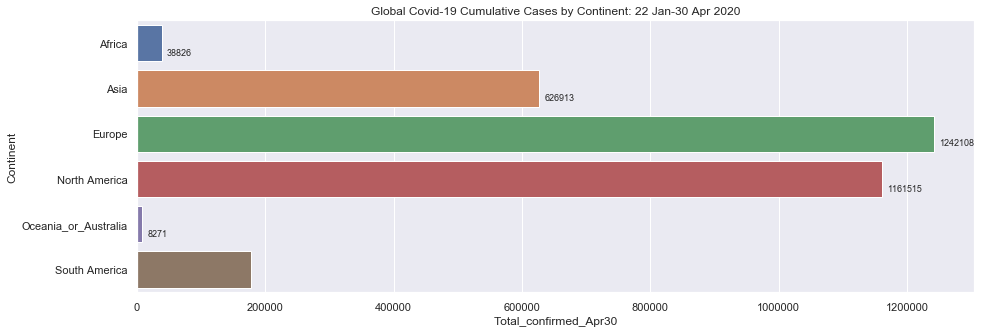

In [73]:
# Global Covid-19 cases by Continent barplot (cumulative total up to 30 April 2020)
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Total_confirmed_Apr30", y="Continent", data=df_confirmed_continent_count.iloc[0:6])
ax.set_title("Global Covid-19 Cumulative Cases by Continent: 22 Jan-30 Apr 2020")
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.1),
                xytext=(5, 20), textcoords='offset points', fontsize=9)

ax

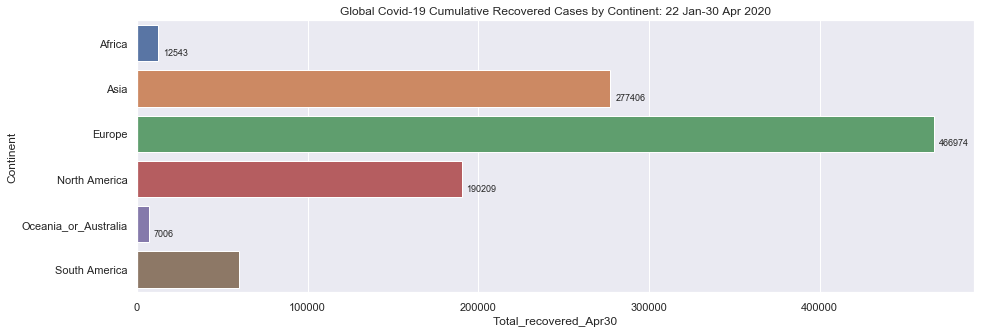

In [74]:
# Global Covid-19 cases by Continent barplot (cumulative total up to 30 April 2020)
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Total_recovered_Apr30", y="Continent", data=df_recovered_continent_count.iloc[0:6])
ax.set_title("Global Covid-19 Cumulative Recovered Cases by Continent: 22 Jan-30 Apr 2020")
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.1),
                xytext=(5, 20), textcoords='offset points', fontsize=9)

ax

In [75]:
#count global deaths for 22 Jan-30 Apr 2020 by Continent, set as_index=False to make your columns accessible

df_deaths_continent_count = df_corona.loc['deaths'].groupby(['Continent'], as_index=False).agg({'4/30/2020': 'sum'})
df_deaths_continent_count.columns=['Continent','Total_deaths_Apr30']

df_deaths_continent_count

Continent  Total_deaths_Apr30
0                Africa                1634
1                  Asia               19708
2                Europe              134244
3         North America               68868
4  Oceania_or_Australia                 112
5         South America                8807
6               Unknown                  15

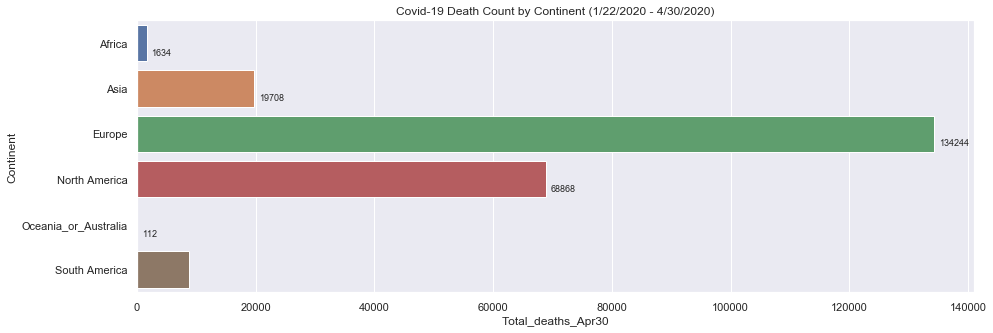

In [76]:
plt.figure(figsize=(15,5))
plt.title('Covid-19 Death Count by Continent (1/22/2020 - 4/30/2020)')
ax = sns.barplot(x='Total_deaths_Apr30', y='Continent', data=df_deaths_continent_count.iloc[0:6])
ax.set_xlabel('Total_deaths_Apr30')

for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.1),
                xytext=(5, 20), textcoords='offset points', fontsize=9)

ax

In [77]:
# combine continental confirmed and death cases into one pivot table
covid19_continental=pd.merge(df_confirmed_continent_count, df_recovered_continent_count, on="Continent")
covid19_continental_janapr=pd.merge(covid19_continental,df_deaths_continent_count,on="Continent")
 
covid19_continental_janapr


Continent  Total_confirmed_Apr30  Total_recovered_Apr30  \
0                Africa                  38826                  12543   
1                  Asia                 626913                 277406   
2                Europe                1242108                 466974   
3         North America                1161515                 190209   
4  Oceania_or_Australia                   8271                   7006   
5         South America                 178499                  59992   
6               Unknown                    721                    645   

   Total_deaths_Apr30  
0                1634  
1               19708  
2              134244  
3               68868  
4                 112  
5                8807  
6                  15

In [78]:
# what proportion of the globally confirmed Covid19 cases have died between Jan-Apr 2020?
# what proportion of the globally confirmed Covid19 cases have recovered between Jan-Apr 2020?
 
covid19_continental_janapr['percent_confirmed_who_recovered'] = 100*covid19_continental_janapr['Total_recovered_Apr30']/covid19_continental_janapr['Total_confirmed_Apr30']
covid19_continental_janapr['percent_confirmed_who_died'] = 100*covid19_continental_janapr['Total_deaths_Apr30']/covid19_continental_janapr['Total_confirmed_Apr30']
covid19_continental_janapr.head(5)

Continent  Total_confirmed_Apr30  Total_recovered_Apr30  \
0                Africa                  38826                  12543   
1                  Asia                 626913                 277406   
2                Europe                1242108                 466974   
3         North America                1161515                 190209   
4  Oceania_or_Australia                   8271                   7006   

   Total_deaths_Apr30  percent_confirmed_who_recovered  \
0                1634                        32.305671   
1               19708                        44.249521   
2              134244                        37.595282   
3               68868                        16.375940   
4                 112                        84.705598   

   percent_confirmed_who_died  
0                    4.208520  
1                    3.143658  
2                   10.807756  
3                    5.929153  
4                    1.354129

In [79]:
# global recovery vs death proportions
covid19_continental_janapr_death_rec_prop=covid19_continental_janapr[['Continent','percent_confirmed_who_recovered','percent_confirmed_who_died']]

covid19_continental_janapr_death_rec_prop.head(10)

Continent  percent_confirmed_who_recovered  \
0                Africa                        32.305671   
1                  Asia                        44.249521   
2                Europe                        37.595282   
3         North America                        16.375940   
4  Oceania_or_Australia                        84.705598   
5         South America                        33.609152   
6               Unknown                        89.459085   

   percent_confirmed_who_died  
0                    4.208520  
1                    3.143658  
2                   10.807756  
3                    5.929153  
4                    1.354129  
5                    4.933921  
6                    2.080444

In [80]:
# set Continent as index and round poportions to 2 decimal places
covid19_continental_janapr_death_rec_props=covid19_continental_janapr_death_rec_prop.set_index('Continent').round(2)
covid19_continental_janapr_death_rec_props

percent_confirmed_who_recovered  \
Continent                                               
Africa                                          32.31   
Asia                                            44.25   
Europe                                          37.60   
North America                                   16.38   
Oceania_or_Australia                            84.71   
South America                                   33.61   
Unknown                                         89.46   

                      percent_confirmed_who_died  
Continent                                         
Africa                                      4.21  
Asia                                        3.14  
Europe                                     10.81  
North America                               5.93  
Oceania_or_Australia                        1.35  
South America                               4.93  
Unknown                                     2.08

<function matplotlib.pyplot.show(*args, **kw)>

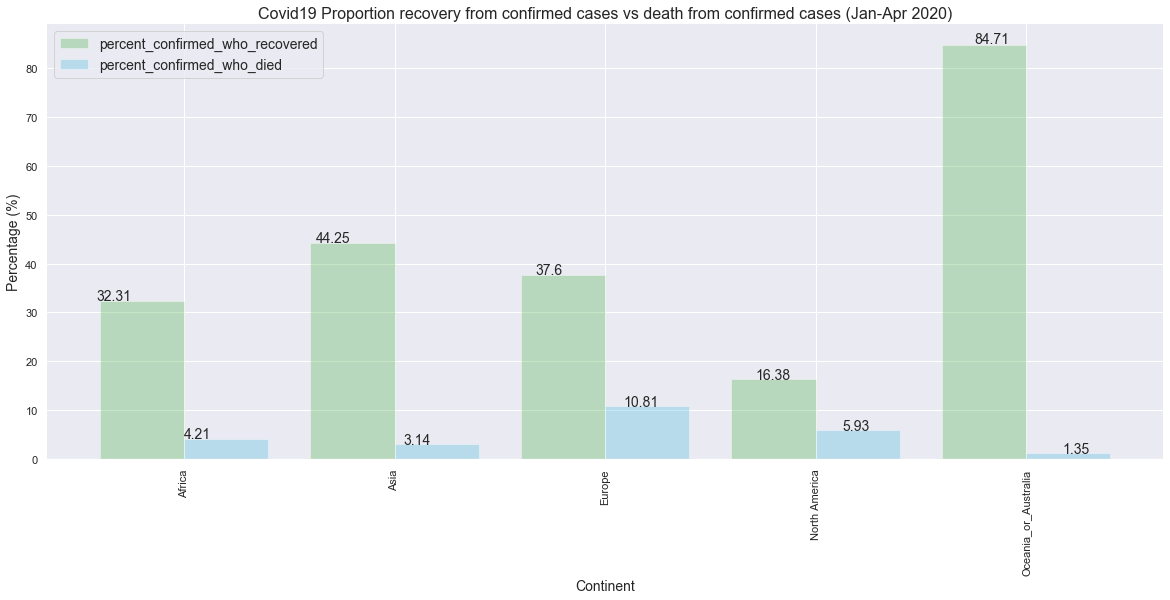

In [81]:
# Clustered Bar chart of to visualize the percentage of confirmed who recovered vs confirmed who died (using Artist layer in Matplotlib)

colors=['#5cb85c', '#5bc0de','#d9534f']
ax = covid19_continental_janapr_death_rec_props.iloc[ 0:5 , : ].plot(kind='bar', alpha=0.35, figsize=(20, 8), color=colors, width=0.8)

ax.set_title('Covid19 Proportion recovery from confirmed cases vs death from confirmed cases (Jan-Apr 2020)', fontsize=16)
ax.set_ylabel('Percentage (%)', fontsize=14)
ax.set_xlabel('Continent', fontsize=14)
plt.legend(prop={"size":14})

for p in ax.patches:

    ax.annotate(str(p.get_height()),(p.get_x() * 1.043,  p.get_height() * 1.005),fontsize=14)
    
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['top'].set_color('none')
    
plt.show

In [82]:
confirmed_daily_count = df_confirmed.iloc[:, 4:104].sum(axis=0)

global_daily_confirmed=confirmed_daily_count.to_frame().reset_index()
global_daily_confirmed.columns = ['date','total_count']

global_daily_confirmed.head()

date  total_count
0  1/22/2020          555
1  1/23/2020          654
2  1/24/2020          941
3  1/25/2020         1434
4  1/26/2020         2118

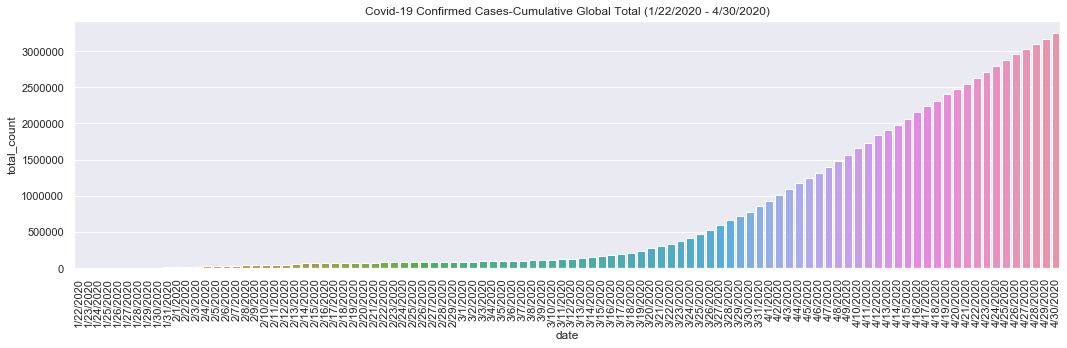

In [83]:
# Cumulative Global Total-Confirmed bar plot Jan-Apr
plt.figure(figsize=(15,5))
plt.title('Covid-19 Confirmed Cases-Cumulative Global Total (1/22/2020 - 4/30/2020)')
ax=sns.barplot(x='date', y='total_count', data=global_daily_confirmed[['date','total_count']]);

plt.xticks(rotation=90)
plt.tight_layout()

In [84]:
recovered_daily_count = df_recovered.iloc[:, 4:104].sum(axis=0)

global_daily_recovered=recovered_daily_count.to_frame().reset_index()
global_daily_recovered.columns = ['date','total_count']
global_daily_recovered.head()

date  total_count
0  1/22/2020           28
1  1/23/2020           30
2  1/24/2020           36
3  1/25/2020           39
4  1/26/2020           52

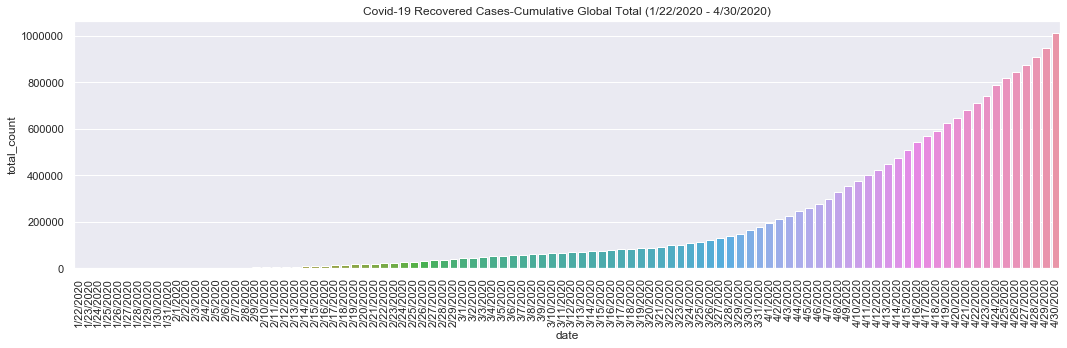

In [85]:
# Cumulative Global Total-Recovered bar plot Jan-Apr
plt.figure(figsize=(15,5))
plt.title('Covid-19 Recovered Cases-Cumulative Global Total (1/22/2020 - 4/30/2020)')
ax=sns.barplot(x='date', y='total_count', data=global_daily_recovered);

plt.xticks(rotation=90)
plt.tight_layout()

In [86]:
death_daily_count = df_deaths.iloc[:, 4:104].sum(axis=0)

global_daily_death=death_daily_count.to_frame().reset_index()
global_daily_death.columns = ['date','total_count']
global_daily_death.head()

date  total_count
0  1/22/2020           17
1  1/23/2020           18
2  1/24/2020           26
3  1/25/2020           42
4  1/26/2020           56

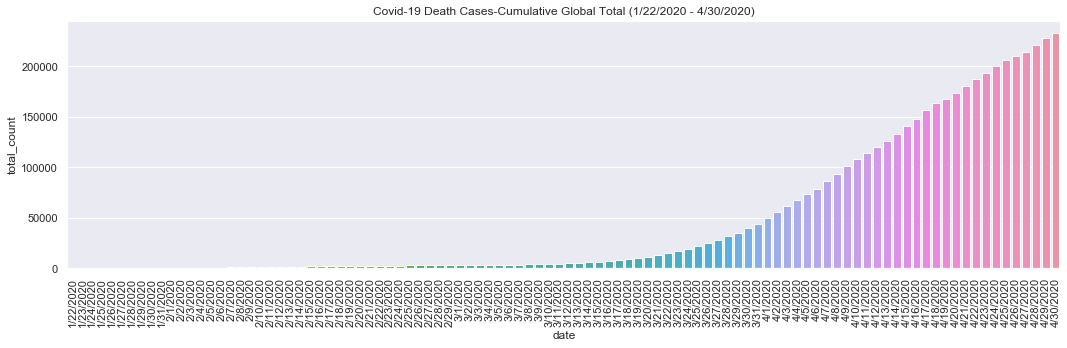

In [87]:
# Cumulative Global Total-Deaths bar plot Jan-Apr
plt.figure(figsize=(15,5))
plt.title('Covid-19 Death Cases-Cumulative Global Total (1/22/2020 - 4/30/2020)')
ax=sns.barplot(x='date', y='total_count', data=global_daily_death);

plt.xticks(rotation=90)
plt.tight_layout()

## US Perspective

In [88]:
US_confirmed_cumulative = df_US_confirmed.iloc[:, 12:112].sum(axis=0)

US_confirmed_count_cumulative=US_confirmed_cumulative.to_frame().reset_index()
US_confirmed_count_cumulative.columns = ['date','total_count']
US_confirmed_count_cumulative.head()

date  total_count
0  1/22/20            1
1  1/23/20            1
2  1/24/20            2
3  1/25/20            2
4  1/26/20            5

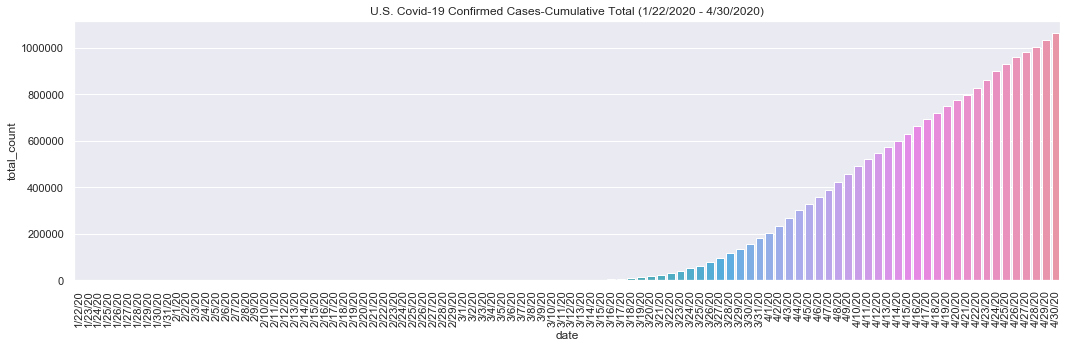

In [89]:
# Cumulative US Total - Confirmed bar plot Jan-Apr
plt.figure(figsize=(15,5))
plt.title('U.S. Covid-19 Confirmed Cases-Cumulative Total (1/22/2020 - 4/30/2020)')
ax=sns.barplot(x='date', y='total_count', data=US_confirmed_count_cumulative);

plt.xticks(rotation=90)
plt.tight_layout()

In [90]:
# Month on month US Covid-19 Confirmed caes Jan-Apr
df_US_janapr_confirmed_count_pm = df_US_confirmed.groupby(['Province_State'], as_index=False)[['4/30/20','3/31/20','2/29/20','1/31/20']].sum()

df_US_janapr_confirmed_count_pm



Province_State  4/30/20  3/31/20  2/29/20  1/31/20
0                    Alabama     7088      987        0        0
1                     Alaska      355      119        0        0
2             American Samoa        0        0        0        0
3                    Arizona     7655     1289        1        1
4                   Arkansas     3113      489        0        0
5                 California    50130     8210       12        3
6                   Colorado    15126     2837        0        0
7                Connecticut    27238     3051        0        0
8                   Delaware     4709      319        0        0
9       District of Columbia     4323      495        0        0
10                   Florida    33683     6739        0        0
11                   Georgia    24908     3764        0        0
12                      Guam      145       69        0        0
13                    Hawaii      609      191        0        0
14                     Idaho     1984      515        0        0
15                  Illinois    52540     5976        2        2
16                   Indiana    17835     2158        0        0
17                      Iowa     7121      495        0        0
18                    Kansas     4413      434        0        0
19                  Kentucky     4655      614        0        0
20                 Louisiana    27940     5215        0        0
21                     Maine     1094      297        0        0
22                  Maryland    21742     1660        0        0
23             Massachusetts    61762     6279        1        0
24                  Michigan    41346     7502        0        0
25                 Minnesota     5127      629        0        0
26               Mississippi     6815      937        0        0
27                  Missouri     7272     1238        0        0
28                   Montana      453      198        0        0
29                  Nebraska     4233      169        0        0
30                    Nevada     5053     1012        0        0
31             New Hampshire     2143      357        0        0
32                New Jersey   118174    15010        0        0
33                New Mexico     3411      315        0        0
34                  New York   304372    75833        0        0
35            North Carolina    10754     1535        0        0
36              North Dakota     1067      122        0        0
37  Northern Mariana Islands       14        2        0        0
38                      Ohio    18027     2199        0        0
39                  Oklahoma     3618      566        0        0
40                    Oregon     2510      690        1        0
41              Pennsylvania    47971     4963        0        0
42               Puerto Rico     1539      239        0        0
43              Rhode Island     7534      304        0        0
44            South Carolina     6095     1083        0        0
45              South Dakota     2449      108        0        0
46                 Tennessee    10448     1894        0        0
47                     Texas    28727     3809        0        0
48                      Utah     4672      866        0        0
49                   Vermont      863      282        0        0
50            Virgin Islands       66       30        0        0
51                  Virginia    15847     1249        0        0
52                Washington    14267     5158        7        1
53             West Virginia     1125      162        0        0
54                 Wisconsin     6854     1412        0        0
55                   Wyoming      559      109        0        0

In [91]:
df_US_janapr_confirmed_count_pmonth=df_US_janapr_confirmed_count_pm.set_index('Province_State')

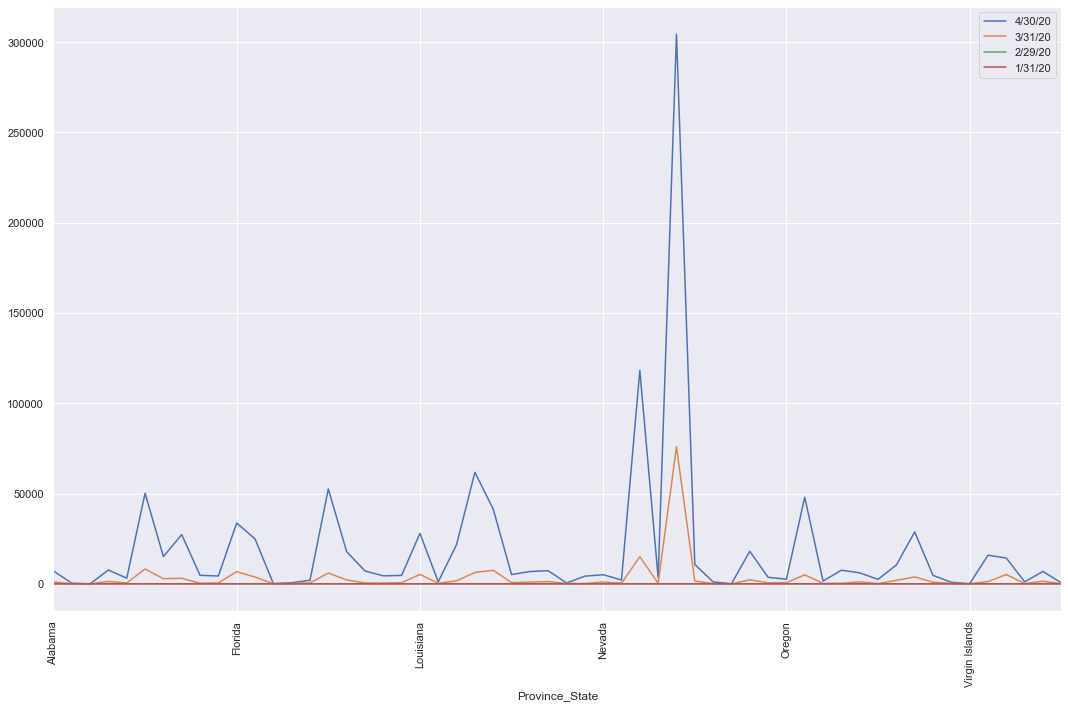

In [92]:
# Confirmed US Covid 19 cases monthly totals

 
lines = df_US_janapr_confirmed_count_pmonth.plot.line(figsize=(15,10))

plt.xticks(rotation=90)
plt.tight_layout()


In [93]:
#count U.S. confirmed cases by State in Jan 2020, set as_index=False to make your columns accessible

df_US_jan_confirmed_count = df_US_confirmed.groupby(['Province_State'], as_index=False).agg({'1/31/20': 'sum'})
df_US_jan_confirmed_count.columns=['Province_State','Total_confirmed_jan']

#count U.S. confirmed cases by State from Jan-Feb 2020, set as_index=False to make your columns accessible

df_US_janfeb_confirmed_count = df_US_confirmed.groupby(['Province_State'], as_index=False).agg({'2/29/20': 'sum'})
df_US_janfeb_confirmed_count.columns=['Province_State','Total_confirmed_janfeb']

#count U.S. confirmed cases by State from Jan-Mar 2020, set as_index=False to make your columns accessible

df_US_janmar_confirmed_count = df_US_confirmed.groupby(['Province_State'], as_index=False).agg({'3/31/20': 'sum'})
df_US_janmar_confirmed_count.columns=['Province_State','Total_confirmed_janmar']

In [94]:
#count U.S. confirmed cases by State for 22 Jan-30 Apr 2020 , set as_index=False to make your columns accessible

df_US_janapr_confirmed_count = df_US_confirmed.groupby(['Province_State'], as_index=False).agg({'4/30/20': 'sum'})

df_US_janapr_confirmed_count.columns=['Province_State','Total_confirmed_janapr']
df_US_janapr_confirmed_count

Province_State  Total_confirmed_janapr
0                    Alabama                    7088
1                     Alaska                     355
2             American Samoa                       0
3                    Arizona                    7655
4                   Arkansas                    3113
5                 California                   50130
6                   Colorado                   15126
7                Connecticut                   27238
8                   Delaware                    4709
9       District of Columbia                    4323
10                   Florida                   33683
11                   Georgia                   24908
12                      Guam                     145
13                    Hawaii                     609
14                     Idaho                    1984
15                  Illinois                   52540
16                   Indiana                   17835
17                      Iowa                    7121
18                    Kansas                    4413
19                  Kentucky                    4655
20                 Louisiana                   27940
21                     Maine                    1094
22                  Maryland                   21742
23             Massachusetts                   61762
24                  Michigan                   41346
25                 Minnesota                    5127
26               Mississippi                    6815
27                  Missouri                    7272
28                   Montana                     453
29                  Nebraska                    4233
30                    Nevada                    5053
31             New Hampshire                    2143
32                New Jersey                  118174
33                New Mexico                    3411
34                  New York                  304372
35            North Carolina                   10754
36              North Dakota                    1067
37  Northern Mariana Islands                      14
38                      Ohio                   18027
39                  Oklahoma                    3618
40                    Oregon                    2510
41              Pennsylvania                   47971
42               Puerto Rico                    1539
43              Rhode Island                    7534
44            South Carolina                    6095
45              South Dakota                    2449
46                 Tennessee                   10448
47                     Texas                   28727
48                      Utah                    4672
49                   Vermont                     863
50            Virgin Islands                      66
51                  Virginia                   15847
52                Washington                   14267
53             West Virginia                    1125
54                 Wisconsin                    6854
55                   Wyoming                     559

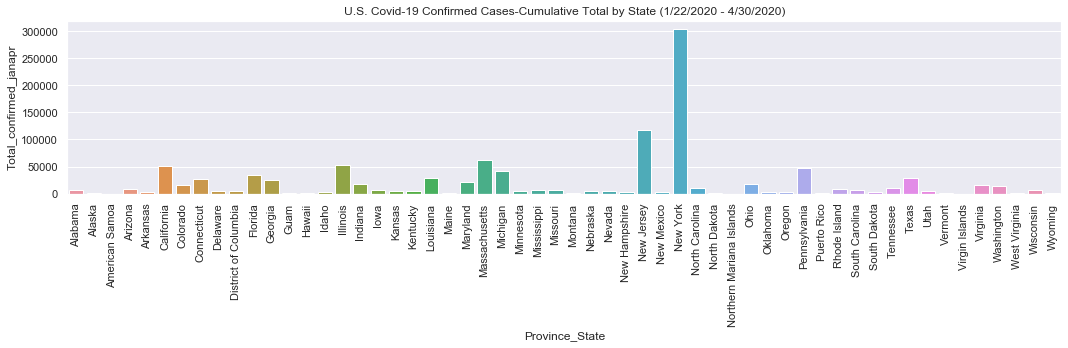

In [95]:
# Bar plot for Cumulative US Total - Confirmed cases by State Jan-Apr
plt.figure(figsize=(15,5))
plt.title('U.S. Covid-19 Confirmed Cases-Cumulative Total by State (1/22/2020 - 4/30/2020)')
ax=sns.barplot(x='Province_State', y='Total_confirmed_janapr', data=df_US_janapr_confirmed_count);

plt.xticks(rotation=90)
plt.tight_layout()

In [96]:
#sort dataset in descending order of confirmed cases and view top 10 states

df_US_janapr_confirmed_sorted=df_US_janapr_confirmed_count.sort_values('Total_confirmed_janapr',ascending=False)
df_US_janapr_confirmed_sorted.head(10)


Province_State  Total_confirmed_janapr
34       New York                  304372
32     New Jersey                  118174
23  Massachusetts                   61762
15       Illinois                   52540
5      California                   50130
41   Pennsylvania                   47971
24       Michigan                   41346
10        Florida                   33683
47          Texas                   28727
20      Louisiana                   27940

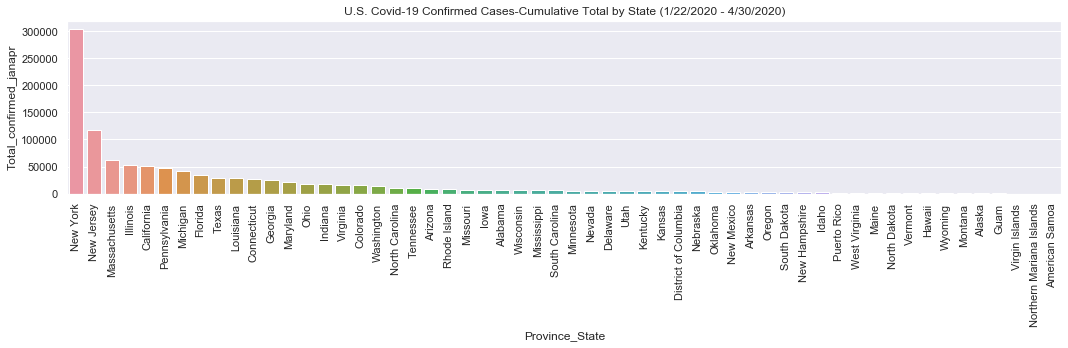

In [97]:
# Bar plot for Cumulative US Total - Confirmed cases by State Jan-Apr
plt.figure(figsize=(15,5))
plt.title('U.S. Covid-19 Confirmed Cases-Cumulative Total by State (1/22/2020 - 4/30/2020)')
ax=sns.barplot(x='Province_State', y='Total_confirmed_janapr', data=df_US_janapr_confirmed_sorted);

plt.xticks(rotation=90)
plt.tight_layout()

In [98]:
#count U.S. confirmed deaths by State in Jan 2020, set as_index=False to make your columns accessible

df_US_jan_death_count = df_US_deaths.groupby(['Province_State'], as_index=False).agg({'1/31/20': 'sum'})
df_US_jan_death_count.columns=['Province_State','Total_deaths_jan']

#count U.S. confirmed deaths by State from Jan-Feb 2020, set as_index=False to make your columns accessible

df_US_janfeb_death_count = df_US_deaths.groupby(['Province_State'], as_index=False).agg({'2/29/20': 'sum'})
df_US_janfeb_death_count.columns=['Province_State','Total_deaths_janfeb']

#count U.S. confirmed deaths by State from Jan-Mar 2020, set as_index=False to make your columns accessible

df_US_janmar_death_count = df_US_deaths.groupby(['Province_State'], as_index=False).agg({'3/31/20': 'sum'})

df_US_janmar_death_count.columns=['Province_State','Total_deaths_janmar']

In [99]:
#count U.S. confirmed deaths by State from Jan-Apr 2020, set as_index=False to make your columns accessible

df_US_janapr_death_count = df_US_deaths.groupby(['Province_State'], as_index=False).agg({'4/30/20': 'sum'},{'3/31/20': 'sum'},{'2/29/20': 'sum'},{'1/31/20': 'sum'})

df_US_janapr_death_count.columns=['Province_State','Total_deaths_janapr']

df_US_janapr_death_count

Province_State  Total_deaths_janapr
0                    Alabama                  272
1                     Alaska                    9
2             American Samoa                    0
3                    Arizona                  320
4                   Arkansas                   61
5                 California                 2031
6                   Colorado                  777
7                Connecticut                 2257
8                   Delaware                  152
9           Diamond Princess                    0
10      District of Columbia                  224
11                   Florida                 1268
12                   Georgia                 1132
13            Grand Princess                    3
14                      Guam                    5
15                    Hawaii                   16
16                     Idaho                   60
17                  Illinois                 2355
18                   Indiana                 1114
19                      Iowa                  162
20                    Kansas                  134
21                  Kentucky                  240
22                 Louisiana                 1905
23                     Maine                   53
24                  Maryland                 1140
25             Massachusetts                 3562
26                  Michigan                 3789
27                 Minnesota                  343
28               Mississippi                  261
29                  Missouri                  350
30                   Montana                   16
31                  Nebraska                   70
32                    Nevada                  243
33             New Hampshire                   72
34                New Jersey                 7228
35                New Mexico                  123
36                  New York                23587
37            North Carolina                  406
38              North Dakota                   19
39  Northern Mariana Islands                    2
40                      Ohio                  976
41                  Oklahoma                  222
42                    Oregon                  103
43              Pennsylvania                 2475
44               Puerto Rico                   92
45              Rhode Island                  266
46            South Carolina                  244
47              South Dakota                   17
48                 Tennessee                  199
49                     Texas                  812
50                      Utah                   46
51                   Vermont                   49
52            Virgin Islands                    4
53                  Virginia                  552
54                Washington                  814
55             West Virginia                   41
56                 Wisconsin                  316
57                   Wyoming                    7

In [100]:
#sort dataset in descending order of confirmed cases and view top 10 states

df_US_janapr_death_sorted=df_US_janapr_death_count.sort_values('Total_deaths_janapr',ascending=False)
df_US_janapr_death_sorted.head(10)

Province_State  Total_deaths_janapr
36       New York                23587
34     New Jersey                 7228
26       Michigan                 3789
25  Massachusetts                 3562
43   Pennsylvania                 2475
17       Illinois                 2355
7     Connecticut                 2257
5      California                 2031
22      Louisiana                 1905
11        Florida                 1268

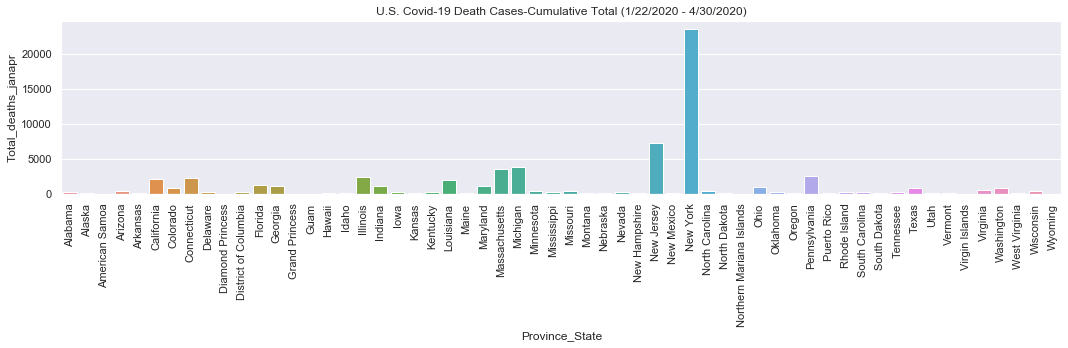

In [101]:
# Bar plot for Cumulative US Total Covid19 Deaths by State Jan-Apr
plt.figure(figsize=(15,5))
plt.title('U.S. Covid-19 Death Cases-Cumulative Total (1/22/2020 - 4/30/2020)')
ax=sns.barplot(x='Province_State', y='Total_deaths_janapr', data=df_US_janapr_death_count);

plt.xticks(rotation=90)
plt.tight_layout()

In [102]:
# merge US confirmed, death, population,land area, median temperature, age and hospitals dataframes
covid19_US1=pd.merge(df_US_janapr_confirmed_count, df_US_janapr_death_count, on="Province_State")

# what proportion of the Population has confirmed Covid19 tests?
# what proportion of the Population has been lost to Covid-19?
# what proportion of the confirmed Covid19 cases have died?

covid19_US2=pd.merge(covid19_US1,US_state_popn,on="Province_State")
covid19_US3=pd.merge(covid19_US2,US_land_area_sqmi,on="Province_State")
covid19_US4=pd.merge(covid19_US3,US_state_temp,on="Province_State")
covid19_US5=pd.merge(covid19_US4,US_state_med_age,on="Province_State")
covid19_US_janapr=pd.merge(covid19_US5,US_state_hosp,on="Province_State")


covid19_US_janapr.head()

Province_State  Total_confirmed_janapr  Total_deaths_janapr  Population  \
0        Alabama                    7088                  272     4903185   
1         Alaska                     355                    9      731545   
2        Arizona                    7655                  320     7278717   
3       Arkansas                    3113                   61     3017825   
4     California                   50130                 2031    39512223   

   land_area_sq_mi  Avg_F  Median_age  Number_of_hospitals  
0          50645.0   62.8        39.2                   90  
1         570641.0   26.6        34.6                   10  
2         113594.0   60.3        37.9                   72  
3          52035.0   60.4        38.3                   52  
4         155779.0   59.4        36.8                  342

In [103]:

# what is the population density by State
# what is the proportion of population vs hospitals per State

covid19_US_janapr['percent_popn_confirmed'] = 100*covid19_US_janapr['Total_confirmed_janapr']/covid19_US_janapr['Population']
covid19_US_janapr['percent_popn_dead'] = 100*covid19_US_janapr['Total_deaths_janapr']/covid19_US_janapr['Population']
covid19_US_janapr['percent_confirmed_who_died'] = 100*covid19_US_janapr['Total_deaths_janapr']/covid19_US_janapr['Total_confirmed_janapr']
covid19_US_janapr['popn_density']=covid19_US_janapr['Population']/covid19_US_janapr['land_area_sq_mi']
covid19_US_janapr['popn_hosp_ratio']=covid19_US_janapr['Population']/covid19_US_janapr['Number_of_hospitals']
covid19_US_janapr.head()

Province_State  Total_confirmed_janapr  Total_deaths_janapr  Population  \
0        Alabama                    7088                  272     4903185   
1         Alaska                     355                    9      731545   
2        Arizona                    7655                  320     7278717   
3       Arkansas                    3113                   61     3017825   
4     California                   50130                 2031    39512223   

   land_area_sq_mi  Avg_F  Median_age  Number_of_hospitals  \
0          50645.0   62.8        39.2                   90   
1         570641.0   26.6        34.6                   10   
2         113594.0   60.3        37.9                   72   
3          52035.0   60.4        38.3                   52   
4         155779.0   59.4        36.8                  342   

   percent_popn_confirmed  percent_popn_dead  percent_confirmed_who_died  \
0                0.144559           0.005547                    3.837472   
1                0.048527           0.001230                    2.535211   
2                0.105170           0.004396                    4.180274   
3                0.103154           0.002021                    1.959525   
4                0.126872           0.005140                    4.051466   

   popn_density  popn_hosp_ratio  
0     96.814789     54479.833333  
1      1.281971     73154.500000  
2     64.076597    101093.291667  
3     57.996060     58035.096154  
4    253.642808    115532.815789

In [104]:
# State death as proportion of State population, top 10
covid19_US_janapr_deathpopnproportion_sorted=covid19_US_janapr[['Province_State','percent_popn_dead']].sort_values('percent_popn_dead',ascending=False)
covid19_US_janapr_deathpopnproportion_sorted.head(10)

Province_State  percent_popn_dead
30       New York           0.121248
28     New Jersey           0.081376
6     Connecticut           0.063305
20  Massachusetts           0.051255
17      Louisiana           0.040978
21       Michigan           0.037940
37   Rhode Island           0.025109
36   Pennsylvania           0.019333
19       Maryland           0.018856
12       Illinois           0.018585

In [105]:
# recode percentage population who died column and count states in each percentage group
def perc_popn_dd_groups(series):
    if series == 0:
        return "none"
    elif 0.00 < series <= 0.01:
        return ">0-0.01%"
    elif 0.01 < series <= 0.05:
        return ">0.01-0.05%"
    elif 0.05 < series <= 0.1:
        return ">0.05-0.1%"
    elif 0.1 < series <= 0.15:
        return ">0.1-0.15%"


covid19_US_janapr_deathpopnproportion_sorted['perc_popn_dead_groups'] = covid19_US_janapr_deathpopnproportion_sorted['percent_popn_dead'].apply(perc_popn_dd_groups)

covid19_US_janapr_deathpopnproportion_sorted['perc_popn_dead_groups'].value_counts(sort=False)

>0.01-0.05%    11
>0.05-0.1%      3
>0.1-0.15%      1
>0-0.01%       34
Name: perc_popn_dead_groups, dtype: int64

In [106]:
# State death as proportion of confirmed cases in each State population, top 10
covid19_US_janapr_deathconfproportion_sorted=covid19_US_janapr[['Province_State','percent_confirmed_who_died']].sort_values('percent_confirmed_who_died',ascending=False)
covid19_US_janapr_deathconfproportion_sorted.head(10)

Province_State  percent_confirmed_who_died
21       Michigan                    9.164127
6     Connecticut                    8.286218
30       New York                    7.749399
17      Louisiana                    6.818182
22      Minnesota                    6.690072
13        Indiana                    6.246145
34       Oklahoma                    6.135987
28     New Jersey                    6.116405
20  Massachusetts                    5.767300
45     Washington                    5.705474

In [107]:
# recode percentage confirmed who died column and count states in each percentage group
def perc_conf_dd_groups(series):
    if series == 0:
        return "0%"
    elif 0 < series <= 2:
        return ">0-2%"
    elif 2 < series <= 4:
        return ">2-4%"
    elif 4 < series <= 6:
        return ">4-6%"
    elif 6 < series <= 8:
        return ">6-8%"
    elif 8 < series <= 10:
        return ">8-10%"


covid19_US_janapr_deathconfproportion_sorted['perc_confirmed_dead_groups'] = covid19_US_janapr_deathconfproportion_sorted['percent_confirmed_who_died'].apply(perc_conf_dd_groups)

covid19_US_janapr_deathconfproportion_sorted['perc_confirmed_dead_groups'].value_counts(sort=False)

>0-2%      7
>6-8%      6
>8-10%     2
>2-4%     16
>4-6%     18
Name: perc_confirmed_dead_groups, dtype: int64

In [108]:
# Proportion of State population confirmed positive for COVID-19, top 10
covid19_US_janapr_popnconfproportion_sorted=covid19_US_janapr[['Province_State','percent_popn_confirmed']].sort_values('percent_popn_confirmed',ascending=False)
covid19_US_janapr_popnconfproportion_sorted.head(10)


Province_State  percent_popn_confirmed
30       New York                1.564608
28     New Jersey                1.330460
20  Massachusetts                0.888725
6     Connecticut                0.763978
37   Rhode Island                0.711183
17      Louisiana                0.601016
7        Delaware                0.483587
12       Illinois                0.414621
21       Michigan                0.414004
36   Pennsylvania                0.374715

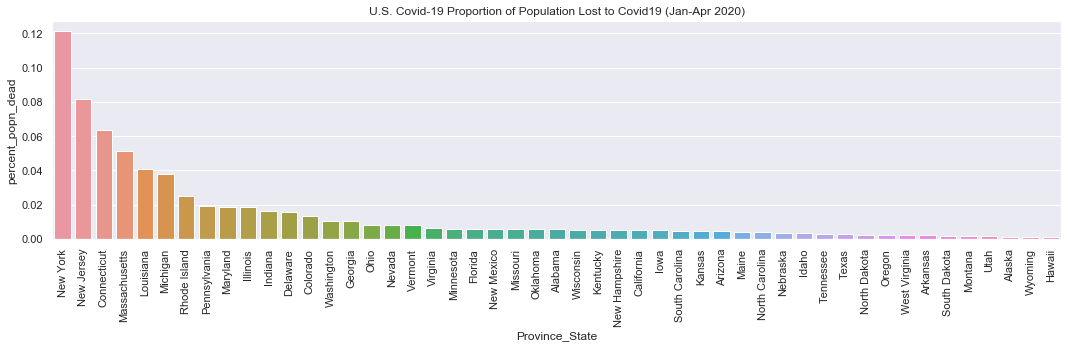

In [109]:
# Bar plot for Percentage of State population lost to Covid-19 between Jan and Apr 2020
plt.figure(figsize=(15,5))
plt.title('U.S. Covid-19 Proportion of Population Lost to Covid19 (Jan-Apr 2020)')
ax=sns.barplot(x='Province_State', y='percent_popn_dead', data=covid19_US_janapr_deathpopnproportion_sorted);

plt.xticks(rotation=90)
plt.tight_layout()

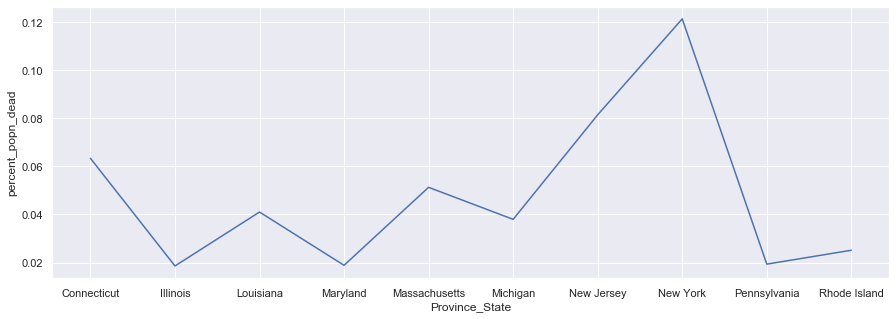

In [110]:
# Use seaborn to generate line plot of Percentage of State population lost to Covid-19 between Jan and Apr 2020
plt.figure(figsize=(15,5))
sns.lineplot(x='Province_State', y='percent_popn_dead', data=covid19_US_janapr_deathpopnproportion_sorted[:10]);

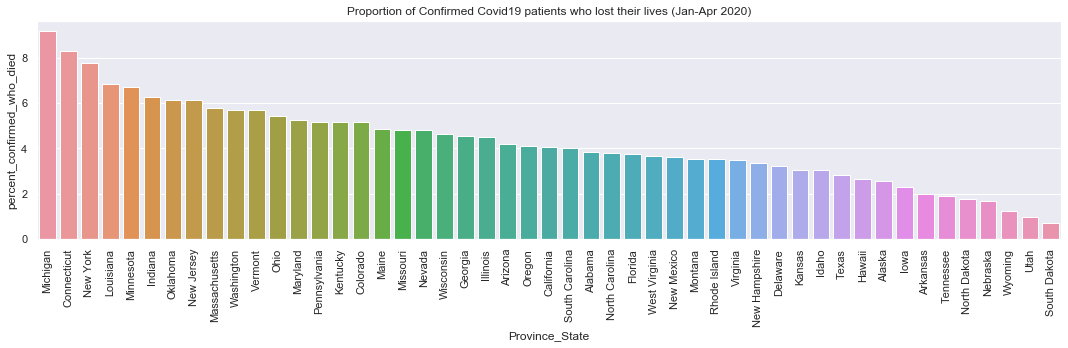

In [111]:
# Bar plot for Percentage of confirmed Covid-19 patients who died between Jan and Apr 2020
plt.figure(figsize=(15,5))
plt.title('Proportion of Confirmed Covid19 patients who lost their lives (Jan-Apr 2020)')
ax=sns.barplot(x='Province_State', y='percent_confirmed_who_died', data=covid19_US_janapr_deathconfproportion_sorted);

plt.xticks(rotation=90)
plt.tight_layout()

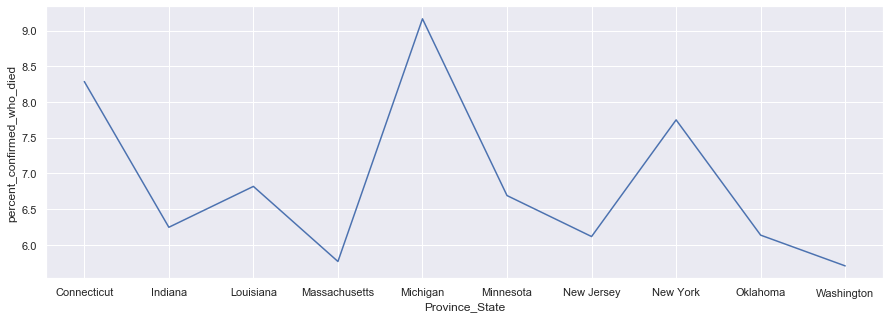

In [112]:
# Use seaborn to generate line plot of Percentage of confirmed Covid-19 cases who died by State between Jan and Apr 2020
plt.figure(figsize=(15,5))
sns.lineplot(x='Province_State', y='percent_confirmed_who_died', data=covid19_US_janapr_deathconfproportion_sorted[:10]);

In [113]:

df_US_janapr_death_count_pm = df_US_deaths.groupby(['Province_State'], as_index=False)[['4/30/20','3/31/20','2/29/20','1/31/20']].sum()

df_US_janapr_death_count_pm

Province_State  4/30/20  3/31/20  2/29/20  1/31/20
0                    Alabama      272       23        0        0
1                     Alaska        9        3        0        0
2             American Samoa        0        0        0        0
3                    Arizona      320       25        0        0
4                   Arkansas       61        8        0        0
5                 California     2031      173        0        0
6                   Colorado      777       69        0        0
7                Connecticut     2257       69        0        0
8                   Delaware      152       10        0        0
9           Diamond Princess        0        0        0        0
10      District of Columbia      224        9        0        0
11                   Florida     1268       85        0        0
12                   Georgia     1132      111        0        0
13            Grand Princess        3        3        0        0
14                      Guam        5        2        0        0
15                    Hawaii       16        0        0        0
16                     Idaho       60        8        0        0
17                  Illinois     2355       99        0        0
18                   Indiana     1114       49        0        0
19                      Iowa      162        7        0        0
20                    Kansas      134        9        0        0
21                  Kentucky      240       11        0        0
22                 Louisiana     1905      239        0        0
23                     Maine       53        5        0        0
24                  Maryland     1140       18        0        0
25             Massachusetts     3562       89        0        0
26                  Michigan     3789      259        0        0
27                 Minnesota      343       12        0        0
28               Mississippi      261       20        0        0
29                  Missouri      350       15        0        0
30                   Montana       16        5        0        0
31                  Nebraska       70        3        0        0
32                    Nevada      243       26        0        0
33             New Hampshire       72        3        0        0
34                New Jersey     7228      267        0        0
35                New Mexico      123        4        0        0
36                  New York    23587     3207        0        0
37            North Carolina      406       12        0        0
38              North Dakota       19        3        0        0
39  Northern Mariana Islands        2        0        0        0
40                      Ohio      976       55        0        0
41                  Oklahoma      222       23        0        0
42                    Oregon      103       18        0        0
43              Pennsylvania     2475       63        0        0
44               Puerto Rico       92        8        0        0
45              Rhode Island      266        8        0        0
46            South Carolina      244       22        0        0
47              South Dakota       17        1        0        0
48                 Tennessee      199       23        0        0
49                     Texas      812       54        0        0
50                      Utah       46        5        0        0
51                   Vermont       49       13        0        0
52            Virgin Islands        4        0        0        0
53                  Virginia      552       27        0        0
54                Washington      814      225        1        0
55             West Virginia       41        1        0        0
56                 Wisconsin      316       25        0        0
57                   Wyoming        7        0        0        0

In [114]:
#count U.S. confirmed cases by Region from 22 Jan-30 Apr 2020, set as_index=False to make your columns accessible

df_US_janapr_region_confirmed_count = df_US_corona.loc['confirmed'].groupby(['US_Region'], as_index=False).agg({'4/30/20': 'sum'})
df_US_janapr_region_confirmed_count


US_Region  4/30/20
0                      Midwest   168284
1                    Northeast   571151
2                        South   215590
3  Unincorporated_US_territory     1764
4                         West   106784

<function matplotlib.pyplot.show(*args, **kw)>

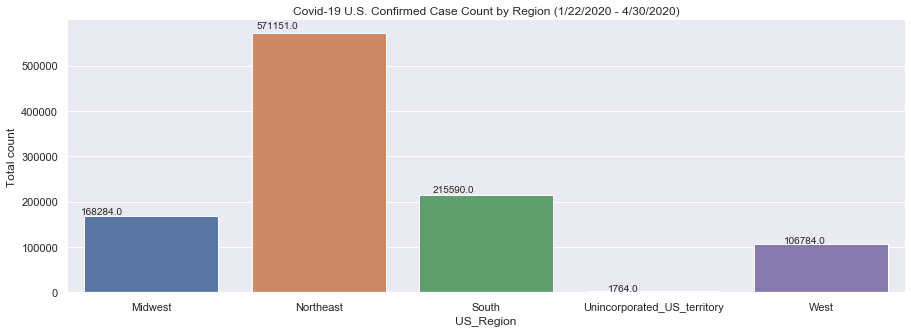

In [115]:
# Bar plot in seaborn depicting US Regional confirmed case count (cumulative Jan-Apr)

plt.figure(figsize=(15,5))
plt.title('Covid-19 U.S. Confirmed Case Count by Region (1/22/2020 - 4/30/2020)')
ax=sns.barplot(x='US_Region', y='4/30/20', data=df_US_janapr_region_confirmed_count);
ax.set_ylabel('Total count')

for p in ax.patches:

    ax.annotate(str(p.get_height()),(p.get_x() * 1.050,  p.get_height() * 1.020),fontsize=10)
    
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['top'].set_color('none')
    
plt.show

In [116]:
 #count U.S. death cases by Region from 20 Jan-30 Apr 2020, set as_index=False to make your columns accessible

df_US_janapr_region_death_count = df_US_corona.loc['deaths'].groupby(['US_Region'], as_index=False).agg({'4/30/20': 'sum'})
df_US_janapr_region_death_count

US_Region  4/30/20
0                      Midwest     9645
1                    Northeast    39549
2                        South     9131
3                   Unassigned        3
4  Unincorporated_US_territory      103
5                         West     4565

<function matplotlib.pyplot.show(*args, **kw)>

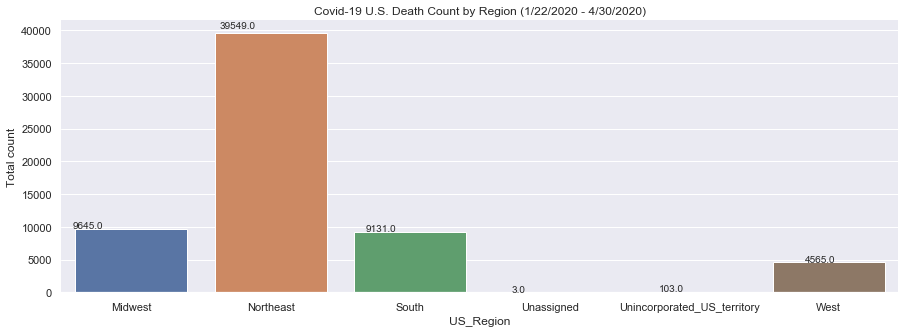

In [117]:
# Bar plot in seaborn depicting US Regional death count (cumulative Jan-Apr)

plt.figure(figsize=(15,5))
plt.title('Covid-19 U.S. Death Count by Region (1/22/2020 - 4/30/2020)')
ax=sns.barplot(x='US_Region', y='4/30/20', data=df_US_janapr_region_death_count);
ax.set_ylabel('Total count')

for p in ax.patches:

    ax.annotate(str(p.get_height()),(p.get_x() * 1.050,  p.get_height() * 1.020),fontsize=10)
    
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['top'].set_color('none')
    
plt.show


## 2.2 Bivariate and Multivariate Analysis

In [118]:
import folium
import urllib, json
from urllib.request import urlopen

In [119]:
# Are there higher relative deaths in densely populated states?

# add US Census Bureau designated Regions column to the US corona dataset

# Create a function to assign US Region names
US_Region = []
for row in covid19_US_janapr['Province_State']:
        if row == 'Connecticut':    US_Region.append('Northeast')
        elif row == 'Maine':  US_Region.append('Northeast')
        elif row == 'Massachusetts':  US_Region.append('Northeast')
        elif row == 'New Hampshire':  US_Region.append('Northeast')
        elif row == 'Rhode Island':  US_Region.append('Northeast')
        elif row == 'Vermont':  US_Region.append('Northeast')
        elif row == 'New Jersey':  US_Region.append('Northeast')
        elif row == 'New York':  US_Region.append('Northeast')
        elif row == 'Pennsylvania':  US_Region.append('Northeast')
        elif row == 'Illinois':  US_Region.append('Midwest')
        elif row == 'Indiana':  US_Region.append('Midwest')
        elif row == 'Michigan':  US_Region.append('Midwest')
        elif row == 'Ohio':  US_Region.append('Midwest')
        elif row == 'Wisconsin':  US_Region.append('Midwest')
        elif row == 'Iowa':  US_Region.append('Midwest')
        elif row == 'Kansas':  US_Region.append('Midwest')
        elif row == 'Minnesota':  US_Region.append('Midwest')
        elif row == 'Missouri':  US_Region.append('Midwest')
        elif row == 'Nebraska':  US_Region.append('Midwest')
        elif row == 'North Dakota':  US_Region.append('Midwest')
        elif row == 'South Dakota':  US_Region.append('Midwest')
        elif row == 'Delaware':  US_Region.append('South')
        elif row == 'Florida':  US_Region.append('South')
        elif row == 'Georgia':  US_Region.append('South')
        elif row == 'Maryland':  US_Region.append('South')
        elif row == 'North Carolina':  US_Region.append('South')
        elif row == 'South Carolina':  US_Region.append('South')
        elif row == 'Virginia':  US_Region.append('South')
        elif row == 'District of Columbia':  US_Region.append('South')
        elif row == 'West Virginia':  US_Region.append('South')
        elif row == 'Alabama':  US_Region.append('South')
        elif row == 'Kentucky':  US_Region.append('South')
        elif row == 'Mississippi':  US_Region.append('South')
        elif row == 'Tennessee':  US_Region.append('South')
        elif row == 'Arkansas':  US_Region.append('South')
        elif row == 'Louisiana':  US_Region.append('South')
        elif row == 'Oklahoma':  US_Region.append('South')
        elif row == 'Texas':  US_Region.append('South')
        elif row == 'Arizona':  US_Region.append('West')
        elif row == 'Colorado':  US_Region.append('West')
        elif row == 'Idaho':  US_Region.append('West')
        elif row == 'Montana':  US_Region.append('West')
        elif row == 'Nevada':  US_Region.append('West')
        elif row == 'New Mexico':  US_Region.append('West')
        elif row == 'Utah':  US_Region.append('West')
        elif row == 'Wyoming':  US_Region.append('West')
        elif row == 'Alaska':  US_Region.append('West')
        elif row == 'California':  US_Region.append('West')
        elif row == 'Hawaii':  US_Region.append('West')
        elif row == 'Oregon':  US_Region.append('West')
        elif row == 'Washington':  US_Region.append('West')
        elif row == 'American Samoa':  US_Region.append('Unincorporated_US_territory')
        elif row == 'Guam':  US_Region.append('Unincorporated_US_territory')
        elif row == 'Northern Mariana Islands':  US_Region.append('Unincorporated_US_territory')
        elif row == 'Puerto Rico':  US_Region.append('Unincorporated_US_territory')
        elif row == 'Virgin Islands':  US_Region.append('Unincorporated_US_territory')
 
        
        else:           US_Region.append('Unassigned')
            
# Create a column from the list
covid19_US_janapr['US_Region'] = US_Region
    
# View the new dataframe
covid19_US_janapr.head(55)


Province_State  Total_confirmed_janapr  Total_deaths_janapr  Population  \
0          Alabama                    7088                  272     4903185   
1           Alaska                     355                    9      731545   
2          Arizona                    7655                  320     7278717   
3         Arkansas                    3113                   61     3017825   
4       California                   50130                 2031    39512223   
5         Colorado                   15126                  777     5758736   
6      Connecticut                   27238                 2257     3565287   
7         Delaware                    4709                  152      973764   
8          Florida                   33683                 1268    21477737   
9          Georgia                   24908                 1132    10617423   
10          Hawaii                     609                   16     1415872   
11           Idaho                    1984                   60     1787065   
12        Illinois                   52540                 2355    12671821   
13         Indiana                   17835                 1114     6732219   
14            Iowa                    7121                  162     3155070   
15          Kansas                    4413                  134     2913314   
16        Kentucky                    4655                  240     4467673   
17       Louisiana                   27940                 1905     4648794   
18           Maine                    1094                   53     1344212   
19        Maryland                   21742                 1140     6045680   
20   Massachusetts                   61762                 3562     6949503   
21        Michigan                   41346                 3789     9986857   
22       Minnesota                    5127                  343     5639632   
23        Missouri                    7272                  350     6137428   
24         Montana                     453                   16     1068778   
25        Nebraska                    4233                   70     1934408   
26          Nevada                    5053                  243     3080156   
27   New Hampshire                    2143                   72     1359711   
28      New Jersey                  118174                 7228     8882190   
29      New Mexico                    3411                  123     2096829   
30        New York                  304372                23587    19453561   
31  North Carolina                   10754                  406    10488084   
32    North Dakota                    1067                   19      762062   
33            Ohio                   18027                  976    11689100   
34        Oklahoma                    3618                  222     3956971   
35          Oregon                    2510                  103     4217737   
36    Pennsylvania                   47971                 2475    12801989   
37    Rhode Island                    7534                  266     1059361   
38  South Carolina                    6095                  244     5148714   
39    South Dakota                    2449                   17      884659   
40       Tennessee                   10448                  199     6833174   
41           Texas                   28727                  812    28995881   
42            Utah                    4672                   46     3205958   
43         Vermont                     863                   49      623989   
44        Virginia                   15847                  552     8535519   
45      Washington                   14267                  814     7614893   
46   West Virginia                    1125                   41     1792147   
47       Wisconsin                    6854                  316     5822434   
48         Wyoming                     559                    7      578759   

    land_area_sq_mi  Avg_F  Median_age  Number_of_hos

In [120]:
# Assign each State to its standard federal regions according to OMB (Office of Management and Budget) Circular A-105, "Standard Federal Regions" 

  
# Create a function to assign US Standard Federal Region names
US_Standard_Federal_Region = []
for row in covid19_US_janapr['Province_State']:
        if row == 'Connecticut':    US_Standard_Federal_Region.append('Region-I')
        elif row == 'Maine':  US_Standard_Federal_Region.append('Region-I')
        elif row == 'Massachusetts':  US_Standard_Federal_Region.append('Region-I')
        elif row == 'New Hampshire':  US_Standard_Federal_Region.append('Region-I')
        elif row == 'Rhode Island':  US_Standard_Federal_Region.append('Region-I')
        elif row == 'Vermont':  US_Standard_Federal_Region.append('Region-I')
        elif row == 'New Jersey':  US_Standard_Federal_Region.append('Region-II')
        elif row == 'New York':  US_Standard_Federal_Region.append('Region-II')
        elif row == 'Pennsylvania':  US_Standard_Federal_Region.append('Region-III')
        elif row == 'Illinois':  US_Standard_Federal_Region.append('Region-V')
        elif row == 'Indiana':  US_Standard_Federal_Region.append('Region-V')
        elif row == 'Michigan':  US_Standard_Federal_Region.append('Region-V')
        elif row == 'Ohio':  US_Standard_Federal_Region.append('Region-V')
        elif row == 'Wisconsin':  US_Standard_Federal_Region.append('Region-V')
        elif row == 'Iowa':  US_Standard_Federal_Region.append('Region-VII')
        elif row == 'Kansas':  US_Standard_Federal_Region.append('Region-VII')
        elif row == 'Minnesota':  US_Standard_Federal_Region.append('Region-V')
        elif row == 'Missouri':  US_Standard_Federal_Region.append('Region-VII')
        elif row == 'Nebraska':  US_Standard_Federal_Region.append('Region-VII')
        elif row == 'North Dakota':  US_Standard_Federal_Region.append('Region-VIII')
        elif row == 'South Dakota':  US_Standard_Federal_Region.append('Region-VIII')
        elif row == 'Delaware':  US_Standard_Federal_Region.append('Region-III')
        elif row == 'Florida':  US_Standard_Federal_Region.append('Region-IV')
        elif row == 'Georgia':  US_Standard_Federal_Region.append('Region-IV')
        elif row == 'Maryland':  US_Standard_Federal_Region.append('Region-III')
        elif row == 'North Carolina':  US_Standard_Federal_Region.append('Region-IV')
        elif row == 'South Carolina':  US_Standard_Federal_Region.append('Region-IV')
        elif row == 'Virginia':  US_Standard_Federal_Region.append('Region-III')
        elif row == 'District of Columbia':  US_Standard_Federal_Region.append('Region-III')
        elif row == 'West Virginia':  US_Standard_Federal_Region.append('Region-III')
        elif row == 'Alabama':  US_Standard_Federal_Region.append('Region-IV')
        elif row == 'Kentucky':  US_Standard_Federal_Region.append('Region-IV')
        elif row == 'Mississippi':  US_Standard_Federal_Region.append('Region-IV')
        elif row == 'Tennessee':  US_Standard_Federal_Region.append('Region-IV')
        elif row == 'Arkansas':  US_Standard_Federal_Region.append('Region-VI')
        elif row == 'Louisiana':  US_Standard_Federal_Region.append('Region-VI')
        elif row == 'Oklahoma':  US_Standard_Federal_Region.append('Region-VI')
        elif row == 'Texas':  US_Standard_Federal_Region.append('Region-VI')
        elif row == 'Arizona':  US_Standard_Federal_Region.append('Region-IX')
        elif row == 'Colorado':  US_Standard_Federal_Region.append('Region-VIII')
        elif row == 'Idaho':  US_Standard_Federal_Region.append('Region-X')
        elif row == 'Montana':  US_Standard_Federal_Region.append('Region-VIII')
        elif row == 'Nevada':  US_Standard_Federal_Region.append('Region-IX')
        elif row == 'New Mexico':  US_Standard_Federal_Region.append('Region-VI')
        elif row == 'Utah':  US_Standard_Federal_Region.append('Region-VIII')
        elif row == 'Wyoming':  US_Standard_Federal_Region.append('Region-VIII')
        elif row == 'Alaska':  US_Standard_Federal_Region.append('Region-X')
        elif row == 'California':  US_Standard_Federal_Region.append('Region-IX')
        elif row == 'Hawaii':  US_Standard_Federal_Region.append('Region-IX')
        elif row == 'Oregon':  US_Standard_Federal_Region.append('Region-X')
        elif row == 'Washington':  US_Standard_Federal_Region.append('Region-X')
        elif row == 'American Samoa':  US_Standard_Federal_Region.append('Region-IX')
        elif row == 'Guam':  US_Standard_Federal_Region.append('Region-IX')
        elif row == 'Northern Mariana Islands':  US_Standard_Federal_Region.append('Region-IX')
        elif row == 'Puerto Rico':  US_Standard_Federal_Region.append('Region-II')
        elif row == 'Virgin Islands':  US_Standard_Federal_Region.append('Region-II')
 
        
        else:           US_Standard_Federal_Region.append('Unassigned')
            
# Create a column from the list
covid19_US_janapr['US_Standard_Federal_Region'] = US_Standard_Federal_Region
    
# View the new dataframe
covid19_US_janapr.head(50)

Province_State  Total_confirmed_janapr  Total_deaths_janapr  Population  \
0          Alabama                    7088                  272     4903185   
1           Alaska                     355                    9      731545   
2          Arizona                    7655                  320     7278717   
3         Arkansas                    3113                   61     3017825   
4       California                   50130                 2031    39512223   
5         Colorado                   15126                  777     5758736   
6      Connecticut                   27238                 2257     3565287   
7         Delaware                    4709                  152      973764   
8          Florida                   33683                 1268    21477737   
9          Georgia                   24908                 1132    10617423   
10          Hawaii                     609                   16     1415872   
11           Idaho                    1984                   60     1787065   
12        Illinois                   52540                 2355    12671821   
13         Indiana                   17835                 1114     6732219   
14            Iowa                    7121                  162     3155070   
15          Kansas                    4413                  134     2913314   
16        Kentucky                    4655                  240     4467673   
17       Louisiana                   27940                 1905     4648794   
18           Maine                    1094                   53     1344212   
19        Maryland                   21742                 1140     6045680   
20   Massachusetts                   61762                 3562     6949503   
21        Michigan                   41346                 3789     9986857   
22       Minnesota                    5127                  343     5639632   
23        Missouri                    7272                  350     6137428   
24         Montana                     453                   16     1068778   
25        Nebraska                    4233                   70     1934408   
26          Nevada                    5053                  243     3080156   
27   New Hampshire                    2143                   72     1359711   
28      New Jersey                  118174                 7228     8882190   
29      New Mexico                    3411                  123     2096829   
30        New York                  304372                23587    19453561   
31  North Carolina                   10754                  406    10488084   
32    North Dakota                    1067                   19      762062   
33            Ohio                   18027                  976    11689100   
34        Oklahoma                    3618                  222     3956971   
35          Oregon                    2510                  103     4217737   
36    Pennsylvania                   47971                 2475    12801989   
37    Rhode Island                    7534                  266     1059361   
38  South Carolina                    6095                  244     5148714   
39    South Dakota                    2449                   17      884659   
40       Tennessee                   10448                  199     6833174   
41           Texas                   28727                  812    28995881   
42            Utah                    4672                   46     3205958   
43         Vermont                     863                   49      623989   
44        Virginia                   15847                  552     8535519   
45      Washington                   14267                  814     7614893   
46   West Virginia                    1125                   41     1792147   
47       Wisconsin                    6854                  316     5822434   
48         Wyoming                     559                    7      578759   

    land_area_sq_mi  Avg_F  Median_age  Number_of_hos

In [121]:
# summary death statistics
covid19_US_janapr[['percent_popn_confirmed','percent_popn_dead','percent_confirmed_who_died','Total_deaths_janapr']].describe()

percent_popn_confirmed  percent_popn_dead  percent_confirmed_who_died  \
count               49.000000          49.000000                   49.000000   
mean                 0.268461           0.014052                    4.229079   
std                  0.310790           0.022720                    1.848869   
min                  0.042385           0.001130                    0.694161   
25%                  0.104193           0.003357                    3.036483   
50%                  0.152901           0.005547                    4.051466   
75%                  0.264920           0.013493                    5.243308   
max                  1.564608           0.121248                    9.164127   

       Total_deaths_janapr  
count            49.000000  
mean           1273.571429  
std            3507.218651  
min               7.000000  
25%              70.000000  
50%             266.000000  
75%            1114.000000  
max           23587.000000

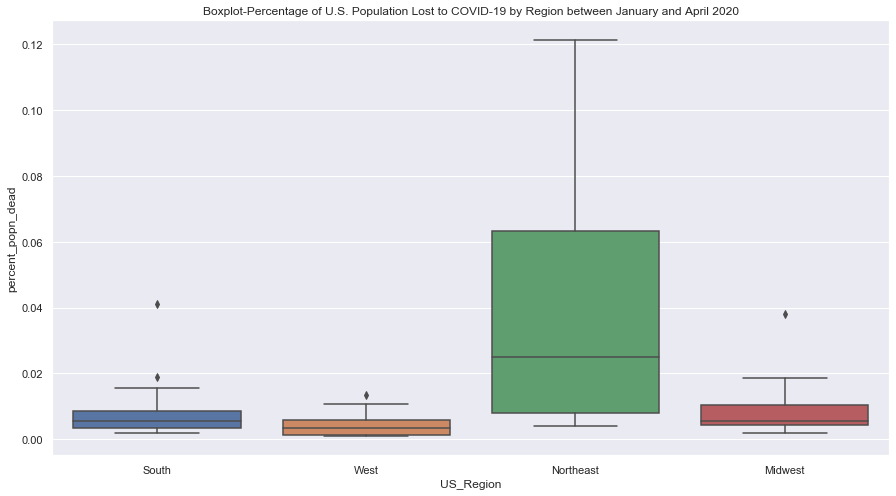

In [122]:
plt.figure(figsize=(15,8))
plt.title('Boxplot-Percentage of U.S. Population Lost to COVID-19 by Region between January and April 2020')
ax = sns.boxplot(x="US_Region", y="percent_popn_dead", data=covid19_US_janapr)



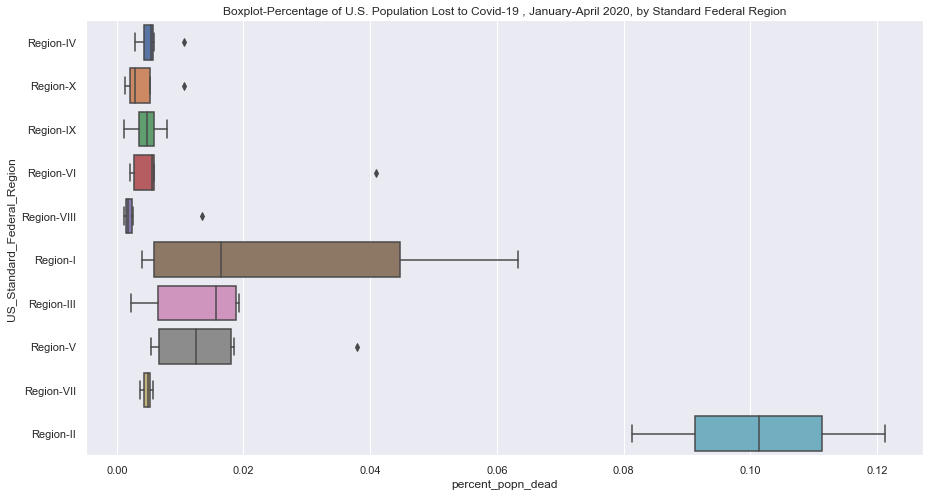

In [123]:
plt.figure(figsize=(15,8))
plt.title('Boxplot-Percentage of U.S. Population Lost to Covid-19 , January-April 2020, by Standard Federal Region')
ax = sns.boxplot(x="percent_popn_dead", y="US_Standard_Federal_Region", data=covid19_US_janapr)

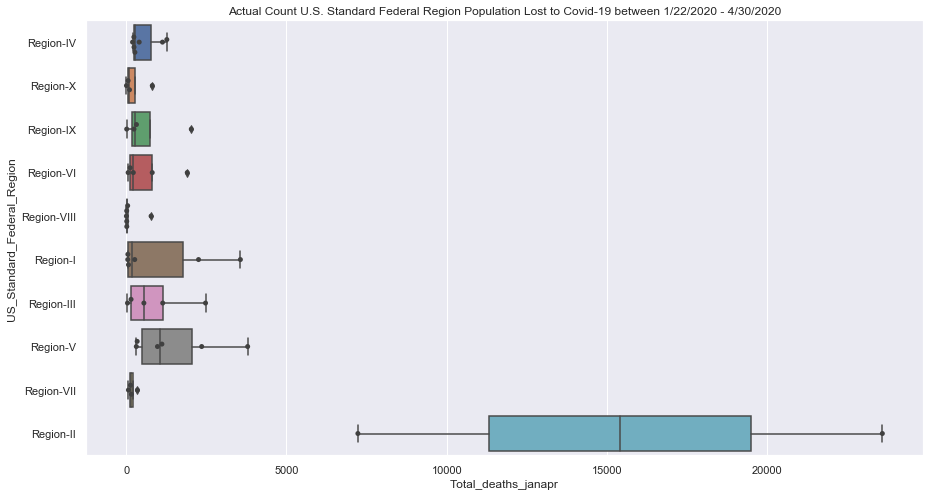

In [124]:
plt.figure(figsize=(15,8))
plt.title('Actual Count U.S. Standard Federal Region Population Lost to Covid-19 between 1/22/2020 - 4/30/2020')
ax = sns.boxplot(x="Total_deaths_janapr", y="US_Standard_Federal_Region", data=covid19_US_janapr)
ax = sns.swarmplot(x="Total_deaths_janapr", y="US_Standard_Federal_Region", data=covid19_US_janapr, color=".25")

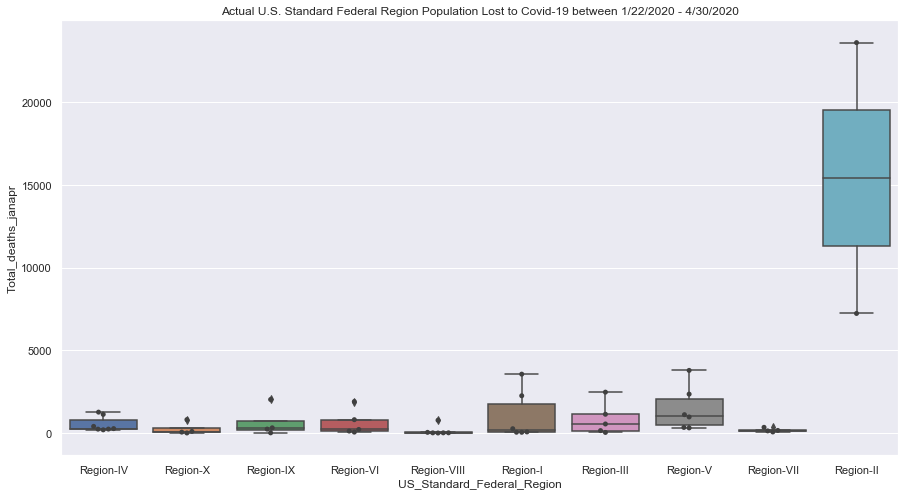

In [125]:
plt.figure(figsize=(15,8))
plt.title('Actual U.S. Standard Federal Region Population Lost to Covid-19 between 1/22/2020 - 4/30/2020')
ax = sns.boxplot(x="US_Standard_Federal_Region", y="Total_deaths_janapr", data=covid19_US_janapr)
ax = sns.swarmplot(x="US_Standard_Federal_Region", y="Total_deaths_janapr", data=covid19_US_janapr, color=".25")

In [126]:
# Exploring strength of linear correlation of population density vs percent population confirmed
# Pearson's correlation-test of association. Is there a statistically significant relationship between a State's average temperature, median age,population density or population_hospital_ratio and proportion of State population who died from COVID-19?

import pingouin as pg
pg.corr(x=covid19_US_janapr['popn_density'], y=covid19_US_janapr['percent_popn_confirmed'])

n        r         CI95%        r2    adj_r2         p-val  \
pearson  49  0.74743  [0.59, 0.85]  0.558651  0.539462  6.849083e-10   

              BF10     power  
pearson  1.843e+07  0.999998

In [127]:
pg.corr(x=covid19_US_janapr['Avg_F'], y=covid19_US_janapr['percent_popn_confirmed'])

n         r          CI95%        r2   adj_r2     p-val  BF10  \
pearson  49 -0.053868  [-0.33, 0.23]  0.002902 -0.04045  0.713165  0.19   

            power  
pearson  0.065402

In [128]:
pg.corr(x=covid19_US_janapr['Median_age'], y=covid19_US_janapr['percent_popn_confirmed'])

n         r         CI95%        r2    adj_r2     p-val   BF10  \
pearson  49  0.136691  [-0.15, 0.4]  0.018684 -0.023982  0.348995  0.273   

            power  
pearson  0.155667

In [129]:
pg.corr(x=covid19_US_janapr['popn_hosp_ratio'], y=covid19_US_janapr['percent_popn_confirmed'])

n         r         CI95%        r2    adj_r2     p-val   BF10  \
pearson  49  0.304575  [0.03, 0.54]  0.092766  0.053321  0.033351  1.606   

            power  
pearson  0.576234

In [130]:

pg.corr(x=covid19_US_janapr['popn_density'], y=covid19_US_janapr['percent_popn_dead'])

n         r         CI95%        r2    adj_r2         p-val  \
pearson  49  0.643897  [0.44, 0.78]  0.414603  0.389151  5.999295e-07   

              BF10     power  
pearson  3.159e+04  0.999462

In [131]:
# spearman's correlation 
corr = pg.pairwise_corr(covid19_US_janapr, columns=['percent_popn_confirmed', 'Avg_F', 'Median_age', 'popn_hosp_ratio', 'popn_density'], method='spearman')
corr

X                Y    method       tail   n         r  \
0  percent_popn_confirmed            Avg_F  spearman  two-sided  49  0.030410   
1  percent_popn_confirmed       Median_age  spearman  two-sided  49  0.112299   
2  percent_popn_confirmed  popn_hosp_ratio  spearman  two-sided  49  0.275816   
3  percent_popn_confirmed     popn_density  spearman  two-sided  49  0.545918   
4                   Avg_F       Median_age  spearman  two-sided  49 -0.051381   
5                   Avg_F  popn_hosp_ratio  spearman  two-sided  49 -0.008980   
6                   Avg_F     popn_density  spearman  two-sided  49  0.408450   
7              Median_age  popn_hosp_ratio  spearman  two-sided  49  0.154361   
8              Median_age     popn_density  spearman  two-sided  49  0.487379   
9         popn_hosp_ratio     popn_density  spearman  two-sided  49  0.490918   

           CI95%        r2    adj_r2         z     p-unc     power  
0  [-0.25, 0.31]  0.000925 -0.042513  0.030420  0.835677  0.054653  
1  [-0.17, 0.38]  0.012611 -0.030319  0.112775  0.442346  0.120156  
2  [-0.01, 0.52]  0.076075  0.035904  0.283148  0.055077  0.490943  
3   [0.31, 0.72]  0.298027  0.267506  0.612548  0.000050  0.987138  
4  [-0.33, 0.23]  0.002640 -0.040723 -0.051426  0.725879  0.063970  
5  [-0.29, 0.27]  0.000081 -0.043394 -0.008981  0.951168  0.050112  
6   [0.14, 0.62]  0.166831  0.130606  0.433749  0.003573  0.843266  
7  [-0.13, 0.42]  0.023827 -0.018615  0.155604  0.289603  0.186233  
8   [0.24, 0.68]  0.237538  0.204388  0.532617  0.000383  0.953919  
9   [0.24, 0.68]  0.241001  0.208001  0.537270  0.000342  0.956911

In [132]:
# Calculate the Pearson correlation between percent population dead vs Age,Temperature,Population density and Median Age in State
corr = pg.pairwise_corr(covid19_US_janapr, columns=[['percent_popn_dead'], ['popn_density', 'Avg_F', 'Median_age', 'popn_hosp_ratio']], method='pearson')
corr

X                Y   method       tail   n         r  \
0  percent_popn_dead     popn_density  pearson  two-sided  49  0.643897   
1  percent_popn_dead            Avg_F  pearson  two-sided  49 -0.066174   
2  percent_popn_dead       Median_age  pearson  two-sided  49  0.160825   
3  percent_popn_dead  popn_hosp_ratio  pearson  two-sided  49  0.296700   

           CI95%        r2    adj_r2         z         p-unc       BF10  \
0   [0.44, 0.78]  0.414603  0.389151  0.764802  5.999295e-07  3.159e+04   
1  [-0.34, 0.22]  0.004379 -0.038909 -0.066271  6.514451e-01      0.197   
2  [-0.13, 0.42]  0.025865 -0.016489  0.162234  2.696288e-01      0.322   
3   [0.02, 0.53]  0.088031  0.048380  0.305897  3.843813e-02      1.428   

      power  
0  0.999462  
1  0.073532  
2  0.198431  
3  0.552904

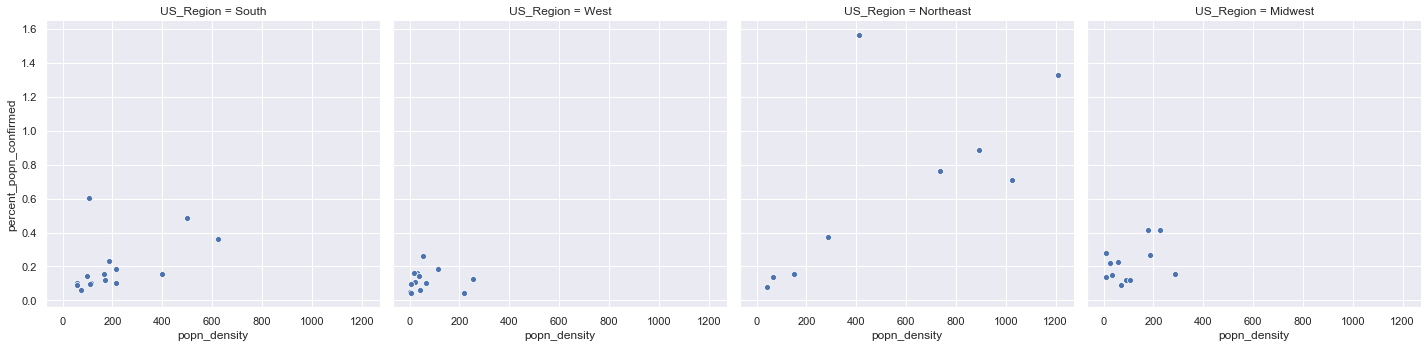

In [133]:
# Exploring differences in percentage of population lost when comparing more densely and less densely populated U.S. Regions 
g = sns.relplot(x="popn_density", y="percent_popn_confirmed",
                 col="US_Region", kind="scatter", data=covid19_US_janapr)

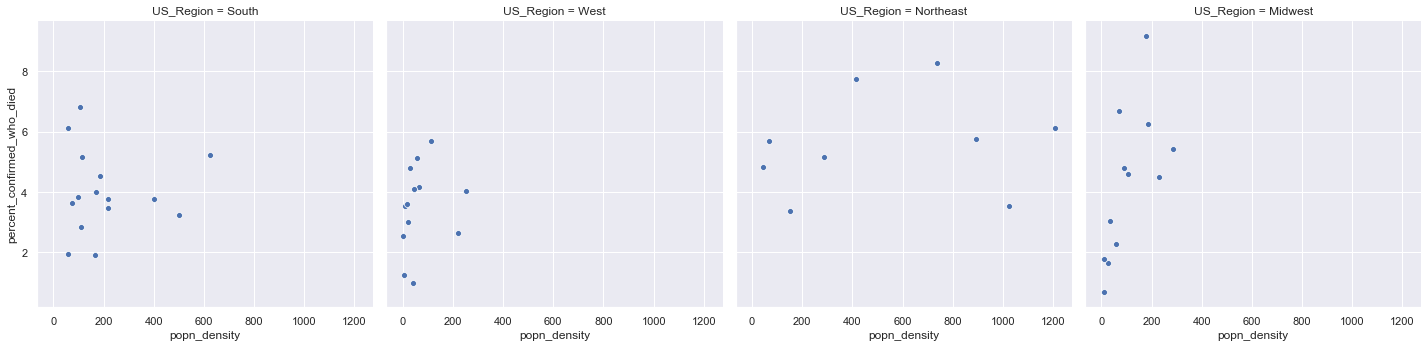

In [134]:
# Exploring differences in percentage of population lost when comparing more densely and less densely populated U.S. Regions 
g = sns.relplot(x="popn_density", y="percent_confirmed_who_died",
                 col="US_Region", kind="scatter", data=covid19_US_janapr)

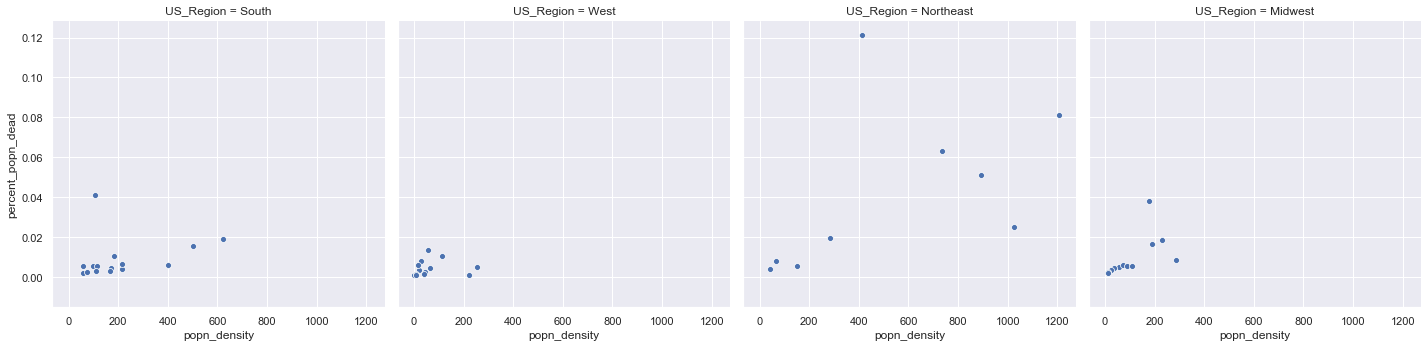

In [135]:
# Exploring differences in percentage of population lost when comparing more densely and less densely populated U.S. Regions 
g = sns.relplot(x="popn_density", y="percent_popn_dead",
                 col="US_Region", kind="scatter", data=covid19_US_janapr)

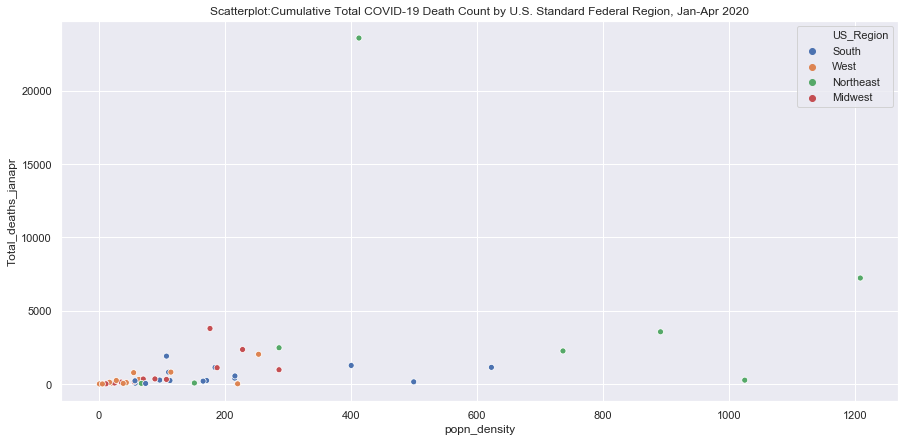

In [136]:
plt.figure(figsize=(15,7))
plt.title('Scatterplot:Cumulative Total COVID-19 Death Count by U.S. Standard Federal Region, Jan-Apr 2020')
ax = sns.scatterplot(x="popn_density", y="Total_deaths_janapr", hue="US_Region",data=covid19_US_janapr)

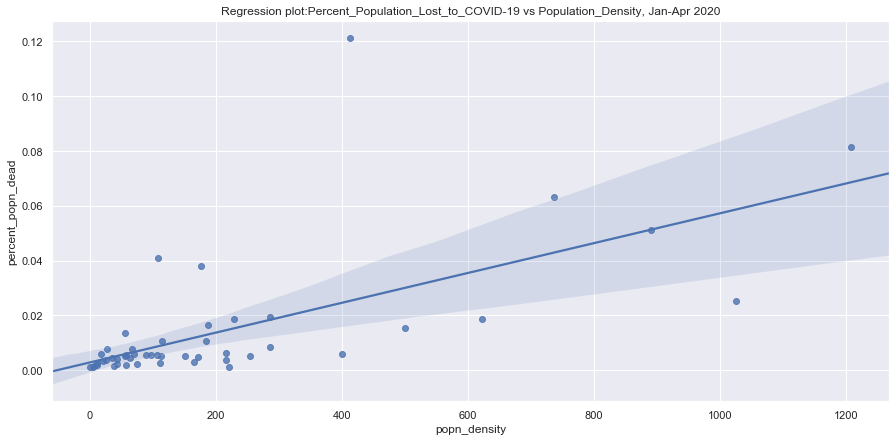

In [137]:
# regression plot % popn dead vs popn density
plt.figure(figsize=(15,7))
plt.title('Regression plot:Percent_Population_Lost_to_COVID-19 vs Population_Density, Jan-Apr 2020')
ax = sns.regplot(x="popn_density", y="percent_popn_dead",data=covid19_US_janapr)

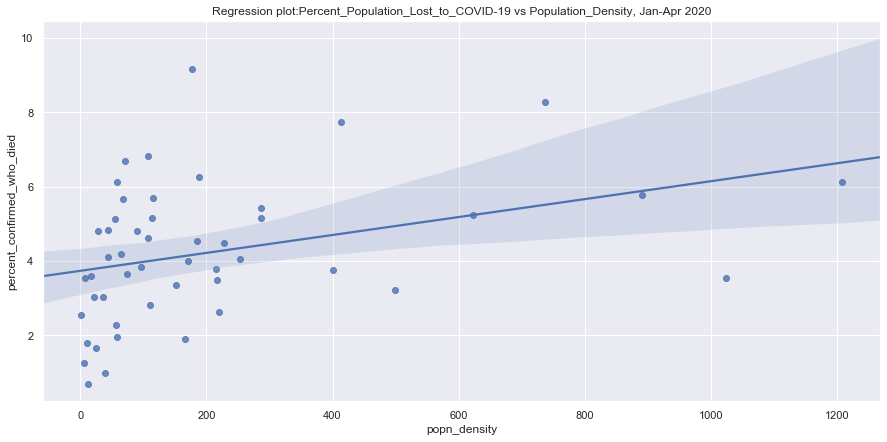

In [138]:
# regression plot % confirmed dead vs popn density
plt.figure(figsize=(15,7))
plt.title('Regression plot:Percent_Population_Lost_to_COVID-19 vs Population_Density, Jan-Apr 2020')
ax = sns.regplot(x="popn_density", y="percent_confirmed_who_died",data=covid19_US_janapr)


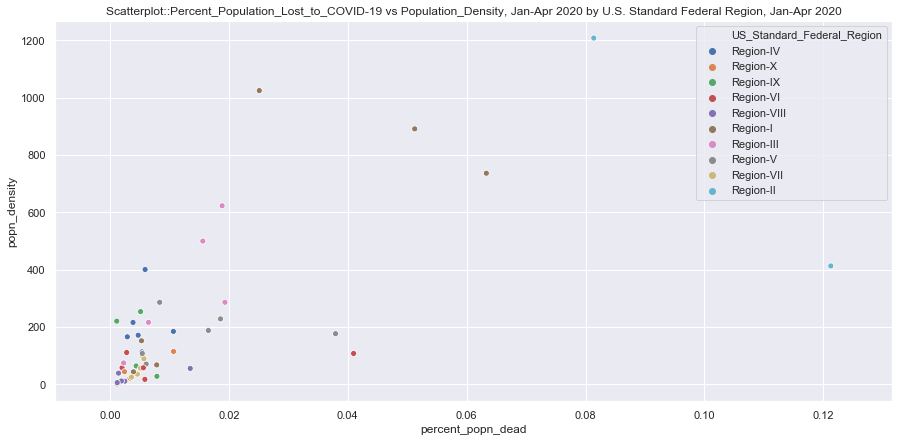

In [139]:
# Scatter plot percent population dead vs population density disaggregated by Standard federal region
plt.figure(figsize=(15,7))
plt.title('Scatterplot::Percent_Population_Lost_to_COVID-19 vs Population_Density, Jan-Apr 2020 by U.S. Standard Federal Region, Jan-Apr 2020')
ax = sns.scatterplot(x="percent_popn_dead", y="popn_density", hue="US_Standard_Federal_Region",data=covid19_US_janapr)

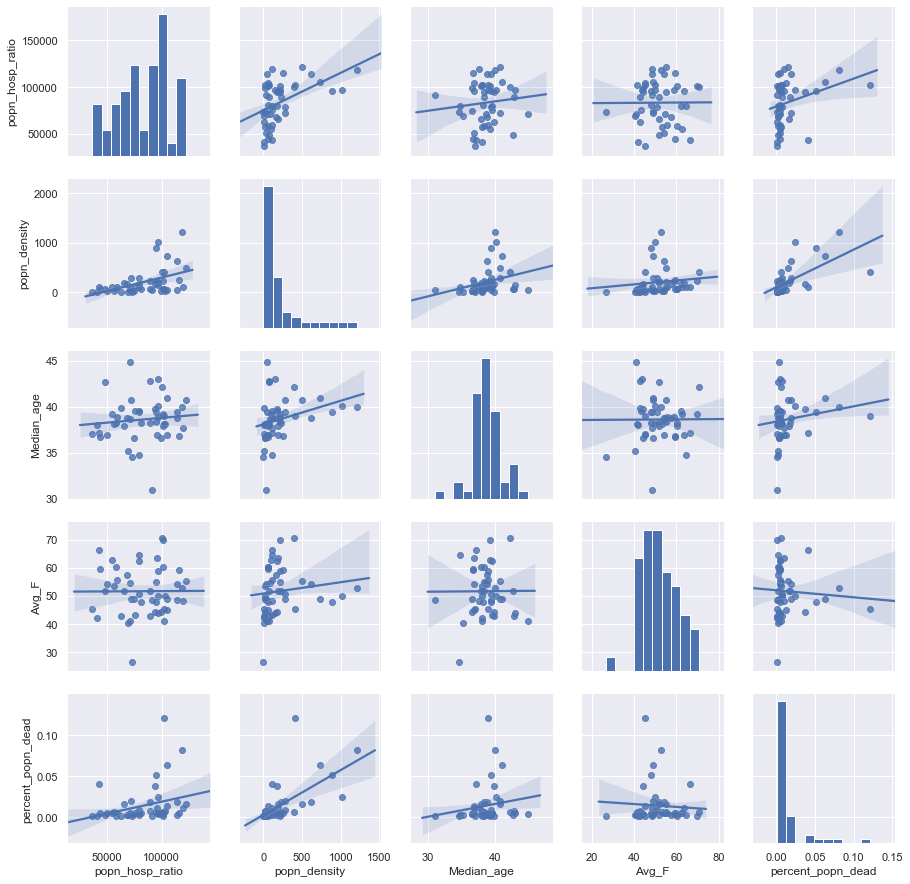

In [140]:
# Create the default pairplot to explore relations to study more in-depth (Exploratory Data Analysis)
sns.pairplot(covid19_US_janapr[['popn_hosp_ratio','popn_density','Median_age','Avg_F','percent_popn_dead']],kind='reg')
plt.show()

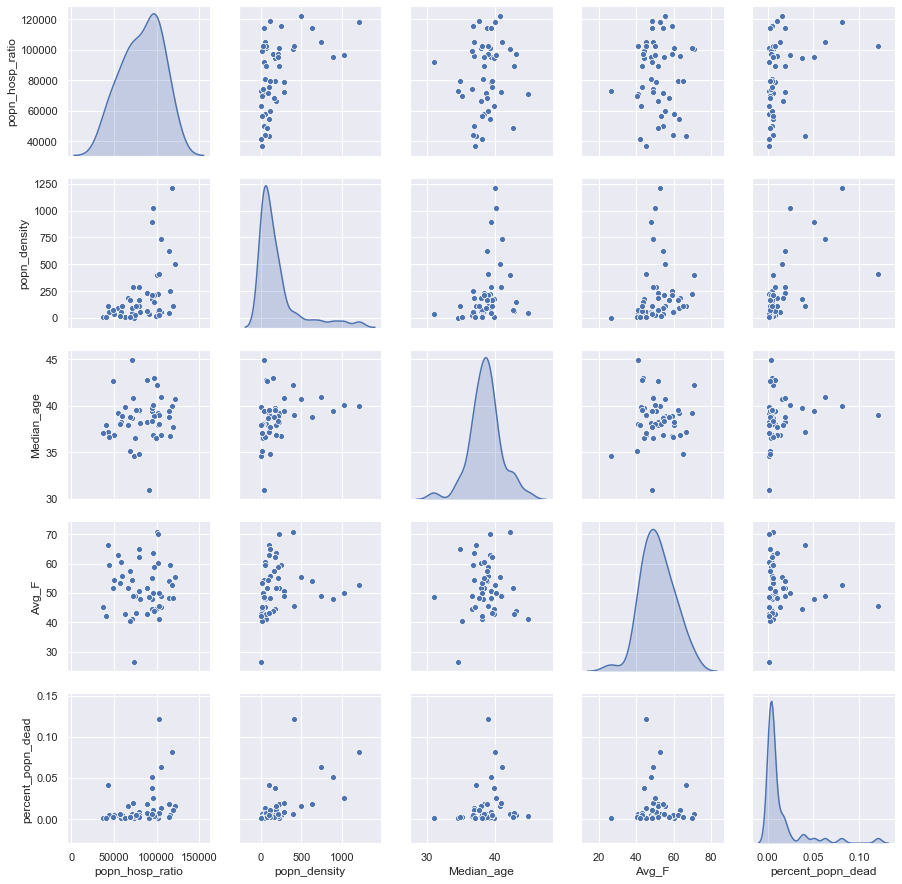

In [141]:
# Create the default pairplot to explore relations to study more in-depth (Exploratory Data Analysis)
sns.pairplot(covid19_US_janapr[['popn_hosp_ratio','popn_density','Median_age','Avg_F','percent_popn_dead']],diag_kind="kde")
plt.show()

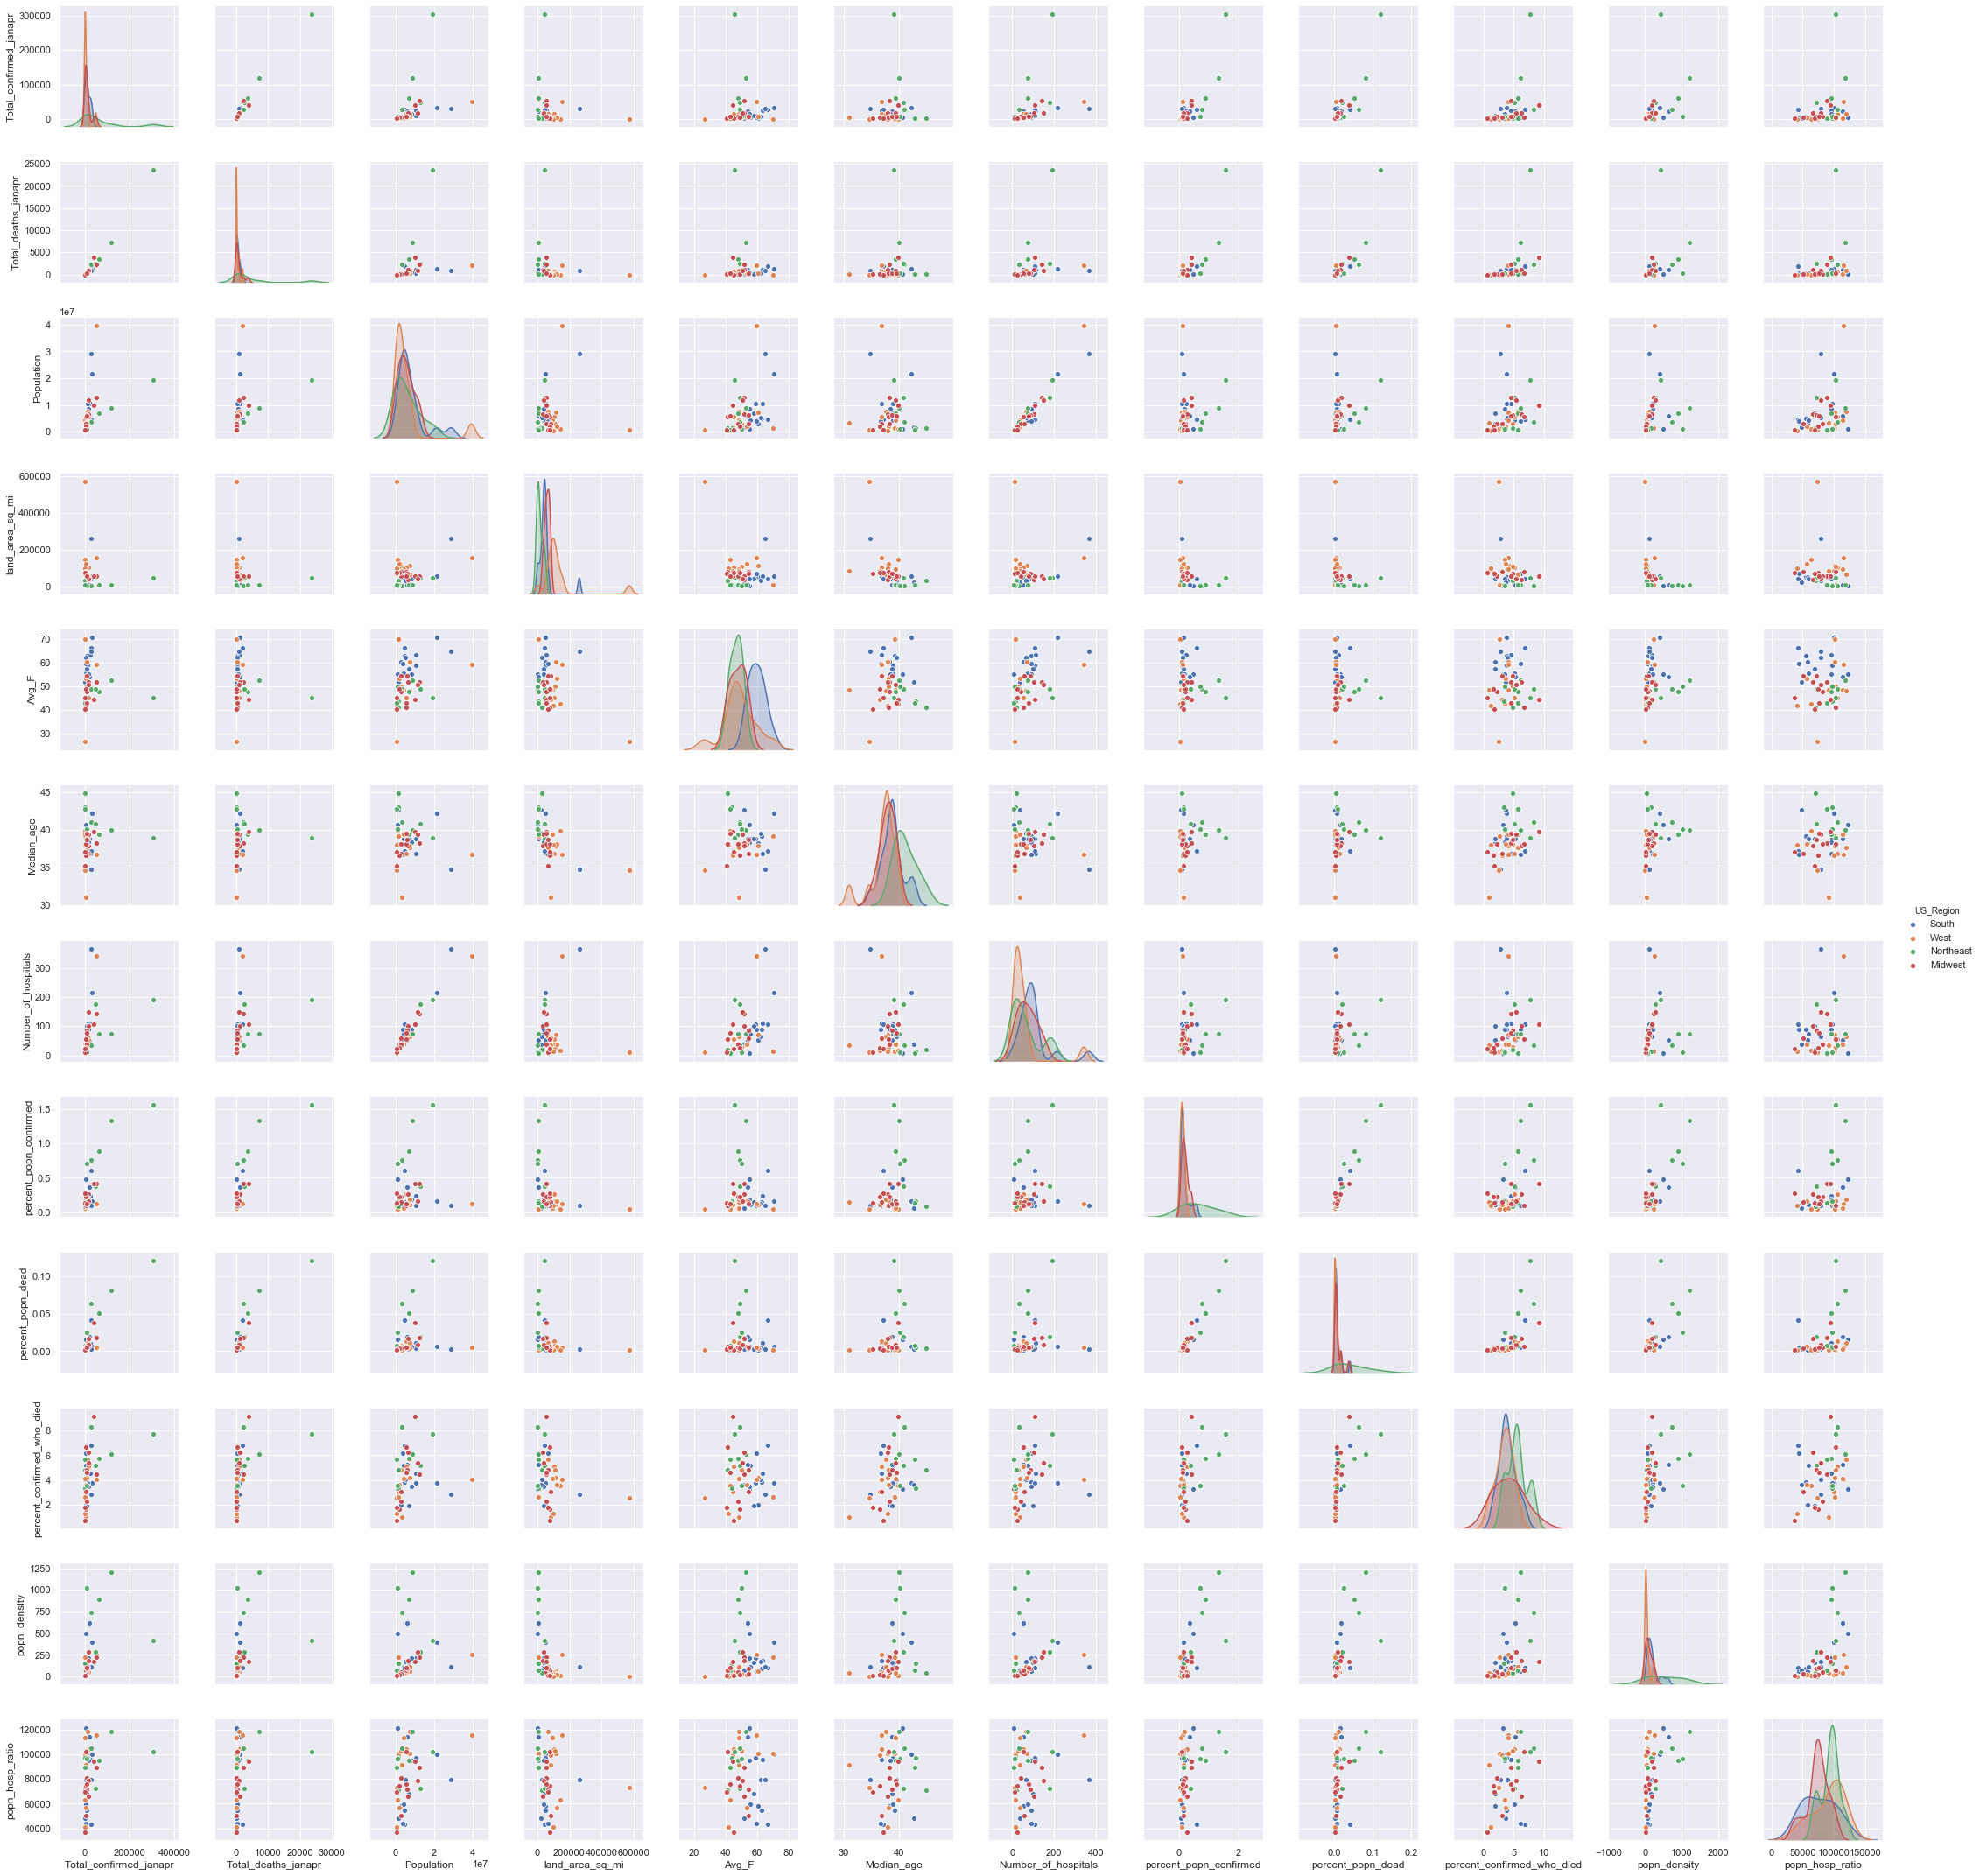

In [142]:
g = sns.pairplot(covid19_US_janapr, hue="US_Region")

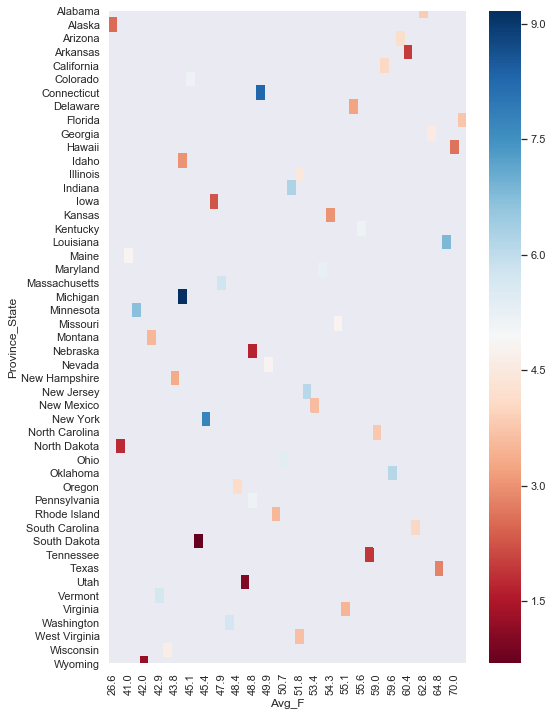

In [143]:
dfx = covid19_US_janapr[['Province_State','percent_confirmed_who_died','Median_age','Avg_F']]
# pandas pivot with multiple variables
heatmapx_data = pd.pivot_table(dfx,values='percent_confirmed_who_died', index=['Province_State'], columns='Avg_F')

plt.figure(figsize=(8, 12))
sns.heatmap(heatmapx_data, cmap="RdBu")


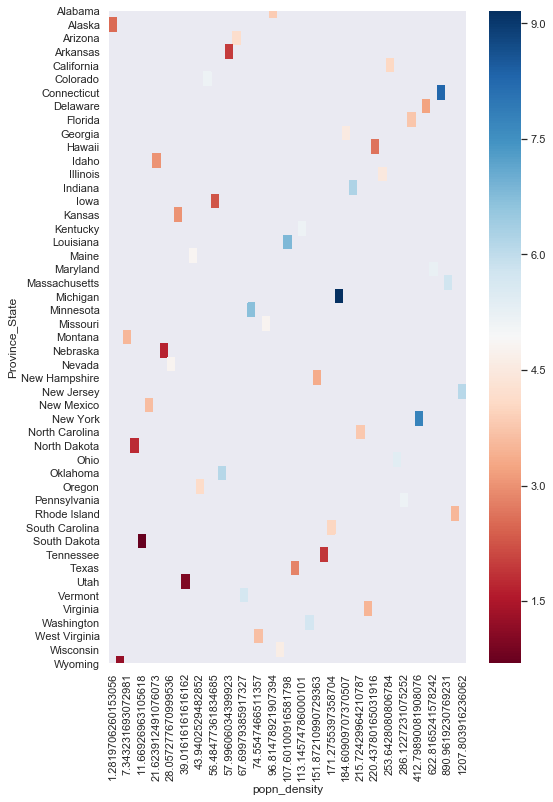

In [144]:
dfz = covid19_US_janapr[['Province_State','popn_hosp_ratio','popn_density','percent_confirmed_who_died','Median_age','Avg_F']]
# pandas pivot with multiple variables
heatmapz_data = pd.pivot_table(dfz,values='percent_confirmed_who_died', index=['Province_State'], columns='popn_density')

plt.figure(figsize=(8, 12))
sns.heatmap(heatmapz_data, cmap="RdBu")

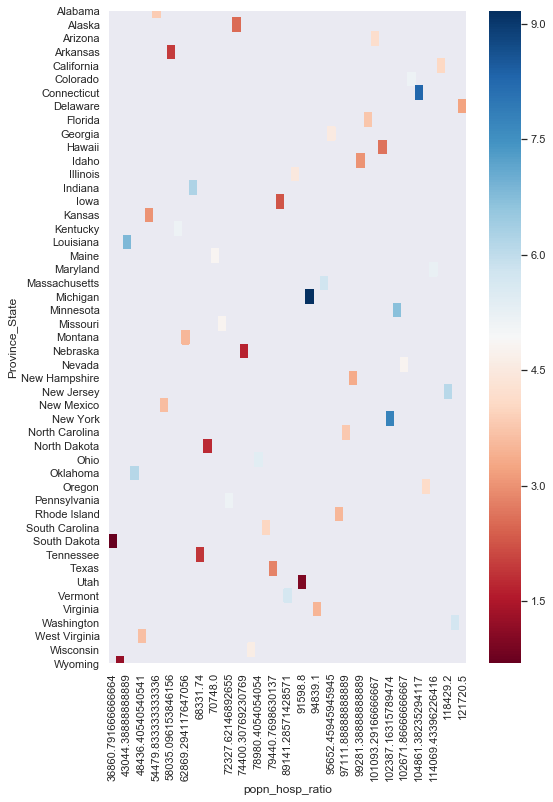

In [145]:
dfw = covid19_US_janapr[['Province_State','popn_hosp_ratio','popn_density','percent_confirmed_who_died','Median_age','Avg_F']]
# pandas pivot with multiple variables
heatmapw_data = pd.pivot_table(dfw,values='percent_confirmed_who_died', index=['Province_State'], columns='popn_hosp_ratio')

plt.figure(figsize=(8, 12))
sns.heatmap(heatmapw_data, cmap="RdBu")

## Machine Learning

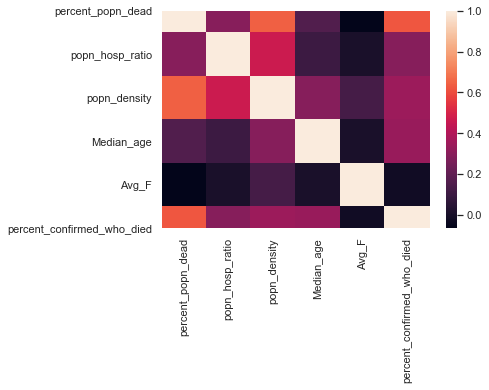

In [146]:
##Feature selection
# generating correlation matrix
corr = covid19_US_janapr[['percent_popn_dead','popn_hosp_ratio','popn_density','Median_age','Avg_F','percent_confirmed_who_died']].corr()

# generating correlation heatmap
sns.heatmap(corr)

In [223]:
us_ml_df=covid19_US_janapr[['popn_hosp_ratio','popn_density','Median_age','Avg_F','percent_popn_dead']]
us_ml_df.head()                           

popn_hosp_ratio  popn_density  Median_age  Avg_F  percent_popn_dead
0     54479.833333     96.814789        39.2   62.8           0.005547
1     73154.500000      1.281971        34.6   26.6           0.001230
2    101093.291667     64.076597        37.9   60.3           0.004396
3     58035.096154     57.996060        38.3   60.4           0.002021
4    115532.815789    253.642808        36.8   59.4           0.005140

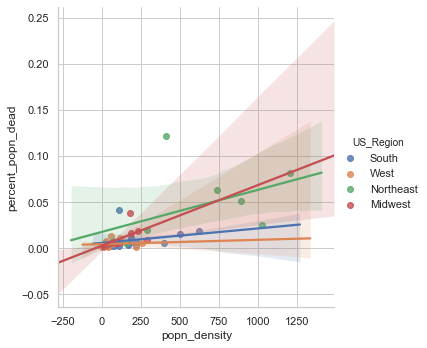

In [149]:
# Linear regression


sns.set_style('whitegrid') 
sns.lmplot(x ='popn_density', y ='percent_popn_dead', data = covid19_US_janapr,hue='US_Region') 


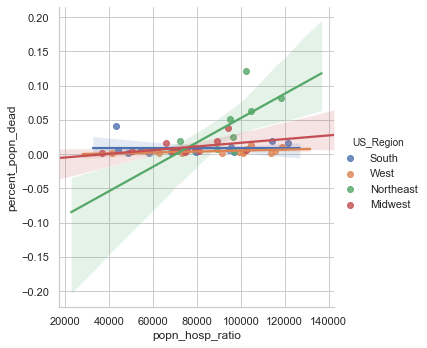

In [150]:
sns.set_style('whitegrid') 
sns.lmplot(x ='popn_hosp_ratio', y ='percent_popn_dead', data = covid19_US_janapr,hue='US_Region') 

In [224]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = covid19_US_janapr[['popn_density']]
y = covid19_US_janapr[['percent_popn_confirmed']]

reg = LinearRegression().fit(X,y)



In [156]:
reg.score(X, y)


0.5586513390220013

In [157]:
reg.coef_


array([[0.0008648]])

In [158]:
reg.intercept_


array([0.09062604])

In [159]:
reg.predict(X)

array([[0.17435123],
       [0.09173468],
       [0.14603932],
       [0.14078089],
       [0.30997572],
       [0.13867741],
       [0.72739835],
       [0.52269825],
       [0.43699237],
       [0.25027554],
       [0.28126011],
       [0.10932634],
       [0.28801   ],
       [0.2531339 ],
       [0.13947393],
       [0.12144132],
       [0.1884742 ],
       [0.18367913],
       [0.12831599],
       [0.62923625],
       [0.86112774],
       [0.24338094],
       [0.15187586],
       [0.16783695],
       [0.09697645],
       [0.11240141],
       [0.1148899 ],
       [0.22196467],
       [1.13513193],
       [0.10557544],
       [0.44761352],
       [0.27718389],
       [0.10017705],
       [0.33801855],
       [0.14051275],
       [0.12862546],
       [0.33806427],
       [0.97663457],
       [0.23874471],
       [0.10071759],
       [0.2339342 ],
       [0.18661568],
       [0.12436712],
       [0.14917265],
       [0.27754668],
       [0.18971929],
       [0.1551008 ],
       [0.183

In [160]:
reg.score(X,y)

0.5586513390220013

## Geospatial Analysis

In [238]:
import urllib
import json
from urllib.request import urlopen

# Web scraping for USA geospatial data

url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"

json_url = urlopen(url)

US_state_geodata = json.loads(json_url.read())

print (US_state_geodata)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}, {'type': 'Feature', '

In [163]:
# Confirmed US 
df_US_janapr_confirmed_count.head()

Province_State  Total_confirmed_janapr
0         Alabama                    7088
1          Alaska                     355
2  American Samoa                       0
3         Arizona                    7655
4        Arkansas                    3113

In [164]:
# descriptive stats
covid19_US_janapr.describe()

Total_confirmed_janapr  Total_deaths_janapr    Population  \
count               49.000000            49.000000  4.900000e+01   
mean             21442.265306          1273.571429  6.624870e+06   
std              46519.029793          3507.218651  7.447693e+06   
min                355.000000             7.000000  5.787590e+05   
25%               3113.000000            70.000000  1.792147e+06   
50%               7088.000000           266.000000  4.648794e+06   
75%              21742.000000          1114.000000  7.614893e+06   
max             304372.000000         23587.000000  3.951222e+07   

       land_area_sq_mi      Avg_F  Median_age  Number_of_hospitals  \
count        49.000000  49.000000   49.000000            49.000000   
mean      71120.877551  51.710204   38.634694            77.244898   
std       86636.022855   8.636773    2.347832            75.720575   
min        1034.000000  26.600000   31.000000             7.000000   
25%       35826.000000  45.200000   37.200000            26.000000   
50%       54158.000000  50.700000   38.700000            58.000000   
75%       81759.000000  57.600000   39.600000           100.000000   
max      570641.000000  70.700000   44.900000           365.000000   

       percent_popn_confirmed  percent_popn_dead  percent_confirmed_who_died  \
count               49.000000          49.000000                   49.000000   
mean                 0.268461           0.014052                    4.229079   
std                  0.310790           0.022720                    1.848869   
min                  0.042385           0.001130                    0.694161   
25%                  0.104193           0.003357                    3.036483   
50%                  0.152901           0.005547                    4.051466   
75%                  0.264920           0.013493                    5.243308   
max                  1.564608           0.121248                    9.164127   

       popn_density  popn_hosp_ratio  
count     49.000000        49.000000  
mean     205.637109     83213.135440  
std      268.610918     22981.228662  
min        1.281971     36860.791667  
25%       43.940253     68331.740000  
50%      107.601009     89141.285714  
75%      220.437802    101093.291667  
max     1207.803916    121720.500000

In [165]:
# Choropleth map of Cumulative Confirmed Apr COVID-19 cases in each State

bins = list(df_US_janapr_confirmed_count_pm['4/30/20'].quantile([0, 0.2,0.4,0.6,0.8,1]))

m1 = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=US_state_geodata,
    data=df_US_janapr_confirmed_count_pm,
    columns=['Province_State', '4/30/20'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Total Number of Confirmed COVID-19 Cases in the US by State, Jan-Apr 2020 (Actual)',
    bins=bins,
    reset=True
).add_to(m1)

m1

In [166]:
# Choropleth map of Cumulative COVID-19 death cases in each State , Jan-Apr 2020

bins = list(df_US_janapr_death_count['Total_deaths_janapr'].quantile([0, 0.2,0.4,0.6,0.8,1]))
map_US_janapr_deaths_choropleth = folium.Map(location=[48, -102], zoom_start=3)


# choropleth
folium.Choropleth(
    geo_data=US_state_geodata, # US boundaries 
    name='choropleth',
    data=df_US_janapr_death_count, # my dataset
    columns=['Province_State', 'Total_deaths_janapr'], # states here will match the geojson names, confirmed_mar(cumulative Jan-Mar 2020 cases) is the column that changes the color of zipcode areas
    key_on='feature.properties.name', # the zipcodes should match with the geographic column specified above ie our Neighborhood column
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='US Covid-19 Deaths Jan-Apr 2020',
    bins=bins,
    highlight=True
).add_to(map_US_janapr_deaths_choropleth)
    

#layer control to turn chloropleth on or off
folium.LayerControl().add_to(map_US_janapr_deaths_choropleth)

map_US_janapr_deaths_choropleth

## Global Overview

In [167]:
# importing matplotlib
import matplotlib.pyplot as plt

# display plots in the notebook itself
%matplotlib inline

import seaborn as sns
sns.set()
sns.set(style='darkgrid')

#import essential mapping libraries
import folium
from folium import plugins
import ipywidgets
import geopandas
import matplotlib.pyplot as plt
import geocoder
import numpy as np
import pandas as pd


In [168]:
coordinate_df=pd.read_csv('C:/Users/Marcie/Documents/Data_Science_Directory/Datasets/country_coordinates.csv')
gdf = geopandas.GeoDataFrame(
    coordinate_df, geometry=geopandas.points_from_xy(coordinate_df.longitude, coordinate_df.latitude))

gdf

Country/Region   latitude  longitude country_code  \
0                 Andorra  42.546245   1.601554           AD   
1    United Arab Emirates  23.424076  53.847818           AE   
2             Afghanistan  33.939110  67.709953           AF   
3     Antigua and Barbuda  17.060816 -61.796428           AG   
4                Anguilla  18.220554 -63.068615           AI   
..                    ...        ...        ...          ...   
240                 Yemen  15.552727  48.516388           YE   
241               Mayotte -12.827500  45.166244           YT   
242          South Africa -30.559482  22.937506           ZA   
243                Zambia -13.133897  27.849332           ZM   
244              Zimbabwe -19.015438  29.154857           ZW   

                       geometry  
0      POINT (1.60155 42.54624)  
1     POINT (53.84782 23.42408)  
2     POINT (67.70995 33.93911)  
3    POINT (-61.79643 17.06082)  
4    POINT (-63.06862 18.22055)  
..                          ...  
240   POINT (48.51639 15.55273)  
241  POINT (45.16624 -12.82750)  
242  POINT (22.93751 -30.55948)  
243  POINT (27.84933 -13.13390)  
244  POINT (29.15486 -19.01544)  

[245 rows x 5 columns]

In [230]:
global_geodata=gdf.to_file('country_coordinates.geojson', driver='GeoJSON')
global_geodata


In [229]:
#count globally confirmed cases for the months Jan,Feb,Mar,Apr 2020 by Country/Region, set as_index=False to make your columns accessible

df_confirmed_counts_jan = df_confirmed.groupby(['Country/Region'], as_index=False).agg({'1/31/2020': 'sum'})
df_confirmed_counts_janfeb = df_confirmed.groupby(['Country/Region'], as_index=False).agg({'2/29/2020': 'sum'})
df_confirmed_counts_janmar = df_confirmed.groupby(['Country/Region'], as_index=False).agg({'3/31/2020': 'sum'})
df_confirmed_counts_janapr = df_confirmed.groupby(['Country/Region'], as_index=False).agg({'4/30/2020': 'sum'})


# add geo data to global confirmed count dataframes 

df_confirmed_count_jan=pd.merge(df_confirmed_counts_jan.reset_index(),gdf.reset_index())
df_confirmed_count_janfeb=pd.merge(df_confirmed_counts_janfeb.reset_index(),gdf.reset_index())
df_confirmed_count_janmar=pd.merge(df_confirmed_counts_janmar.reset_index(),gdf.reset_index())
df_confirmed_count_janapr=pd.merge(df_confirmed_counts_janapr.reset_index(),gdf.reset_index())


In [171]:
# Bubble map Global confirmed COVID19 case count-Jan

# Make an empty map
global_mx = folium.Map(location=[20,0], tiles='OpenStreetMap', zoom_start=2)

# Add markers one by one on the map
for i in range(0,len(df_confirmed)):
   folium.Circle(
      location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
      popup=df_confirmed.iloc[i]['Country/Region'],
      radius=float(df_confirmed.iloc[i]['1/31/2020']*50),
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(global_mx)

global_mx

In [172]:
# Bubble map Global confirmed COVID19 case count-Jan to Apr2020

# Make an empty map
global_m2 = folium.Map(location=[20,0], tiles='OpenStreetMap', zoom_start=2)

# Add markers one by one on the map
for i in range(0,len(df_confirmed)):
   folium.Circle(
      location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
      popup=df_confirmed.iloc[i]['Country/Region'],
      radius=float(df_confirmed.iloc[i]['4/30/2020']*0.9),
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(global_m2)

global_m2

### a] Download and explore dataset from Foursquare

In [179]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [180]:
CLIENT_ID = 'PGQYVXCZX4YOXOI4HK3LKIPEXKHBRYGAP5H5TN2XBZFUHWCY' # your Foursquare ID
CLIENT_SECRET = 'ACPT2J4NDYH12WBMAVTJ4DAX4N1R503G3EWO5X4YTCPLV51B' # your Foursquare Secret
VERSION = '20191008' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PGQYVXCZX4YOXOI4HK3LKIPEXKHBRYGAP5H5TN2XBZFUHWCY
CLIENT_SECRET:ACPT2J4NDYH12WBMAVTJ4DAX4N1R503G3EWO5X4YTCPLV51B


In [181]:
# The New York neighborhoods which recorded COVID-19 deaths between Jan-Apr 2020 will be explored
# slice original location dataframe and create a new dataframe of New York neighbourhoods data where State contains 'New York'
df_location_new_york=df_US_deaths_foursq[df_US_deaths_foursq['Province_State'].str.contains("New York")].reset_index(drop=True)
df_location_new_york.columns=['State','Neighborhood','Latitude','Longitude']
df_location_new_york.drop(df_location_new_york[df_location_new_york.Latitude==0.000000].index, inplace=True)
df_location_new_york.tail()

State Neighborhood   Latitude  Longitude
57  New York   Washington  43.311538 -73.430434
58  New York        Wayne  43.154944 -77.029765
59  New York  Westchester  41.162784 -73.757417
60  New York      Wyoming  42.701451 -78.221996
61  New York        Yates  42.635055 -77.103699

In [182]:
# explore first neighborhood in our dataframe
df_location_new_york.loc[59, 'Neighborhood']

'Westchester'

In [183]:
# get latitude and longitude of the neighborhood or state
neighborhood_latitude = df_location_new_york.loc[59, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_location_new_york.loc[59, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_location_new_york.loc[59, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Westchester are 41.16278376, -73.75741653.


In [184]:
#create GET request URL to get top 1000 venues within 2500m radius of this neighborhood or administrative area

LIMIT = 1000 # limit of number of venues returned by Foursquare API

radius = 2500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
 

'https://api.foursquare.com/v2/venues/explore?&client_id=PGQYVXCZX4YOXOI4HK3LKIPEXKHBRYGAP5H5TN2XBZFUHWCY&client_secret=ACPT2J4NDYH12WBMAVTJ4DAX4N1R503G3EWO5X4YTCPLV51B&v=20191008&ll=41.16278376,-73.75741653&radius=2500&limit=1000'

In [185]:
# send the GET request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed07b42edbcad0023595392'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 43,
  'suggestedBounds': {'ne': {'lat': 41.18528378250003,
    'lng': -73.72758557674697},
   'sw': {'lat': 41.14028373749998, 'lng': -73.78724748325303}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b10119ef964a5206a6823e3',
       'name': "Lange's Little Store",
       'location': {'address': '390 King St.',
        'lat': 41.15978818566677,
        'lng': -73.76524520535668,
        'labeledLatLngs': [{'label': 'display',
          'lat': 41.1597

In [186]:
# Use get_category_type function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [187]:
# clear json and structure it into a dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name           categories        lat        lng
0  Lange's Little Store        Deli / Bodega  41.159788 -73.765245
1    Quaker Hill Tavern  American Restaurant  41.159559 -73.764583
2    Desires by Mikolay        Jewelry Store  41.159186 -73.772144
3      Chappaqua Tavern  American Restaurant  41.159179 -73.771794
4  World Cup Gymnastics       Gymnastics Gym  41.162946 -73.771045

In [188]:
# check how many venues were returned
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

43 venues were returned by Foursquare.


In [191]:
# Create a function to repeat the same process to all the neighborhoods in Manhattan or States in the US
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [192]:
# code to run the above function on each neighborhood and create a new dataframe called *newyork_venues*.
newyork_venues = getNearbyVenues(names=df_location_new_york['Neighborhood'],
                                   latitudes=df_location_new_york['Latitude'],
                                   longitudes=df_location_new_york['Longitude']
                                  )

Albany
Allegany
Bronx
Broome
Cattaraugus
Cayuga
Chautauqua
Chemung
Chenango
Clinton
Columbia
Cortland
Delaware
Dutchess
Erie
Essex
Franklin
Fulton
Genesee
Greene
Hamilton
Herkimer
Jefferson
Kings
Lewis
Livingston
Madison
Monroe
Montgomery
Nassau
New York
Niagara
Oneida
Onondaga
Ontario
Orange
Orleans
Oswego
Otsego
Putnam
Queens
Rensselaer
Richmond
Rockland
St. Lawrence
Saratoga
Schenectady
Schoharie
Schuyler
Seneca
Steuben
Suffolk
Sullivan
Tioga
Tompkins
Ulster
Warren
Washington
Wayne
Westchester
Wyoming
Yates


In [193]:
#check the size of the resulting dataframe
print(newyork_venues.shape)
newyork_venues.head()

(380, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Bronx              40.852093              -73.862828   
1        Bronx              40.852093              -73.862828   
2        Bronx              40.852093              -73.862828   
3        Bronx              40.852093              -73.862828   
4        Bronx              40.852093              -73.862828   

                   Venue  Venue Latitude  Venue Longitude      Venue Category  
0      F & J Pine Tavern       40.848766       -73.862242  Italian Restaurant  
1  John & Joe's Pizzeria       40.854520       -73.865824         Pizza Place  
2     Lydig Coffee House       40.854520       -73.866732      Breakfast Spot  
3         Peking Kitchen       40.854260       -73.866223  Chinese Restaurant  
4              Starbucks       40.856127       -73.867428         Coffee Shop

In [194]:
# check how many venues were returned for each neighborhood
newyork_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                         
Bronx                            59                      59     59   
Cayuga                            2                       2      2   
Columbia                          1                       1      1   
Dutchess                          1                       1      1   
Erie                              1                       1      1   
Genesee                          13                      13     13   
Kings                            86                      86     86   
Monroe                           10                      10     10   
Nassau                           23                      23     23   
New York                        100                     100    100   
Oneida                            8                       8      8   
Onondaga                          4                       4      4   
Ontario                           1                       1      1   
Orange                            3                       3      3   
Orleans                           2                       2      2   
Putnam                            1                       1      1   
Queens                           23                      23     23   
Richmond                          5                       5      5   
Rockland                          6                       6      6   
Schoharie                         1                       1      1   
Schuyler                          3                       3      3   
Seneca                            1                       1      1   
Suffolk                           1                       1      1   
Tioga                             3                       3      3   
Tompkins                         12                      12     12   
Ulster                            1                       1      1   
Warren                            1                       1      1   
Westchester                       7                       7      7   
Yates                             1                       1      1   

              Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                   
Bronx                     59               59              59  
Cayuga                     2                2               2  
Columbia                   1                1               1  
Dutchess                   1                1               1  
Erie                       1                1               1  
Genesee                   13               13              13  
Kings                     86               86              86  
Monroe                    10               10              10  
Nassau                    23               23              23  
New York                 100              100             100  
Oneida                     8                8               8  
Onondaga                   4                4               4  
Ontario                    1                1               1  
Orange                     3                3               3  
Orleans                    2                2               2  
Putnam                     1                1               1  
Queens                    23               23              23  
Richmond                   5                5               5  
Rockland                   6                6               6  
Schoharie                  1                1               1  
Schuyler                   3                3               3  
Seneca                     1                1               1  
Suffolk                    1                1               1  
Tioga                      3                3               3  
Tompkins                  12               12              12  
Ulster                     1                1               1  
Warren                     1                1      

In [195]:
#find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(newyork_venues['Venue Category'].unique())))

There are 154 uniques categories.


### c] Analyse each neighborhood

In [196]:
# one hot encoding
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]

newyork_onehot.head()

Neighborhood  American Restaurant  Arcade  Art Gallery  Art Museum  \
0        Bronx                    0       0            0           0   
1        Bronx                    0       0            0           0   
2        Bronx                    0       0            0           0   
3        Bronx                    0       0            0           0   
4        Bronx                    0       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Automotive Shop  \
0                    0                 0                   0                0   
1                    0                 0                   0                0   
2                    0                 0                   0                0   
3                    0                 0                   0                0   
4                    0                 0                   0                0   

   BBQ Joint  Bakery  Bank  Bar  Baseball Field  Big Box Store  Bookstore  \
0          0       0     0    0               0              0          0   
1          0       0     0    0               0              0          0   
2          0       0     0    0               0              0          0   
3          0       0     0    0               0              0          0   
4          0       0     0    0               0              0          0   

   Botanical Garden  Boutique  Bowling Alley  Breakfast Spot  Brewery  \
0                 0         0              0               0        0   
1                 0         0              0               0        0   
2                 0         0              0               1        0   
3                 0         0              0               0        0   
4                 0         0              0               0        0   

   Bridal Shop  Bridge  Bus Line  Bus Station  Bus Stop  Café  Campground  \
0            0       0         0            0         0     0           0   
1            0       0         0            0         0     0           0   
2            0       0         0            0         0     0           0   
3            0       0         0            0         0     0           0   
4            0       0         0            0         0     0           0   

   Candy Store  Caribbean Restaurant  Chinese Restaurant  Clothing Store  \
0            0                     0                   0               0   
1            0                     0                   0               0   
2            0                     0                   0               0   
3            0                     0                   1               0   
4            0                     0                   0               0   

   Cocktail Bar  Coffee Shop  College Arts Building  College Gym  Comic Shop  \
0             0            0                      0            0           0   
1             0            0                      0            0           0   
2             0            0                      0            0           0   
3             0            0                      0            0           0   
4             0            1                      0            0           0   

   Concert Hall  Construction & Landscaping  Convenience Store  \
0             0                           0                  0   
1             0                           0                  0   
2             0                           0                  0   
3             0                           0                  0   
4             0                           0                  0   

   Cosmetics Shop  Cupcake Shop  Cycle Studio  Deli / Bodega  \
0               0             0             0              0   
1               0             0             0              0   
2               0             0             0              0   
3               0             0             0              0   
4               0             0             0              0  

In [197]:
# examine size of new dataframe
newyork_onehot.shape

(380, 155)

In [198]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
newyork_grouped = newyork_onehot.groupby('Neighborhood').mean().reset_index()
newyork_grouped

Neighborhood  American Restaurant    Arcade  Art Gallery  Art Museum  \
0         Bronx             0.000000  0.000000     0.000000        0.00   
1        Cayuga             0.000000  0.000000     0.000000        0.00   
2      Columbia             0.000000  0.000000     0.000000        0.00   
3      Dutchess             0.000000  0.000000     0.000000        0.00   
4          Erie             0.000000  0.000000     0.000000        0.00   
5       Genesee             0.076923  0.000000     0.000000        0.00   
6         Kings             0.000000  0.000000     0.000000        0.00   
7        Monroe             0.000000  0.000000     0.000000        0.00   
8        Nassau             0.086957  0.043478     0.000000        0.00   
9      New York             0.010000  0.000000     0.020000        0.03   
10       Oneida             0.000000  0.000000     0.000000        0.00   
11     Onondaga             0.000000  0.000000     0.000000        0.00   
12      Ontario             0.000000  0.000000     0.000000        0.00   
13       Orange             0.000000  0.000000     0.000000        0.00   
14      Orleans             0.000000  0.000000     0.000000        0.00   
15       Putnam             0.000000  0.000000     0.000000        0.00   
16       Queens             0.000000  0.000000     0.000000        0.00   
17     Richmond             0.000000  0.000000     0.000000        0.00   
18     Rockland             0.000000  0.000000     0.000000        0.00   
19    Schoharie             0.000000  0.000000     0.000000        0.00   
20     Schuyler             0.000000  0.000000     0.333333        0.00   
21       Seneca             0.000000  0.000000     0.000000        0.00   
22      Suffolk             0.000000  0.000000     0.000000        0.00   
23        Tioga             0.000000  0.000000     0.000000        0.00   
24     Tompkins             0.000000  0.000000     0.000000        0.00   
25       Ulster             1.000000  0.000000     0.000000        0.00   
26       Warren             0.000000  0.000000     0.000000        0.00   
27  Westchester             0.142857  0.000000     0.000000        0.00   
28        Yates             0.000000  0.000000     0.000000        0.00   

    Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0              0.000000          0.000000                0.00   
1              0.000000          0.000000                0.00   
2              0.000000          0.000000                0.00   
3              0.000000          0.000000                0.00   
4              0.000000          0.000000                0.00   
5              0.000000          0.000000                0.00   
6              0.000000          0.000000                0.00   
7              0.000000          0.000000                0.00   
8              0.043478          0.043478                0.00   
9              0.000000          0.010000                0.01   
10             0.000000          0.000000                0.00   
11             0.000000          0.000000                0.00   
12             0.000000          0.000000                0.00   
13             0.000000          0.000000                0.00   
14             0.000000          0.000000                0.00   
15             0.000000          0.000000                0.00   
16             0.000000          0.000000                0.00   
17             0.000000          0.000000                0.00   
18             0.000000          0.000000                0.00   
19             0.000000          0.000000                0.00   
20             0.000000          0.000000                0.00   
21             0.000000          0.000000                0.00   
22             0.000000          0.000000                0.00   
23             0.000000          0.000000                0.00   
24             0.000000          0.000000                0.00   
25             0.000000          0.000000                0.00 

In [199]:
# confirm new size
newyork_grouped.shape

(29, 155)

In [200]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in newyork_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = newyork_grouped[newyork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bronx----
           venue  freq
0    Pizza Place  0.08
1  Deli / Bodega  0.05
2    Bus Station  0.05
3       Pharmacy  0.03
4           Park  0.03


----Cayuga----
                 venue  freq
0        Historic Site   1.0
1  American Restaurant   0.0
2            Nightclub   0.0
3    Mobile Phone Shop   0.0
4                Motel   0.0


----Columbia----
                 venue  freq
0     Department Store   1.0
1  American Restaurant   0.0
2            Nightclub   0.0
3    Mobile Phone Shop   0.0
4                Motel   0.0


----Dutchess----
                 venue  freq
0               Garden   1.0
1  American Restaurant   0.0
2      Nature Preserve   0.0
3    Mobile Phone Shop   0.0
4                Motel   0.0


----Erie----
                 venue  freq
0           Waterfront   1.0
1  American Restaurant   0.0
2      Nature Preserve   0.0
3   Miscellaneous Shop   0.0
4    Mobile Phone Shop   0.0


----Genesee----
                  venue  freq
0  Fast Food Restaurant  0.23
1   

In [201]:
# write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [202]:
# create the new dataframe and display the top 5 venues for each neighborhood.

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = newyork_grouped['Neighborhood']

for ind in np.arange(newyork_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyork_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0        Bronx           Pizza Place           Bus Station   
1       Cayuga         Historic Site           Zoo Exhibit   
2     Columbia      Department Store           Zoo Exhibit   
3     Dutchess                Garden           Zoo Exhibit   
4         Erie            Waterfront           Zoo Exhibit   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0         Deli / Bodega        Ice Cream Shop                 Diner  
1               Dog Run  Fast Food Restaurant                  Farm  
2            Donut Shop           Flower Shop  Fast Food Restaurant  
3            Donut Shop  Fast Food Restaurant                  Farm  
4               Dog Run  Fast Food Restaurant                  Farm

### d] Cluster Neighborhoods

In [203]:
# run k means to cluster the neighborhoods into 5 clusters

# set number of clusters
kclusters = 5

newyork_grouped_clustering = newyork_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newyork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 0, 1, 3, 1, 1, 1, 1, 1])

In [204]:
# create new dataframe with both cluster + top 10 venues for each neighborhood

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

newyork_merged = df_location_new_york

# merge newyork_grouped with newyork_data to add latitude/longitude for each neighborhood
newyork_merged = newyork_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

newyork_merged.head() # check the last columns!

State Neighborhood   Latitude  Longitude  Cluster Labels  \
0  New York       Albany  42.600603 -73.977239             NaN   
1  New York     Allegany  42.257484 -78.027505             NaN   
2  New York        Bronx  40.852093 -73.862828             1.0   
3  New York       Broome  42.159032 -75.813261             NaN   
4  New York  Cattaraugus  42.247782 -78.679231             NaN   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2           Pizza Place           Bus Station         Deli / Bodega   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

  4th Most Common Venue 5th Most Common Venue  
0                   NaN                   NaN  
1                   NaN                   NaN  
2        Ice Cream Shop                 Diner  
3                   NaN                   NaN  
4                   NaN                   NaN

In [205]:
# drop rows with null values
newyork_merged1=newyork_merged.dropna()

newyork_merged1



State Neighborhood   Latitude  Longitude  Cluster Labels  \
2   New York        Bronx  40.852093 -73.862828             1.0   
5   New York       Cayuga  42.912617 -76.557316             1.0   
10  New York     Columbia  42.248193 -73.630891             0.0   
13  New York     Dutchess  41.764861 -73.743567             1.0   
14  New York         Erie  42.762490 -78.730637             3.0   
18  New York      Genesee  43.002260 -78.191352             1.0   
23  New York        Kings  40.636183 -73.949356             1.0   
27  New York       Monroe  43.146389 -77.693229             1.0   
29  New York       Nassau  40.740665 -73.589419             1.0   
30  New York     New York  40.767273 -73.971526             1.0   
32  New York       Oneida  43.243754 -75.437104             1.0   
33  New York     Onondaga  43.004919 -76.199712             1.0   
34  New York      Ontario  42.851457 -77.308744             1.0   
35  New York       Orange  41.403375 -74.302408             1.0   
36  New York      Orleans  43.251698 -78.232007             4.0   
39  New York       Putnam  41.426301 -73.749655             1.0   
40  New York       Queens  40.710881 -73.816847             1.0   
42  New York     Richmond  40.585822 -74.148086             1.0   
43  New York     Rockland  41.150279 -74.025605             1.0   
47  New York    Schoharie  42.588317 -74.443390             2.0   
48  New York     Schuyler  42.391840 -76.877330             1.0   
49  New York       Seneca  42.780810 -76.824971             1.0   
51  New York      Suffolk  40.883201 -72.801217             4.0   
53  New York        Tioga  42.168528 -76.308358             1.0   
54  New York     Tompkins  42.449458 -76.472298             1.0   
55  New York       Ulster  41.890279 -74.262521             1.0   
56  New York       Warren  43.561730 -73.843370             2.0   
59  New York  Westchester  41.162784 -73.757417             1.0   
61  New York        Yates  42.635055 -77.103699             1.0   

         1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
2                  Pizza Place            Bus Station         Deli / Bodega   
5                Historic Site            Zoo Exhibit               Dog Run   
10            Department Store            Zoo Exhibit            Donut Shop   
13                      Garden            Zoo Exhibit            Donut Shop   
14                  Waterfront            Zoo Exhibit               Dog Run   
18        Fast Food Restaurant    American Restaurant                   Bar   
23        Caribbean Restaurant            Pizza Place     Mobile Phone Shop   
27                  Sports Bar            Dry Cleaner         Deli / Bodega   
29         American Restaurant                  Hotel         Movie Theater   
30                       Hotel                    Spa     French Restaurant   
32           Convenience Store                    Bar         Deli / Bodega   
33                 Pizza Place  College Arts Building           Coffee Shop   
34                        Farm            Zoo Exhibit            Donut Shop   
35                        Park         Baseball Field           Zoo Exhibit   
36  Construction & Landscaping              Rest Area               Dog Run   
39              Scenic Lookout         Discount Store                  Farm   
40                 Pizza Place             Donut Shop          Liquor Store   
42                       Trail               Bus Stop            Restaurant   
43          Chinese Restaurant           Intersection         Deli / Bodega   
47                  Campground            Zoo Exhibit            Donut Shop   
48                       Hotel            Art Gallery       Vacation Rental   
49                 Pizza Place            Zoo Exhibit               Dog Run   
51  Construction & Landscaping             Donut Shop           Flower Shop   
53              Discount Store    Sporting Goods Shop                   Gym   
54                   

In [206]:
newyork_merged1['Cluster Labels']=newyork_merged1['Cluster Labels'].astype(int)
newyork_merged1

C:\Users\Marcie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


State Neighborhood   Latitude  Longitude  Cluster Labels  \
2   New York        Bronx  40.852093 -73.862828               1   
5   New York       Cayuga  42.912617 -76.557316               1   
10  New York     Columbia  42.248193 -73.630891               0   
13  New York     Dutchess  41.764861 -73.743567               1   
14  New York         Erie  42.762490 -78.730637               3   
18  New York      Genesee  43.002260 -78.191352               1   
23  New York        Kings  40.636183 -73.949356               1   
27  New York       Monroe  43.146389 -77.693229               1   
29  New York       Nassau  40.740665 -73.589419               1   
30  New York     New York  40.767273 -73.971526               1   
32  New York       Oneida  43.243754 -75.437104               1   
33  New York     Onondaga  43.004919 -76.199712               1   
34  New York      Ontario  42.851457 -77.308744               1   
35  New York       Orange  41.403375 -74.302408               1   
36  New York      Orleans  43.251698 -78.232007               4   
39  New York       Putnam  41.426301 -73.749655               1   
40  New York       Queens  40.710881 -73.816847               1   
42  New York     Richmond  40.585822 -74.148086               1   
43  New York     Rockland  41.150279 -74.025605               1   
47  New York    Schoharie  42.588317 -74.443390               2   
48  New York     Schuyler  42.391840 -76.877330               1   
49  New York       Seneca  42.780810 -76.824971               1   
51  New York      Suffolk  40.883201 -72.801217               4   
53  New York        Tioga  42.168528 -76.308358               1   
54  New York     Tompkins  42.449458 -76.472298               1   
55  New York       Ulster  41.890279 -74.262521               1   
56  New York       Warren  43.561730 -73.843370               2   
59  New York  Westchester  41.162784 -73.757417               1   
61  New York        Yates  42.635055 -77.103699               1   

         1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
2                  Pizza Place            Bus Station         Deli / Bodega   
5                Historic Site            Zoo Exhibit               Dog Run   
10            Department Store            Zoo Exhibit            Donut Shop   
13                      Garden            Zoo Exhibit            Donut Shop   
14                  Waterfront            Zoo Exhibit               Dog Run   
18        Fast Food Restaurant    American Restaurant                   Bar   
23        Caribbean Restaurant            Pizza Place     Mobile Phone Shop   
27                  Sports Bar            Dry Cleaner         Deli / Bodega   
29         American Restaurant                  Hotel         Movie Theater   
30                       Hotel                    Spa     French Restaurant   
32           Convenience Store                    Bar         Deli / Bodega   
33                 Pizza Place  College Arts Building           Coffee Shop   
34                        Farm            Zoo Exhibit            Donut Shop   
35                        Park         Baseball Field           Zoo Exhibit   
36  Construction & Landscaping              Rest Area               Dog Run   
39              Scenic Lookout         Discount Store                  Farm   
40                 Pizza Place             Donut Shop          Liquor Store   
42                       Trail               Bus Stop            Restaurant   
43          Chinese Restaurant           Intersection         Deli / Bodega   
47                  Campground            Zoo Exhibit            Donut Shop   
48                       Hotel            Art Gallery       Vacation Rental   
49                 Pizza Place            Zoo Exhibit               Dog Run   
51  Construction & Landscaping             Donut Shop           Flower Shop   
53              Discount Store    Sporting Goods Shop                   Gym   
54                   

In [207]:
# define user_agent to create an instance of the geocoder (agent newyork_explorer)
address = 'New York, NY'

geolocator = Nominatim(user_agent="newyork_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of New York are 40.7127281, -74.0060152.


In [208]:
# visualize resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newyork_merged1['Latitude'], newyork_merged1['Longitude'], newyork_merged1['Neighborhood'], newyork_merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [209]:
# subset New York death data
df_US_deaths_NY_data=df_US_deaths[['Province_State','Admin2','Lat','Long_','4/30/20']]

df_US_deaths_NY=df_US_deaths_NY_data[df_US_deaths_NY_data['Province_State'].str.contains("New York")].reset_index(drop=True)
df_US_deaths_NY_data.columns=['Province_State','Neighborhood','Lat','Long_','4/30/20']

# combine deaths and cluster column to test if there is correlation between cluster and COVID-19 deaths 
newyork_cluster=newyork_merged1[['Neighborhood','Cluster Labels','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue']]
df_US_deaths_NY_clusters=pd.merge(df_US_deaths_NY.reset_index(),newyork_cluster.reset_index())
df_US_deaths_NY_clusters=df_US_deaths_NY_clusters[['Neighborhood','4/30/20','Cluster Labels','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','Lat','Long_']]
df_US_deaths_NY_clusters_sorted= df_US_deaths_NY_clusters.sort_values('4/30/20',ascending=False)
df_US_deaths_NY_clusters_sorted.head(10)


Neighborhood  4/30/20  Cluster Labels       1st Most Common Venue  \
9      New York    18069               1                       Hotel   
8        Nassau     1700               1         American Restaurant   
22      Suffolk     1177               4  Construction & Landscaping   
27  Westchester     1031               1         American Restaurant   
18     Rockland      511               1          Chinese Restaurant   
13       Orange      320               1                        Park   
4          Erie      266               3                  Waterfront   
7        Monroe      115               1                  Sports Bar   
3      Dutchess       37               1                      Garden   
11     Onondaga       30               1                 Pizza Place   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
9                     Spa     French Restaurant         Women's Store   
8                   Hotel         Movie Theater    Mexican Restaurant   
22             Donut Shop           Flower Shop  Fast Food Restaurant   
27       Asian Restaurant    Italian Restaurant              Pharmacy   
18           Intersection         Deli / Bodega         Shopping Mall   
13         Baseball Field           Zoo Exhibit            Donut Shop   
4             Zoo Exhibit               Dog Run  Fast Food Restaurant   
7             Dry Cleaner         Deli / Bodega            Comic Shop   
3             Zoo Exhibit            Donut Shop  Fast Food Restaurant   
11  College Arts Building           Coffee Shop                   Gym   

                       5th Most Common Venue        Lat      Long_  
9                          Outdoor Sculpture  40.767273 -73.971526  
8   Residential Building (Apartment / Condo)  40.740665 -73.589419  
22                                      Farm  40.883201 -72.801217  
27                                      Bank  41.162784 -73.757417  
18                                     Diner  41.150279 -74.025605  
13                      Fast Food Restaurant  41.403375 -74.302408  
4                                       Farm  42.762490 -78.730637  
7                                College Gym  43.146389 -77.693229  
3                                       Farm  41.764861 -73.743567  
11                            Discount Store  43.004919 -76.199712

In [214]:
# Import wordcloud
!pip install wordcloud

In [215]:
# import libraries for wordcloud generation
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

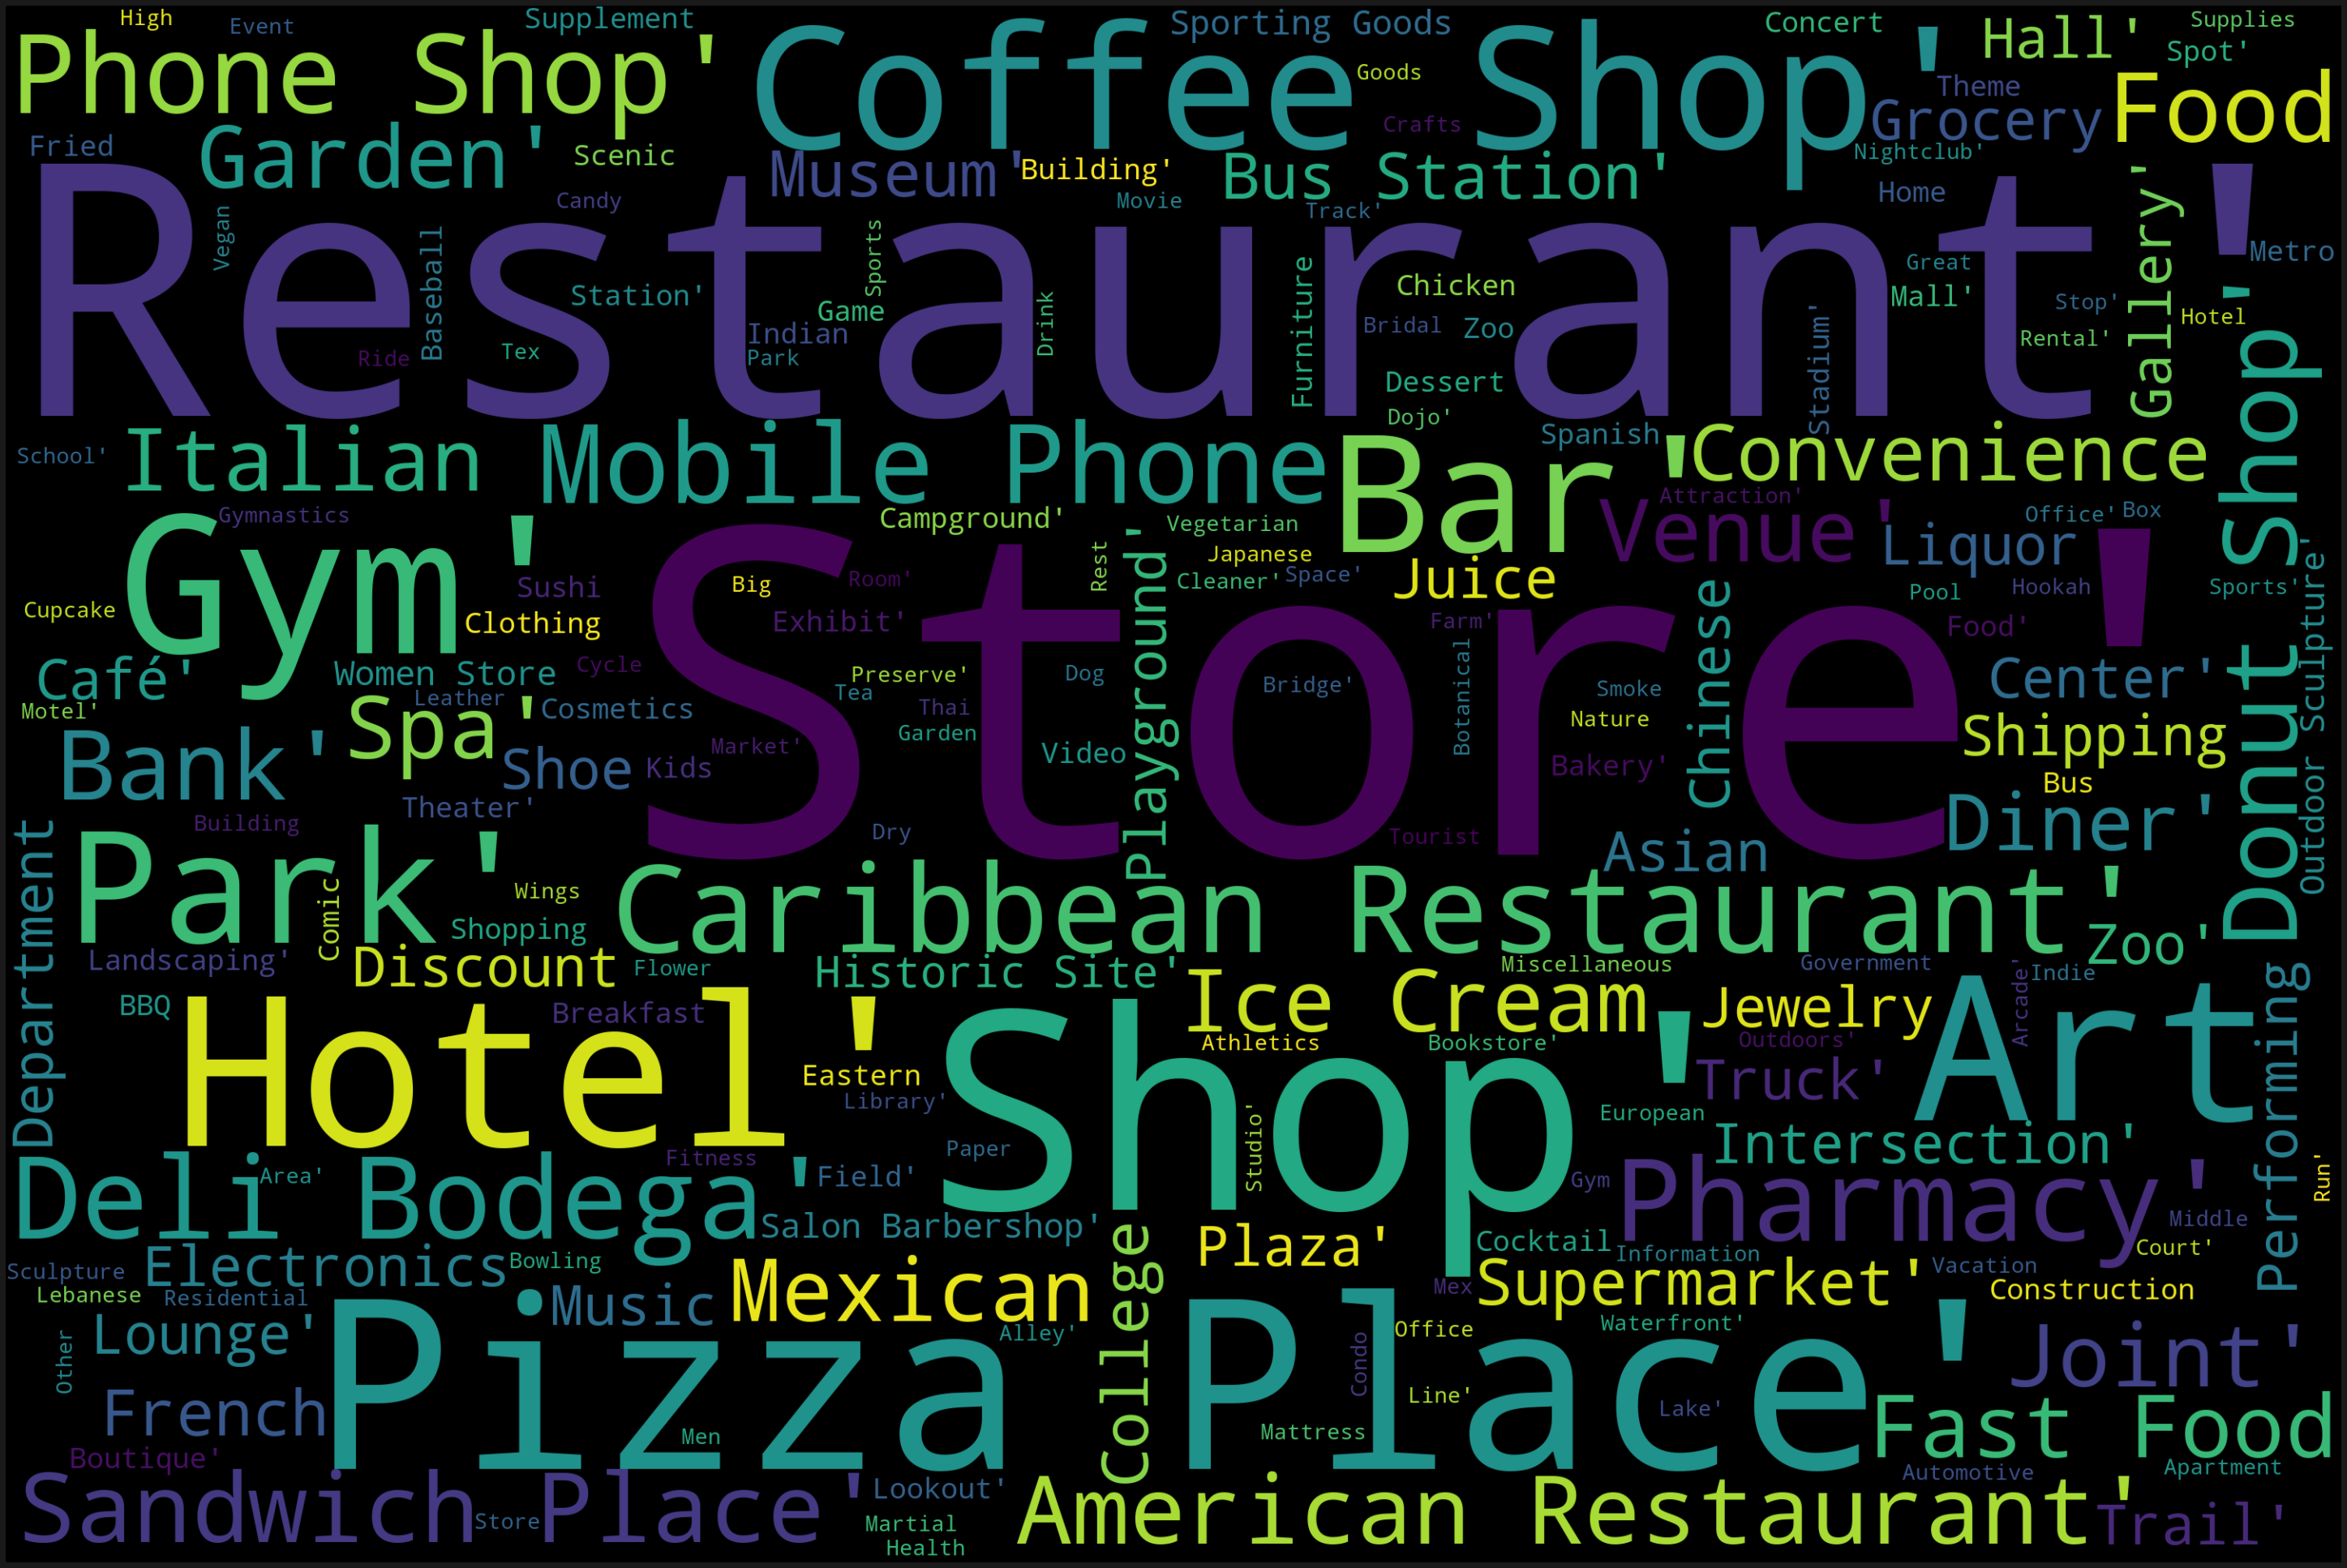

In [221]:
# Generate Wordcloud for New York Common venues

text = newyork_venues['Venue Category'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### e] Examine clusters

### Cluster 0

In [232]:
newyork_merged1.loc[newyork_merged1['Cluster Labels'] == 0, newyork_merged1.columns[[1] + list(range(5, newyork_merged1.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
10     Columbia      Department Store           Zoo Exhibit   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
10            Donut Shop           Flower Shop  Fast Food Restaurant

### Cluster 1

In [233]:
newyork_merged1.loc[newyork_merged1['Cluster Labels'] == 1, newyork_merged1.columns[[1] + list(range(5, newyork_merged1.shape[1]))]]

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
2         Bronx           Pizza Place            Bus Station   
5        Cayuga         Historic Site            Zoo Exhibit   
13     Dutchess                Garden            Zoo Exhibit   
18      Genesee  Fast Food Restaurant    American Restaurant   
23        Kings  Caribbean Restaurant            Pizza Place   
27       Monroe            Sports Bar            Dry Cleaner   
29       Nassau   American Restaurant                  Hotel   
30     New York                 Hotel                    Spa   
32       Oneida     Convenience Store                    Bar   
33     Onondaga           Pizza Place  College Arts Building   
34      Ontario                  Farm            Zoo Exhibit   
35       Orange                  Park         Baseball Field   
39       Putnam        Scenic Lookout         Discount Store   
40       Queens           Pizza Place             Donut Shop   
42     Richmond                 Trail               Bus Stop   
43     Rockland    Chinese Restaurant           Intersection   
48     Schuyler                 Hotel            Art Gallery   
49       Seneca           Pizza Place            Zoo Exhibit   
53        Tioga        Discount Store    Sporting Goods Shop   
54     Tompkins                Garden            College Gym   
55       Ulster   American Restaurant             Donut Shop   
59  Westchester   American Restaurant       Asian Restaurant   
61        Yates               Brewery            Zoo Exhibit   

   3rd Most Common Venue 4th Most Common Venue  \
2          Deli / Bodega        Ice Cream Shop   
5                Dog Run  Fast Food Restaurant   
13            Donut Shop  Fast Food Restaurant   
18                   Bar              Pharmacy   
23     Mobile Phone Shop              Pharmacy   
27         Deli / Bodega            Comic Shop   
29         Movie Theater    Mexican Restaurant   
30     French Restaurant         Women's Store   
32         Deli / Bodega           Coffee Shop   
33           Coffee Shop                   Gym   
34            Donut Shop           Flower Shop   
35           Zoo Exhibit            Donut Shop   
39                  Farm           Event Space   
40          Liquor Store           Bus Station   
42            Restaurant        Sandwich Place   
43         Deli / Bodega         Shopping Mall   
48       Vacation Rental               Dog Run   
49               Dog Run  Fast Food Restaurant   
53                   Gym               Dog Run   
54                  Lake                  Café   
55           Flower Shop  Fast Food Restaurant   
59    Italian Restaurant              Pharmacy   
61            Donut Shop           Flower Shop   

                       5th Most Common Venue  
2                                      Diner  
5                                       Farm  
13                                      Farm  
18                               Coffee Shop  
23                               Coffee Shop  
27                               College Gym  
29  Residential Building (Apartment / Condo)  
30                         Outdoor Sculpture  
32                               Flower Shop  
33                            Discount Store  
34                      Fast Food Restaurant  
35                      Fast Food Restaurant  
39                         Electronics Store  
40                                    Market  
42                               Zoo Exhibit  
43                                     Diner  
48                      Fast Food Restaurant  
49                                      Farm  
53                                      Farm  
54                                   Stadium  
55                                      Farm  
59                                      Bank  
61                      Fast Food Restaurant

### Cluster 2

In [234]:
newyork_merged1.loc[newyork_merged1['Cluster Labels'] == 2, newyork_merged1.columns[[1] + list(range(5, newyork_merged1.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
47    Schoharie            Campground           Zoo Exhibit   
56       Warren            Campground           Zoo Exhibit   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
47            Donut Shop  Fast Food Restaurant                  Farm  
56            Donut Shop  Fast Food Restaurant                  Farm

### Cluster 3

In [235]:
newyork_merged1.loc[newyork_merged1['Cluster Labels'] == 3, newyork_merged1.columns[[1] + list(range(5, newyork_merged1.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
14         Erie            Waterfront           Zoo Exhibit   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
14               Dog Run  Fast Food Restaurant                  Farm

### Cluster 4

In [236]:
newyork_merged1.loc[newyork_merged1['Cluster Labels'] == 4, newyork_merged1.columns[[1] + list(range(5, newyork_merged1.shape[1]))]]

Neighborhood       1st Most Common Venue 2nd Most Common Venue  \
36      Orleans  Construction & Landscaping             Rest Area   
51      Suffolk  Construction & Landscaping            Donut Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
36               Dog Run  Fast Food Restaurant                  Farm  
51           Flower Shop  Fast Food Restaurant                  Farm

### Thank you for viewing the notebook, hope you found it helpful.

This notebook was created by [Marceline Manyika](https://www.linkedin.com/in/marceline-manyika).


This notebook is a submission I made as part of the 9 Course IBM Data Science Professional Certificate on **Coursera** , specifically for the Course: *IBM Data Science Capstone*.

<hr>

Copyright &copy; 2020 Marceline Chiedza Manyika.